In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlite3 import connect
import datetime
import pyodbc

In [2]:
# Setting SQL
server = 'sqldtmprd01'
database = 'ADS_AA'
user = 'usrads'
password = 'gdi83ie8efdshfo3'


conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER=' + server + '; \
                       DATABASE=' + database +'; \
                       UID=' + user + '; \
                       PWD=' + password + '; '
                     )

cursor = conn.cursor()

In [3]:
# Import data sql
df = pd.read_sql_query("""select * from dbo.alv_payroll_income_est_dm""", conn)

In [4]:
df.columns

Index(['year_income', 'CIF', 'source', 'Avg_SalaryL3M', 'Nmonths',
       'min_bussdate', 'max_bussdate', 'buss_date', 'Company_Name', 'Brand',
       'Model', 'RamTotalSize', 'PhysicalSize', 'deviceModel', 'sub',
       'sub_group', 'vendor', 'NetworkOperatorName', 'LocaleDisplayLanguage',
       'LocaleIso3Country', 'Rooted', 'deviceTime', 'deviceTime2',
       'deviceTime3', 'MOBILE_PHONE', 'std_mobile_phone', 'HOME_PHONE',
       'HOME_PHONE_GROUP', 'FAX', 'PLACE_OF_BIRTH', 'BIRTH_DATE', 'Age',
       'MARITAL_STATUS_CODE', 'MARITAL_STATUS', 'NPWP', 'Tax_Digit',
       'EDUCATION_CODE', 'EDUCATION', 'PROFESSION', 'JABATAN', 'JENIS_USAHA',
       'EMAIL', 'EMAIL_GROUP', 'BUSS_DATE_SDB', 'MOBILE_PHONE_CONTACT',
       'STD_MOBILE_PHONE_CONTACT', 'HOME_PHONE_CONTACT',
       'HOME_PHONE_CONTACT_GROUP', 'EMAIL_CONTACT', 'EMAIL_CONTACT_GROUP',
       'START_DATE_CONTACT', 'END_DATE_CONTACT', 'JML_TANGGUNGAN',
       'LAMA_TINGGAL', 'STATUS_TEMPAT_TINGGAL_CODE', 'STATUS_TEMPAT_TINGGAL',


In [5]:
# Import data csv
#df = pd.read_csv('/Users/22060909/Documents/Task/Income Estimation/Python/data/Income_Proxy_CC_FC_SLIK_CR_Trx_v3.csv')
umr = pd.read_csv('/Users/22060909/Documents/Task/Income Estimation/Python/data/UMR_Propinsiv2.csv')
prdb = pd.read_csv('/Users/22060909/Documents/Task/Income Estimation/Python/data/PDRBv2.csv')

In [6]:
# Join UMR
#df['applicationyear'] = pd.to_datetime(df['applicationdate']).dt.year

df['Province_year'] = df['PROVINCE_cln'].astype(str) + '_' + df['year_income'].astype(str)
df = pd.merge(df, umr[['Provinsi_Year','UMR']], how='left', left_on='Province_year', right_on ='Provinsi_Year', indicator=False)

In [7]:
# Check join result

pd.set_option('display.max_columns', None)
df.head()

,year_income,CIF,source,Avg_SalaryL3M,Nmonths,min_bussdate,max_bussdate,buss_date,Company_Name,Brand,Model,RamTotalSize,PhysicalSize,deviceModel,sub,sub_group,vendor,NetworkOperatorName,LocaleDisplayLanguage,LocaleIso3Country,Rooted,deviceTime,deviceTime2,deviceTime3,MOBILE_PHONE,std_mobile_phone,HOME_PHONE,HOME_PHONE_GROUP,FAX,PLACE_OF_BIRTH,BIRTH_DATE,Age,MARITAL_STATUS_CODE,MARITAL_STATUS,NPWP,Tax_Digit,EDUCATION_CODE,EDUCATION,PROFESSION,JABATAN,JENIS_USAHA,EMAIL,EMAIL_GROUP,BUSS_DATE_SDB,MOBILE_PHONE_CONTACT,STD_MOBILE_PHONE_CONTACT,HOME_PHONE_CONTACT,HOME_PHONE_CONTACT_GROUP,EMAIL_CONTACT,EMAIL_CONTACT_GROUP,START_DATE_CONTACT,END_DATE_CONTACT,JML_TANGGUNGAN,LAMA_TINGGAL,STATUS_TEMPAT_TINGGAL_CODE,STATUS_TEMPAT_TINGGAL,TENURE,HUBUNGAN_NASABAH,PROVINCE,PROVINCE_trim,BUSS_DATE_ADDINFO,MOBILE_PHONE_FINAL,STD_MOBILE_PHONE_FINAL,EMAIL_FINAL,EMAIL_FINAL_GROUP,deviceModel_all,sub_all,Brand_all,vendor_all,EMAIL_FINAL_ALL_GROUP,PROVINCE_cln,provider1,provider2,provider_final,Province_year,Provinsi_Year,UMR
0,2022,148800,AKSES BISNIS,3701.0,2,2021-11-30,2022-03-31,2022-03-31,NUGROHO DWI ATMOKO,POCO,M2012K11AG,7614.511719,6.191474,alioth,nugroho.atmoko@gmail.com,gmail,POCO,None,None,None,None,2022-03-25 02:36:18,2022-03-25,2022-03-31,081901296476,081901296476,,None,,BLORA,1980-02-04,42,2,Nikah,088426648506000,15,5,Strata 1,23-Karyawan BTPN,04-Supervisor,67-Perbankan/Asuransi/Keu/BPR,nugroho.atmoko@gmail.com,gmail,2020-03-14,081901296476,081901296476,,None,nugroho.atmoko@gmail.com,gmail,2020-03-15,2021-08-10,4.0,7.0,2,Milik Orangtua,162.0,5,33-JAWA TENGAH,JAWA TENGAH,2023-02-10,081901296476,081901296476,nugroho.atmoko@gmail.com,gmail,alioth,nugroho.atmoko@gmail.com,POCO,POCO,gmail,JAWA TENGAH,XL Axiata,XL Axiata,XL Axiata,JAWA TENGAH_2022,JAWA TENGAH_2022,1812935.0
1,2022,1A018L,AKSES BISNIS,4092154.0,1,2022-12-31,2022-12-31,2022-12-31,PT DAPENSI TRIO USAHA,samsung,SM-G950F,3679.722656,5.732934,universal8895,tommiharh@gmail.com,gmail,samsung,Tsel-PakaiMasker,Indonesia,IDN,None,2022-12-26 12:37:44,2022-12-26,2022-12-31,082171794302,082171794302,082171794302,mobile,,Kutacane,1976-01-27,46,1,Tidak Menikah,99999,5,,None,24-Pegawai Swasta,01-Non Staff,54-LAINNYA,tommiharh@gmail.com,gmail,2023-02-12,082171794302,082171794302,082171794302,mobile,tommiharh@gmail.com,gmail,2022-12-05,NaT,0.0,0.0,,None,0.0,,21-KEPULAUAN RIAU,KEPULAUAN RIAU,2023-02-10,082171794302,082171794302,tommiharh@gmail.com,gmail,universal8895,tommiharh@gmail.com,samsung,samsung,gmail,KEPULAUAN RIAU,Telkomsel,Telkomsel,Telkomsel,KEPULAUAN RIAU_2022,KEPULAUAN RIAU_2022,3050172.0
2,2022,1A01GR,AKSES BISNIS,4440000.0,1,2022-12-31,2022-12-31,2022-12-31,PT PANCARAN ENERGI TRANSPORTASI,samsung,SM-A025F,3568.332031,5.352522,QC_Reference_Phone,cherlykaniadevi99@gmail.com,gmail,samsung,None,None,None,None,2022-12-29 05:03:50,2022-12-29,2022-12-31,083149200344,083149200344,083149200344,mobile,,Cilacap,1999-05-12,23,1,Tidak Menikah,,0,,None,15-NON FORMAL LAINNYA,11-LAINNYA,54-LAINNYA,cherlykaniadevi99@gmail.com,gmail,2023-02-12,083149200344,083149200344,083149200344,mobile,cherlykaniadevi99@gmail.com,gmail,2022-12-05,NaT,0.0,0.0,,None,0.0,,33-JAWA TENGAH,JAWA TENGAH,2023-02-10,083149200344,083149200344,cherlykaniadevi99@gmail.com,gmail,QC_Reference_Phone,cherlykaniadevi99@gmail.com,samsung,samsung,gmail,JAWA TENGAH,Axis,Axis,Axis,JAWA TENGAH_2022,JAWA TENGAH_2022,1812935.0
3,2022,1A01QS,AKSES BISNIS,1727750.0,1,2022-12-31,2022-12-31,2022-12-31,PT KARUNIA BERKAT ABADI,samsung,SM-A035F,3555.699219,6.008653,ums9230_4h10,hasanbahri145@gmail.com,gmail,samsung,None,None,None,None,2022-12-31 06:24:53,2022-12-31,2022-12-31,082126538350,082126538350,082126538350,mobile,,Purwakarta,1985-07-10,37,2,Nikah,99999,5,,None,15-NON FORMAL LAINNYA,11-LAINNYA,34-TRANSPORTASI/ANGKUTAN UMUM,hasanbahri145@gmail.com,gmail,2023-02-12,082126538350,082126538350,082126538350,mobile,hasanbahri145@gmail.com,gmail,2022-12-05,NaT,0.0,0.0,,None,0.0,,32-JAWA BARAT,JAWA BARAT,2023-02-10,082126538350,082126538350,has

In [8]:
# Join PDRB

df['year_income_min1'] = df['year_income'] -1
df['year_income_min2'] = df['year_income'] -2
df['year_income_min3'] = df['year_income'] -3

df['PROVINCE_year_min1'] = df['PROVINCE_cln'].astype(str) + '_' + df['year_income_min1'].astype(str)
df['PROVINCE_year_min2'] = df['PROVINCE_cln'].astype(str) + '_' + df['year_income_min2'].astype(str)
df['PROVINCE_year_min3'] = df['PROVINCE_cln'].astype(str) + '_' + df['year_income_min3'].astype(str)

df = pd.merge(df, prdb[['Provinsi_Year','PDRB','Cont_PDRB']], how='left', left_on='PROVINCE_year_min1', right_on ='Provinsi_Year', indicator=False)
df.rename(columns={'PDRB':'PDRB_lag1', 'Cont_PDRB':'Cont_PDRB_lag1'}, inplace=True)

df = pd.merge(df, prdb[['Provinsi_Year','PDRB','Cont_PDRB']], how='left', left_on='PROVINCE_year_min2', right_on ='Provinsi_Year', indicator=False)
df.rename(columns={'PDRB':'PDRB_lag2', 'Cont_PDRB':'Cont_PDRB_lag2'}, inplace=True)

df = pd.merge(df, prdb[['Provinsi_Year','PDRB','Cont_PDRB']], how='left', left_on='PROVINCE_year_min3', right_on ='Provinsi_Year', indicator=False)
df.rename(columns={'PDRB':'PDRB_lag3', 'Cont_PDRB':'Cont_PDRB_lag3'}, inplace=True)

In [9]:
#Add Year of Experiences

df['YOE'] = df['Age'] - 21
df[['YOE','Age']].head(10)

,YOE,Age
0,21,42
1,25,46
2,2,23
3,16,37
4,1,22
5,16,37
6,4,25
7,0,21
8,1,22
9,1,22


In [10]:
df.shape

(27962, 93)

In [11]:
# Remove sample with nmonths less than 3
df = df[df['Nmonths']>=3]
df.shape

(22790, 93)

In [12]:
df['Nmonths'].unique()

array([3], dtype=int64)

In [13]:
# Income in Mio
df['Avg_IncomeL3M_Mio'] = df['Avg_SalaryL3M']/1000000

In [14]:
# set null
#df[df['PhysicalSize']==-99999.0]['PhysicalSize'] = np.nan
#df[df['RamTotalSize']==-99999.0]['RamTotalSize'] = np.nan

df['PhysicalSize'] = df['PhysicalSize'].replace(-99999,np.nan)
df['RamTotalSize'] = df['RamTotalSize'].replace(-99999,np.nan)


In [15]:
df['RamTotalSize'].unique()

array([          nan, 3736.578125  , 3745.9453125 , ..., 1906.6640625 ,
       1905.08203125, 2867.84765625])

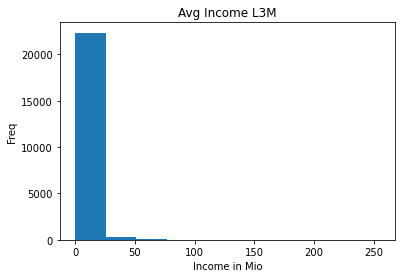

In [16]:
#Plot Income
plt.hist(df['Avg_IncomeL3M_Mio'])
plt.ticklabel_format(style='plain')
plt.xlabel('Income in Mio')
plt.ylabel('Freq')
plt.title('Avg Income L3M')
plt.show()

In [17]:
#bootstrapping
bootstrap = pd.DataFrame({'mean_income_mio':[df.sample(1000,replace=True)['Avg_IncomeL3M_Mio'].mean() for i in range(0,2000)]})
#bootstrap['mean_income_mio'].plot.hist()

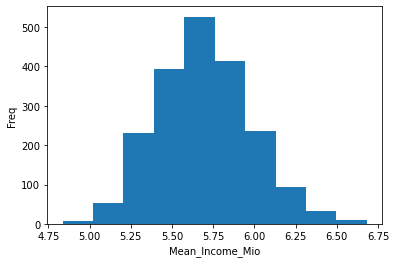

In [18]:
#plot the bootstrapping

plt.hist(bootstrap['mean_income_mio'])
plt.ylabel('Freq')
plt.xlabel('Mean_Income_Mio')
plt.show()

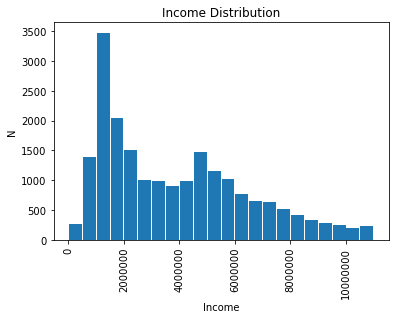

In [19]:
plt.hist(df['Avg_SalaryL3M'], bins=[0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000,5500000,6000000,6500000,7000000,7500000,8000000,8500000,9000000,9500000,10000000,10500000,11000000], rwidth=0.93)
         #bins=[0, 1000000, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 450000000], rwidth=0.975)
plt.ticklabel_format(style='plain')
plt.title('Income Distribution')
plt.xticks(rotation=90)
plt.ylabel('N')
plt.xlabel('Income')

plt.show()

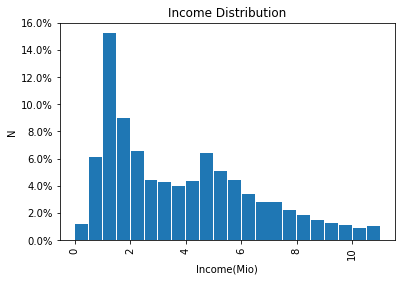

In [20]:
import matplotlib.ticker as mtick

plt.hist(df['Avg_SalaryL3M']/1000000,
         weights=np.ones(len(df)) / len(df),
         bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11], rwidth=0.93)
         #bins=[0, 1000000, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 450000000], rwidth=0.975)
plt.ticklabel_format(style='plain')
plt.title('Income Distribution')
plt.xticks(rotation=90)
plt.ylabel('N')
plt.xlabel('Income(Mio)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

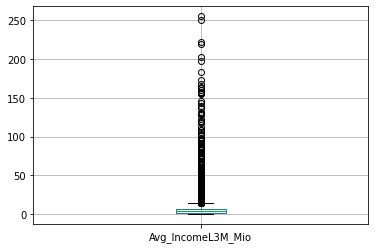

In [21]:
# boxplot
boxplot = df.boxplot(column="Avg_IncomeL3M_Mio")

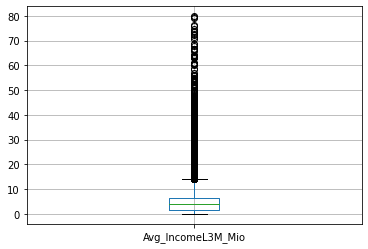

In [22]:
boxplot2 = df[df['Avg_IncomeL3M_Mio']<=80].boxplot(column="Avg_IncomeL3M_Mio")

In [23]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
tqdm.pandas()


def getProperties(df):
    cols = df.columns
    l_missVal = []
    l_dtypes = []
    l_unique = []
    l_outlower = []
    l_outupper = []
    l_mean = []
    l_median = []
    l_min = []
    l_max = []
    for var in cols:
        l_missVal.append(str(df[var].isnull().sum()) + " (" + str(round(df[var].isnull().sum()/df.shape[0]*100,2)) + "%)")
        l_dtypes.append(df[var].dtypes)
        l_unique.append(len(pd.unique(df[var])))
        
        #outlier lower and upper (Percentile Based)
        if(pd.api.types.is_numeric_dtype(df[var])):
            q1 = df[var].quantile(0.25)
            q3 = df[var].quantile(0.75)
            min_outlier_limit = np.round(q1 - 1.5*(q3-q1),decimals=2).astype(object)
            l_outlower.append(min_outlier_limit)
            
            max_outlier_limit = np.round(q3 + 1.5*(q3-q1),decimals=2).astype(object)
            l_outupper.append(max_outlier_limit)
            
            l_mean.append(np.round(df[var].mean(),decimals=2).astype(object))
            l_median.append(np.round(df[var].median(),decimals=2).astype(object))
            
            floatType = df[var].astype(float)
            l_min.append(np.round(floatType.min(),decimals=2).astype(object))
            l_max.append(np.round(floatType.max(),decimals=2).astype(object))
            
        elif(pd.api.types.is_datetime64_dtype(df[var]) | #pd.api.types.is_datetimetz(df[var]) | 
            pd.api.types.is_timedelta64_dtype(df[var])):
            l_mean.append((df[var] - df[var].min()).mean() + df[var].min())
            l_median.append("-")
            l_min.append(df[var].min())
            l_max.append(df[var].max())
            l_outlower.append("-")
            l_outupper.append("-")
        else:
            l_mean.append("-")
            l_median.append("-")
            l_min.append("-")
            l_max.append("-")
            l_outlower.append("-")
            l_outupper.append("-")
        
    df_prop = pd.DataFrame(df.columns, columns = ['Feature'])
    df_prop['Missing Value'] = l_missVal
    df_prop['DType'] = l_dtypes
    df_prop['Number of Unique'] = l_unique
    df_prop['Min'] = l_min
    df_prop['Max'] = l_max
    df_prop['Median'] = l_median
    df_prop['Mean'] = l_mean
    df_prop['OutlierLower'] = l_outlower
    df_prop['OutlierUpper'] = l_outupper
    
    
    
    df_prop['null']=df_prop['Feature'].apply(lambda x: sum(df[x].isna()))
    df_prop['nullPct']=df_prop['null'].apply(lambda x: round((x/len(df))*100,2))
    ##df_prop['unique']=df['dataFeatures'].apply(lambda x: len(data[~(data[x].isna())][x].unique()))
    df_prop['uniqueSample']=df_prop['Feature'].apply(lambda x: df[x].drop_duplicates().values)
    
    return df_prop

def cat(self):
    cat = self.select_dtypes(include='object')
    att = cat.columns.tolist()
    for x in att:
        print (self[x].unique())

<ipython-input-23-c8e4940a193a>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm
C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [24]:
# Detect Outlier in FC Income Proxy
pd.options.display.max_rows = len(df[['Avg_SalaryL3M','Avg_IncomeL3M_Mio']].columns)
display(getProperties(df[['Avg_SalaryL3M','Avg_IncomeL3M_Mio']]))

,Feature,Missing Value,DType,Number of Unique,Min,Max,Median,Mean,OutlierLower,OutlierUpper,null,nullPct,uniqueSample
0,Avg_SalaryL3M,0 (0.0%),float64,17607,1.33,2.551268e+08,3906450.50,5680970.82,-5931705.00,14109508.33,0,0.0,"[1193333.3333333333, 428333.3333333333, 545593..."
1,Avg_IncomeL3M_Mio,0 (0.0%),float64,17607,0.00,2.551300e+02,3.91,5.68,-5.93,14.11,0,0.0,"[1.1933333333333334, 0.4283333333333333, 5.455..."


In [25]:
# Trim Outlier
Norm_df = df[(df['Avg_SalaryL3M']<=30000000)&(df['Avg_SalaryL3M']>=500000)]
print('Normalized dataset : ' +str(Norm_df.shape[0]))
print('Original dataset : ' + str(df.shape[0]))
print('N_Outlier: ' + str(df.shape[0]-Norm_df.shape[0]))
print('Outlier(%): ' + str((df.shape[0]-Norm_df.shape[0])/df.shape[0]))

Normalized dataset : 22204
Original dataset : 22790
N_Outlier: 586
Outlier(%): 0.025713032031592805


In [26]:
#Income Below 1Mio
print('Income < 1Mio    : ' + str(df[df['Avg_SalaryL3M']<1000000].shape[0]))
print('Income < 1Mio    : ' + str((df[df['Avg_SalaryL3M']<1000000].shape[0])/df.shape[0]))

Income < 1Mio    : 1654
Income < 1Mio    : 0.07257569109258447


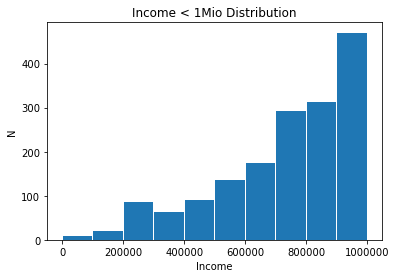

In [27]:
plt.hist(df[df['Avg_SalaryL3M']<1000000]['Avg_SalaryL3M'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], rwidth=0.975)
plt.ticklabel_format(style='plain')
plt.title('Income < 1Mio Distribution')
plt.ylabel('N')
plt.xlabel('Income')

plt.show()


Income distribution from 500000 - 1000000  already constitutes 84 % (1386 sample) of Income sample <1Mio 

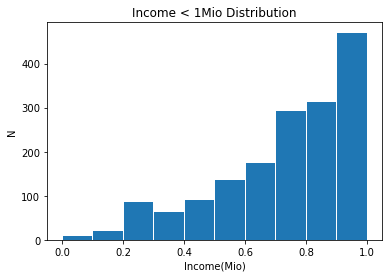

In [28]:
plt.hist(df[df['Avg_SalaryL3M']<1000000]['Avg_SalaryL3M']/1000000, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], rwidth=0.975)
plt.ticklabel_format(style='plain')
plt.title('Income < 1Mio Distribution')
plt.ylabel('N')
plt.xlabel('Income(Mio)')

plt.show()

In [29]:
df[(df['Avg_SalaryL3M']>=500000)&(df['Avg_SalaryL3M']<1000000)].shape[0]/ df[df['Avg_SalaryL3M']<1000000].shape[0]

0.837968561064087

In [30]:
df[(df['Avg_SalaryL3M']>=500000)&(df['Avg_SalaryL3M']<1000000)].shape[0]

1386

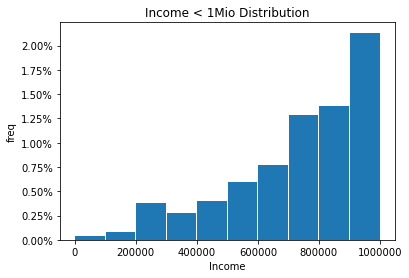

In [31]:
from matplotlib.ticker import PercentFormatter

plt.hist(df['Avg_SalaryL3M'], 
         weights=np.ones(len(df)) / len(df),bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], rwidth=0.97)
plt.ticklabel_format(style='plain')
plt.title('Income < 1Mio Distribution')
plt.ylabel('freq')
plt.xlabel('Income')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [32]:
#Income Above 15Mio
print('Income > 15Mio   : '+ str(df[df['Avg_SalaryL3M']>15000000].shape[0]))
print('Income > 15Mio   : ' + str((df[df['Avg_SalaryL3M']>15000000].shape[0])/df.shape[0]))

Income > 15Mio   : 1291
Income > 15Mio   : 0.056647652479157526


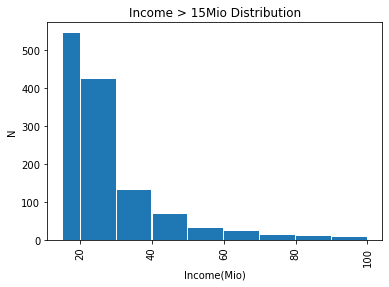

In [33]:
plt.hist(df[df['Avg_SalaryL3M']>15000000]['Avg_SalaryL3M']/1000000, 
         bins=[15, 20, 30, 40, 50, 60, 70, 80, 90, 100], rwidth=0.97)
plt.ticklabel_format(style='plain')
plt.title('Income > 15Mio Distribution')
plt.ylabel('N')
plt.xlabel('Income(Mio)')
plt.xticks(rotation=90)
plt.show()

Income 15Mio - 30 Mio distribution already constitutes 75% (971 sample) of Income sample > 15Mio

In [34]:
df[(df['Avg_SalaryL3M']>15000000)&(df['Avg_SalaryL3M']<30000000)].shape[0]/ df[df['Avg_SalaryL3M']>15000000].shape[0]

0.7521301316808675

In [35]:
df[(df['Avg_SalaryL3M']>15000000)&(df['Avg_SalaryL3M']<30000000)].shape[0]

971

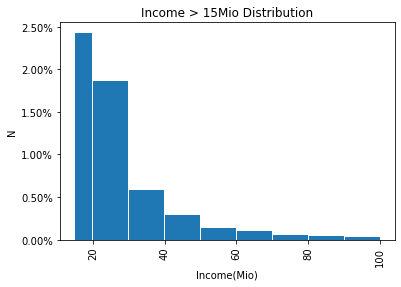

In [36]:
plt.hist(df['Avg_SalaryL3M']/1000000, 
          weights=np.ones(len(df)) / len(df),
         bins=[15, 20, 30, 40, 50, 60, 70, 80, 90, 100], rwidth=0.965)
plt.ticklabel_format(style='plain')
plt.title('Income > 15Mio Distribution')
plt.ylabel('N')
plt.xlabel('Income(Mio)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
# Define Lookup Function
#def xlookup(lookup_value, lookup_array, return_array):
#    return return_array.loc[lookup_array == lookup_value].tolist()[0]

In [37]:
# Define Characteristic Analysis Function
def char_analysis(df,attribute,target):
    df2 = df[[target,attribute]]
    if  df[attribute].isnull().values.any() ==True:
        df2.loc[df[attribute].isnull(),attribute] = "Empty"
        analysis = df2.groupby(attribute, as_index = False, dropna=False)[target].agg(['count','mean','median'])
        analysis['dist'] = analysis['count']/ analysis['count'].sum()
        analysis['attribute'] = analysis.index.name
        analysis.index.name = 'bin'
    else:
        #df2.loc[df[attribute].isnull(),attribute] = "Empty"
        analysis = df2.groupby(attribute, as_index = False, dropna=False)[target].agg(['count','mean','median'])
        analysis['dist'] = analysis['count']/ analysis['count'].sum()
        analysis['attribute'] = analysis.index.name
        analysis.index.name = 'bin'
    
    
    
    
    
# faster method
    df3 = pd.merge(df2, analysis[['dist','mean','median']], left_on=attribute , right_index =True, indicator=False)
    
# old method    
#    cor = []
#    for i in range(0,len(df2)):
#        cor.append(xlookup(df2.iloc[i,:][attribute],analysis.index.values,analysis['mean']))
#    df2['mean'] = cor
    


     

  
    
    
    analysis['mean_correlation'] = df3[[target,'mean']].corr().iloc[0,1]
    analysis['median_correlation'] = df3[[target,'median']].corr().iloc[0,1]
    analysis['dist_correlation'] = df3[[target,'dist']].corr().iloc[0,1]


    return analysis

In [ ]:
#Predictor.columns

In [38]:
# Import Predictor
Predictor_List = list(pd.read_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5 - var interaction\predictor.CSV', sep = ',', decimal = '.', 
                    encoding = 'windows-1251', low_memory = False, header = None)[0])

Predictor = Norm_df[Predictor_List]
Target = Norm_df['Avg_SalaryL3M']

In [39]:
Target.shape

(22204,)

In [40]:
pd.options.display.max_rows = None
Norm_df[['Avg_IncomeL3M_Mio']].describe()

,Avg_IncomeL3M_Mio
count,22204.000000
mean,4.995341
std,4.564043
min,0.500000
25%,1.611404
50%,3.887875
75%,6.470917
max,30.000000


In [41]:
# Define Predictor

cols_pred = list(pd.read_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5 - var interaction\predictor.CSV', sep = ',', decimal = '.', 
                    encoding = 'windows-1251', low_memory = False, header = None)[0])

cols_pred_cat = list(set([c[0] for c in list(zip(Predictor, Predictor.dtypes)) if c[1]=='O']) & set(cols_pred))
cols_pred_num = list(set([c[0] for c in list(zip(Predictor.columns, Predictor.dtypes)) if c[1]!='O']) & set(cols_pred))

# ALTERNATIVELY, DEFINE THE PREDICTOR NAMES MANUALLY

#cols_pred_num = []


#cols_pred_cat = []

cols_pred = cols_pred_num + cols_pred_cat

print(len(cols_pred_num),'numerical predictors:')
for p in cols_pred_num: print(p)
print('-'*100)
print()
print(len(cols_pred_cat),'categorical predictors:')
for p in cols_pred_cat: print(p)

15 numerical predictors:
PDRB_lag3
UMR
Cont_PDRB_lag3
PDRB_lag2
Tax_Digit
TENURE
RamTotalSize
Cont_PDRB_lag2
Age
PhysicalSize
LAMA_TINGGAL
JML_TANGGUNGAN
PDRB_lag1
Cont_PDRB_lag1
YOE
----------------------------------------------------------------------------------------------------

32 categorical predictors:
NetworkOperatorName
LocaleDisplayLanguage
HOME_PHONE_CONTACT_GROUP
EMAIL_GROUP
deviceModel_all
deviceModel
EMAIL_CONTACT_GROUP
EMAIL_FINAL_ALL_GROUP
JABATAN
Brand
PROFESSION
PROVINCE_cln
vendor_all
JENIS_USAHA
provider2
HOME_PHONE_GROUP
LocaleIso3Country
FAX
provider_final
sub_all
EMAIL_FINAL_GROUP
EDUCATION
STATUS_TEMPAT_TINGGAL
Brand_all
sub_group
Model
HUBUNGAN_NASABAH
MARITAL_STATUS
PLACE_OF_BIRTH
vendor
Rooted
provider1


In [42]:
# Numerical Predictor Checking
pd.options.display.max_rows = len(Predictor[cols_pred_num].columns)
display(getProperties(Predictor[cols_pred_num]))

,Feature,Missing Value,DType,Number of Unique,Min,Max,Median,Mean,OutlierLower,OutlierUpper,null,nullPct,uniqueSample
0,PDRB_lag3,18 (0.08%),float64,56,36468794.70,2.815636e+09,2.123154e+09,1.754841e+09,-3.476699e+08,3.961480e+09,18,0.08,"[2345548552.0, 760247508.9, 2123153711.0, 1360..."
1,UMR,18 (0.08%),float64,55,1765000.00,4.641854e+06,1.841487e+06,2.388865e+06,8.519130e+05,3.490777e+06,18,0.08,"[1891567.0, 2938564.0, 1841487.0, 1812935.0, 4..."
2,Cont_PDRB_lag3,18 (0.08%),float64,52,0.00,1.800000e-01,1.300000e-01,1.100000e-01,-1.000000e-02,2.400000e-01,18,0.08,"[0.1462, 0.0474, 0.1324, 0.0848, 0.1755, 0.040..."
3,PDRB_lag2,18 (0.08%),float64,56,39695490.69,2.815636e+09,2.084620e+09,1.724634e+09,-7.987986e+07,3.727594e+09,18,0.08,"[2299791052.0, 728649985.3, 2084620246.0, 1347..."
4,Tax_Digit,0 (0.0%),int64,9,0.00,1.600000e+01,1.000000e+00,5.510000e+00,-2.250000e+01,3.750000e+01,0,0.00,"[1, 0, 15, 14, 5, 16, 2, 11, 13]"
5,TENURE,112 (0.5%),float64,264,0.00,3.110000e+02,0.000000e+00,1.989000e+01,-3.600000e+01,6.000000e+01,112,0.50,"[0.0, 4.0, 26.0, 12.0, 36.0, 25.0, 16.0, 23.0,..."
6,RamTotalSize,4727 (21.29%),float64,2729,864.98,1.459600e+04,3.699500e+03,4.238730e+03,-1.487190e+03,9.940990e+03,4727,21.29,"[nan, 3745.9453125, 3806.94140625, 2778.160156..."
7,Cont_PDRB_lag2,18 (0.08%),float64,51,0.00,1.800000e-01,1.300000e-01,1.100000e-01,-1.000000e-02,2.400000e-01,18,0.08,"[0.1458, 0.0462, 0.1322, 0.0855, 0.1755, 0.038..."
8,Age,0 (0.0%),int64,57,17.00,7.300000e+01,2.700000e+01,2.958000e+01,6.500000e+00,5.050000e+01,0,0.00,"[21, 27, 20, 19, 24, 22, 23, 25, 26, 38, 48, 3..."
9,PhysicalSize,4727 (21.29%),float64,1302,0.58,1.498000e+01,5.980000e+00,5.900000e+00,5.380000e+00,6.500000e+00,4727,21.29,"[nan, 6.2750460960633765, 6.096908020054339, 5..."


In [43]:
# Categorical Predictor Checking
pd.options.display.max_rows = len(Predictor[cols_pred_cat].columns)
display(getProperties(Predictor[cols_pred_cat]))

,Feature,Missing Value,DType,Number of Unique,Min,Max,Median,Mean,OutlierLower,OutlierUpper,null,nullPct,uniqueSample
0,NetworkOperatorName,17042 (76.75%),object,58,-,-,-,-,-,-,17042,76.75,"[None, Indosat Ooredoo, Smartfren - Stay Safe,..."
1,LocaleDisplayLanguage,17042 (76.75%),object,6,-,-,-,-,-,-,17042,76.75,"[None, Indonesia, Bahasa Indonesia, English, ?..."
2,HOME_PHONE_CONTACT_GROUP,780 (3.51%),object,3,-,-,-,-,-,-,780,3.51,"[mobile, None, home]"
3,EMAIL_GROUP,101 (0.45%),object,81,-,-,-,-,-,-,101,0.45,"[gmail, yahoo, g.mail, ymail, hotmail, rocketm..."
4,deviceModel_all,2438 (10.98%),object,399,-,-,-,-,-,-,2438,10.98,"[None, iPhone12,1, lancelot, iPhone14,5, k62v1..."
5,deviceModel,4727 (21.29%),object,361,-,-,-,-,-,-,4727,21.29,"[None, lancelot, k62v1_64_bsp, unknown, k65v1_..."
6,EMAIL_CONTACT_GROUP,211 (0.95%),object,81,-,-,-,-,-,-,211,0.95,"[gmail, yahoo, None, g.mail, ymail, hotmail, r..."
7,EMAIL_FINAL_ALL_GROUP,93 (0.42%),object,80,-,-,-,-,-,-,93,0.42,"[gmail, yahoo, ymail, hotmail, rocketmail, Non..."
8,JABATAN,0 (0.0%),object,29,-,-,-,-,-,-,0,0.00,"[01-Non Staff, 02-STAFF, 11-LAINNYA, 02-Staff,..."
9,Brand,4727 (21.29%),object,52,-,-,-,-,-,-,4727,21.29,"[None, Redmi, vivo, OPPO, Realme, samsung, xia..."


In [44]:
#All

Properties = getProperties(Predictor)
pd.options.display.max_rows = len(Properties)
display(Properties)


,Feature,Missing Value,DType,Number of Unique,Min,Max,Median,Mean,OutlierLower,OutlierUpper,null,nullPct,uniqueSample
0,Brand,4727 (21.29%),object,52,-,-,-,-,-,-,4727,21.29,"[None, Redmi, vivo, OPPO, Realme, samsung, xia..."
1,Model,4727 (21.29%),object,810,-,-,-,-,-,-,4727,21.29,"[None, M2004J19C, V2149, CPH1909, V2111, CPH18..."
2,RamTotalSize,4727 (21.29%),float64,2729,864.98,14596,3699.5,4238.73,-1487.19,9940.99,4727,21.29,"[nan, 3745.9453125, 3806.94140625, 2778.160156..."
3,PhysicalSize,4727 (21.29%),float64,1302,0.58,14.98,5.98,5.9,5.38,6.5,4727,21.29,"[nan, 6.2750460960633765, 6.096908020054339, 5..."
4,deviceModel,4727 (21.29%),object,361,-,-,-,-,-,-,4727,21.29,"[None, lancelot, k62v1_64_bsp, unknown, k65v1_..."
5,sub_group,4798 (21.61%),object,60,-,-,-,-,-,-,4798,21.61,"[None, gmail, yahoo, ymail, hotmail, rocketmai..."
6,vendor,4727 (21.29%),object,52,-,-,-,-,-,-,4727,21.29,"[None, Redmi, vivo, OPPO, Realme, samsung, xia..."
7,NetworkOperatorName,17042 (76.75%),object,58,-,-,-,-,-,-,17042,76.75,"[None, Indosat Ooredoo, Smartfren - Stay Safe,..."
8,LocaleDisplayLanguage,17042 (76.75%),object,6,-,-,-,-,-,-,17042,76.75,"[None, Indonesia, Bahasa Indonesia, English, ?..."
9,LocaleIso3Country,17042 (76.75%),object,10,-,-,-,-,-,-,17042,76.75,"[None, IDN, USA, JPN, AUS, GBR, ASM, FRA, BLZ,..."


# Data Split

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(Predictor, Target, test_size=0.25 ,shuffle = False, stratify = None)

In [46]:
Train = pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
Test = pd.concat([x_test, pd.DataFrame(y_test)],axis=1)

In [47]:
print(Train.shape)
print(Test.shape)

(16653, 48)
(5551, 48)


In [48]:
# Char Analysis Train
attributes_cat_train =pd.DataFrame()
for i in cols_pred_cat:
    attribute_cat_train = char_analysis(Train,i,'Avg_SalaryL3M')
    attributes_cat_train = pd.concat([attributes_cat_train, attribute_cat_train])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [49]:
attributes_cat_train.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\var_distribution.csv')

In [50]:
# Char Analysis Test
attributes_cat_test =pd.DataFrame()
for i in cols_pred_cat:
    attribute_cat_test = char_analysis(Test,i,'Avg_SalaryL3M')
    attributes_cat_test = pd.concat([attributes_cat_test, attribute_cat_test])

In [51]:
char_cat_train = attributes_cat_train[['attribute','mean_correlation','median_correlation','dist_correlation']].drop_duplicates()
pd.set_option('display.max_rows', char_cat_train.shape[0]+1)
char_cat_train.head(15)

,attribute,mean_correlation,median_correlation,dist_correlation
bin,,,,
,NetworkOperatorName,0.140824,0.135674,0.098656
???,LocaleDisplayLanguage,0.166490,0.165190,0.086677
Empty,HOME_PHONE_CONTACT_GROUP,0.106743,0.106741,-0.106738
68gmail,EMAIL_GROUP,0.262086,0.258639,-0.223961
15Lite,deviceModel_all,0.412854,0.395368,-0.160208
15Lite,deviceModel,0.359413,0.344003,0.033776
68gmail,EMAIL_CONTACT_GROUP,0.261648,0.258127,-0.222690
95yahoo,EMAIL_FINAL_ALL_GROUP,0.262913,0.258941,-0.228574
01,JABATAN,0.432191,0.426370,-0.022826


In [52]:
char_cat_test = attributes_cat_test[['attribute','mean_correlation','median_correlation','dist_correlation']].drop_duplicates()
pd.set_option('display.max_rows', char_cat_test.shape[0]+1)
char_cat_test.head(15)

,attribute,mean_correlation,median_correlation,dist_correlation
bin,,,,
,NetworkOperatorName,0.142923,0.134075,0.081055
Bahasa Indonesia,LocaleDisplayLanguage,0.158407,0.158321,0.070922
Empty,HOME_PHONE_CONTACT_GROUP,0.074302,0.071393,0.073244
Empty,EMAIL_GROUP,0.264492,0.260331,-0.219680
A571L,deviceModel_all,0.436225,0.413625,-0.221490
A571L,deviceModel,0.362919,0.340074,-0.075890
Empty,EMAIL_CONTACT_GROUP,0.225675,0.216505,-0.159353
Empty,EMAIL_FINAL_ALL_GROUP,0.265380,0.261312,-0.220602
01-Non Staff,JABATAN,0.374295,0.368335,0.005435


In [53]:
#fill na with mean from train
Train[cols_pred_num] = Train[cols_pred_num].fillna(Train[cols_pred_num].mean())
Test[cols_pred_num] = Test[cols_pred_num].fillna(Train[cols_pred_num].mean())

In [54]:
#Normalize
for i in cols_pred_num:
    new_name = 'norm_'+i
    Train[new_name] = (Train[i] - Train[i].describe()[1])/Train[i].describe()[2]
    Test[new_name] = (Test[i] - Train[i].describe()[1])/Train[i].describe()[2]

In [55]:
norm_cols = [col for col in Train.columns if 'norm_' in col]
norm_cols

['norm_PDRB_lag3',
 'norm_UMR',
 'norm_Cont_PDRB_lag3',
 'norm_PDRB_lag2',
 'norm_Tax_Digit',
 'norm_TENURE',
 'norm_RamTotalSize',
 'norm_Cont_PDRB_lag2',
 'norm_Age',
 'norm_PhysicalSize',
 'norm_LAMA_TINGGAL',
 'norm_JML_TANGGUNGAN',
 'norm_PDRB_lag1',
 'norm_Cont_PDRB_lag1',
 'norm_YOE']

In [56]:
char_num_train = Train[cols_pred_num + norm_cols +list(['Avg_SalaryL3M'])].corr()[['Avg_SalaryL3M']]
char_num_train.sort_values(['Avg_SalaryL3M'], ascending=[False])

,Avg_SalaryL3M
Avg_SalaryL3M,1.000000
Age,0.367850
YOE,0.367850
norm_Age,0.367850
norm_YOE,0.367850
RamTotalSize,0.260475
norm_RamTotalSize,0.260475
UMR,0.226198
norm_UMR,0.226198
norm_Tax_Digit,0.199899


In [57]:
char_num_test = Test[cols_pred_num + norm_cols +list(['Avg_SalaryL3M'])].corr()[['Avg_SalaryL3M']]
char_num_test

,Avg_SalaryL3M
PDRB_lag3,0.050899
UMR,0.258426
Cont_PDRB_lag3,0.050526
PDRB_lag2,0.051470
Tax_Digit,0.275552
TENURE,0.212898
RamTotalSize,0.260254
Cont_PDRB_lag2,0.051591
Age,0.434309
PhysicalSize,0.049585


In [58]:
#Properties[Properties['Feature'].isin(cols_pred_cat)][['Feature','nullPct','Number of Unique']]

#char_cat_train[['attibute','mean_correlation']]

Table_cat = pd.merge(Properties[Properties['Feature'].isin(cols_pred_cat)][['Feature','nullPct','Number of Unique']],char_cat_train[['attribute','mean_correlation']], how='left', left_on = 'Feature', right_on = 'attribute', indicator=False)
Table_cat = pd.merge(Table_cat.rename(columns={'mean_correlation': 'Correlation_Train'}),char_cat_test[['attribute','mean_correlation']], how='left', left_on = 'Feature', right_on = 'attribute', indicator=False)
Table_cat = Table_cat.rename(columns={'mean_correlation': 'Correlation_Test'})
Table_cat = Table_cat.drop(['attribute_x','attribute_y'], axis=1)
Table_cat['Type'] = 'categorical' 


Table_num = pd.merge(Properties[Properties['Feature'].isin(cols_pred_num)][['Feature','nullPct','Number of Unique']],char_num_train[['Avg_SalaryL3M']], how='left', left_on = 'Feature', right_index = True, indicator=False)
Table_num = Table_num.rename(columns={'Avg_SalaryL3M':'Correlation_Train'})
Table_num = pd.merge(Table_num, char_num_test[['Avg_SalaryL3M']], how='left', left_on = 'Feature', right_index = True, indicator=False )
Table_num = Table_num.rename(columns={'Avg_SalaryL3M':'Correlation_Test'})
Table_num['Type'] = 'numerical'

Table = pd.concat([Table_cat,Table_num],axis=0)
Table.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Feature.csv')
pd.set_option('display.max_rows', None)
Table

,Feature,nullPct,Number of Unique,Correlation_Train,Correlation_Test,Type
0,Brand,21.29,52,2.214523e-01,1.835164e-01,categorical
1,Model,21.29,810,4.150911e-01,4.514118e-01,categorical
2,deviceModel,21.29,361,3.594126e-01,3.629193e-01,categorical
3,sub_group,21.61,60,2.374767e-01,1.918043e-01,categorical
4,vendor,21.29,52,2.214523e-01,1.835164e-01,categorical
5,NetworkOperatorName,76.75,58,1.408244e-01,1.429234e-01,categorical
6,LocaleDisplayLanguage,76.75,6,1.664897e-01,1.584067e-01,categorical
7,LocaleIso3Country,76.75,10,1.655169e-01,1.597350e-01,categorical
8,Rooted,100.00,1,-3.427864e-15,1.754288e-15,categorical
9,HOME_PHONE_GROUP,3.04,3,1.118578e-01,2.772959e-02,categorical


In [59]:
#Exploratory Train

Properties = getProperties(Train[cols_pred])
Properties.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\EDA_Feature.csv')
pd.options.display.max_rows = len(Properties)
display(Properties)

,Feature,Missing Value,DType,Number of Unique,Min,Max,Median,Mean,OutlierLower,OutlierUpper,null,nullPct,uniqueSample
0,PDRB_lag3,0 (0.0%),float64,51,3.96955e+07,2.81564e+09,2.12315e+09,1.72445e+09,-1.5193e+09,4.66446e+09,0,0.00,"[2345548552.0, 760247508.9, 2123153711.0, 1360..."
1,UMR,0 (0.0%),float64,50,1.765e+06,4.64185e+06,1.84149e+06,2.42939e+06,851913,3.49078e+06,0,0.00,"[1891567.0, 2938564.0, 1841487.0, 1812935.0, 4..."
2,Cont_PDRB_lag3,0 (0.0%),float64,48,0,0.18,0.13,0.11,-0.09,0.29,0,0.00,"[0.1462, 0.0474, 0.1324, 0.0848, 0.1755, 0.040..."
3,PDRB_lag2,0 (0.0%),float64,51,4.17298e+07,2.81564e+09,2.08462e+09,1.69456e+09,-1.42172e+09,4.5327e+09,0,0.00,"[2299791052.0, 728649985.3, 2084620246.0, 1347..."
4,Tax_Digit,0 (0.0%),int64,9,0,16,1,5.62,-22.5,37.5,0,0.00,"[1, 0, 15, 14, 5, 16, 2, 11, 13]"
5,TENURE,0 (0.0%),float64,256,0,311,0,21.66,-39,65,0,0.00,"[0.0, 4.0, 26.0, 12.0, 36.0, 25.0, 16.0, 23.0,..."
6,RamTotalSize,0 (0.0%),float64,2411,879.14,14596,3805.61,4284.79,-1287.34,9688.1,0,0.00,"[4284.788682910607, 3745.9453125, 3806.9414062..."
7,Cont_PDRB_lag2,0 (0.0%),float64,47,0,0.18,0.13,0.11,-0.09,0.29,0,0.00,"[0.1458, 0.0462, 0.1322, 0.0855, 0.1755, 0.038..."
8,Age,0 (0.0%),int64,57,17,73,28,30.08,5,53,0,0.00,"[21, 27, 20, 19, 24, 22, 23, 25, 26, 38, 48, 3..."
9,PhysicalSize,0 (0.0%),float64,1160,0.58,14.98,5.91,5.9,5.68,6.25,0,0.00,"[5.902220895890741, 6.2750460960633765, 6.0969..."


In [60]:
round(Train[['Age','Avg_SalaryL3M']].corr().iloc[1][0],2)

0.37

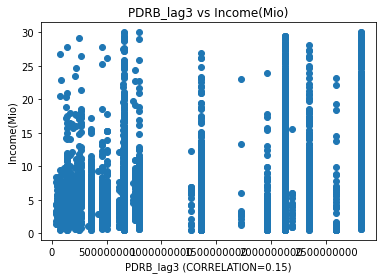

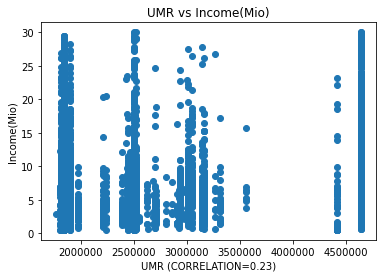

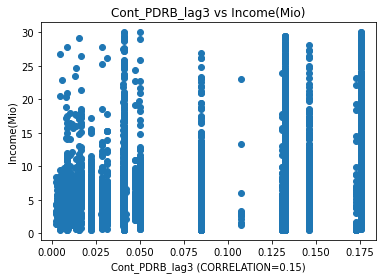

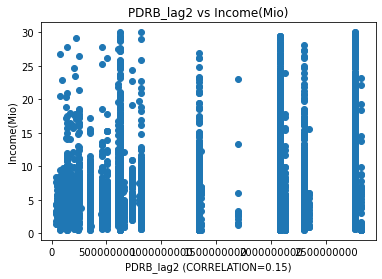

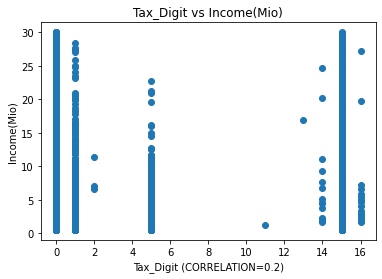

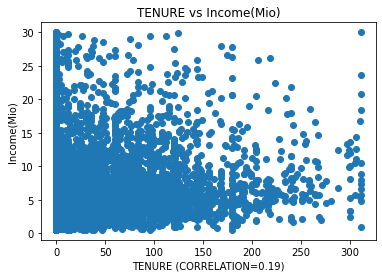

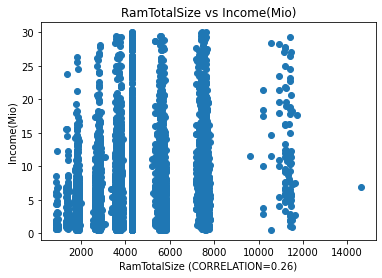

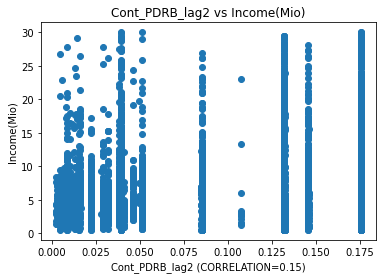

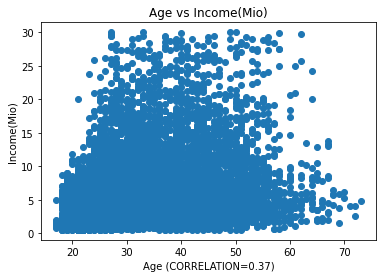

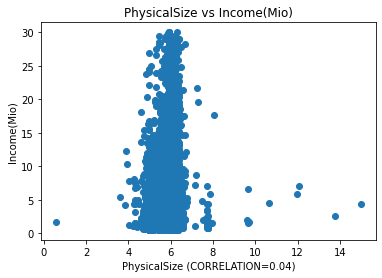

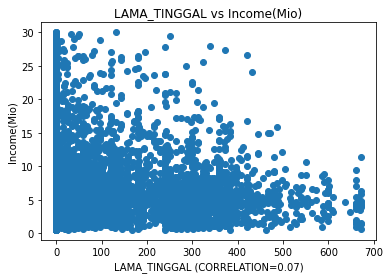

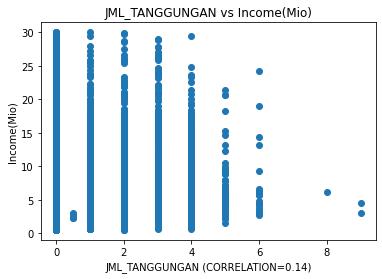

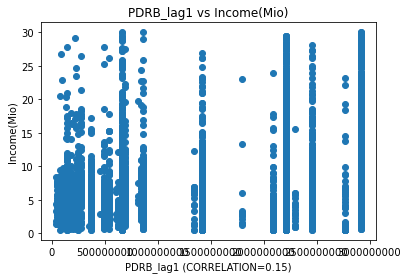

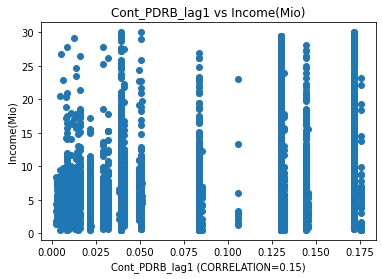

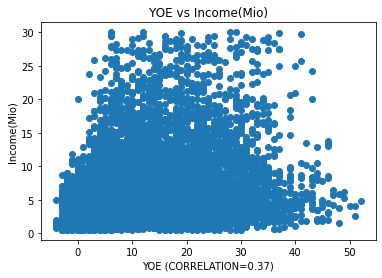

In [61]:
#Plot every numerical predictor
for i in cols_pred_num:
    plt.scatter(Train[i], Train['Avg_SalaryL3M']/1000000)
    plt.title(i +" vs Income(Mio)")
    plt.ticklabel_format(style='plain')
    plt.xlabel(i +' (CORRELATION='+ str(round(Train[[i,'Avg_SalaryL3M']].corr().iloc[1][0],2))+')')
    plt.ylabel("Income(Mio)")
    plt.show()

In [62]:
# Standardize Categorical Variable
Train['PROFESSION_Upper'] = Train['PROFESSION'].str.upper()
Train['JABATAN_Upper'] = Train['JABATAN'].str.upper() 
Train['JENIS_USAHA_Upper'] = Train['JENIS_USAHA'].str.upper()


Test['PROFESSION_Upper'] = Test['PROFESSION'].str.upper()
Test['JABATAN_Upper'] = Test['JABATAN'].str.upper() 
Test['JENIS_USAHA_Upper'] = Test['JENIS_USAHA'].str.upper()


Train['Avg_IncomeL3M_Mio'] = Train['Avg_SalaryL3M']/1000000
Test['Avg_IncomeL3M_Mio'] = Train['Avg_SalaryL3M']/1000000

In [ ]:
#Train.head()

In [63]:
Train['Age'].describe()

count    16653.000000
mean        30.077223
std          9.258903
min         17.000000
25%         23.000000
50%         28.000000
75%         35.000000
max         73.000000
Name: Age, dtype: float64

In [64]:
# for var discretization
#Train['JENIS_USAHA_Upper_grp'] = np.where(Train['JENIS_USAHA_Upper'].isin(['54-LAINNYA','12-INDUSTRI LAINNYA']), "'54-LAINNYA','12-INDUSTRI LAINNYA'",
#                                          np.where(Train['JENIS_USAHA_Upper'].isin(['19-PERDAGANGAN']), "19-PERDAGANGAN",
#                                                   np.where(Train['JENIS_USAHA_Upper'].isin(['27-SPBU']), "27-SPBU",
#                                                            np.where(Train['JENIS_USAHA_Upper'].isin(['44-PERBANKAN/ASURANSI/KEU','67-PERBANKAN/ASURANSI/KEU','44-PERBANKAN/ASURANSI/KEUANGAN','67-PERBANKAN/ASURANSI/KEU/BPR']), "44 & 67-PERBANKAN/ASURANSI/KEU/BPR",
#                                                                     np.where(Train['JENIS_USAHA_Upper'].isin(['18-DISTRIBUSI']), "18-DISTRIBUSI",
#                                                                              np.where(Train['JENIS_USAHA_Upper'].isin(['34-TRANSPORTASI/ANGKUTAN UMUM']), "34-TRANSPORTASI/ANGKUTAN UMUM",
#                                                                                       np.where(Train['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
#                                                                                                np.where(Train['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
#                                                                                                         'Others'))))))))
                                                            
                                                   
                              
                              
Train['YOE_grp'] = pd.cut(Train['YOE'], bins=[-4, 2, 7, 14, 52], include_lowest=True, labels=["(0_2)", "(3_7)", "(8_14)", "(>15)"])
Test['YOE_grp'] = pd.cut(Test['YOE'], bins=[-4, 2, 7, 14, 52], include_lowest=True, labels=["(0_2)", "(3_7)", "(8_14)", "(>15)"])

Train['Age_grp'] = pd.cut(Train['Age'], bins=[0, 23, 28, 35, 73], include_lowest=True, labels=["(<23)", "(24-28)", "(29-35)", "(>35)"])
Test['Age_grp'] = pd.cut(Test['Age'], bins=[0, 23, 28, 35, 73], include_lowest=True, labels=["(<23)", "(24-28)", "(29-35)", "(>35)"])


In [ ]:
#Train['YOE_grp'].unique()
#Train[['YOE_grp','Avg_SalaryL3M','YOE']].groupby('YOE_grp', as_index = False, dropna=False)['Avg_SalaryL3M'].agg(['count','mean'])

In [65]:
# for var analysis before discretization
pd.set_option('display.max_rows', None)
#char_analysis.sort(['a', 'b'], ascending=[True, False])

temp_char = char_analysis(Train,'YOE_grp','Avg_SalaryL3M')
temp_char.sort_values(['dist'], ascending=[False])

,count,mean,median,dist,attribute,mean_correlation,median_correlation,dist_correlation
bin,,,,,,,,
(0_2),4631,2.523269e+06,1.543833e+06,0.278088,YOE_grp,0.396405,0.38344,-0.327708
(3_7),4379,4.782404e+06,4.265100e+06,0.262956,YOE_grp,0.396405,0.38344,-0.327708
(>15),4026,7.196304e+06,5.329230e+06,0.241758,YOE_grp,0.396405,0.38344,-0.327708
(8_14),3617,6.248396e+06,5.223333e+06,0.217198,YOE_grp,0.396405,0.38344,-0.327708


In [ ]:
#"{:.14f}".format(float(9.487395e+06))

In [80]:
# for var analysis after discretization - run this after var discretization
#char_analysis(Train,'JENIS_USAHA_Profession_grp','Avg_SalaryL3M').sort_values(['mean'], ascending=[False])
#char_analysis(Train,'YOE_JABATAN_grp','Avg_SalaryL3M').sort_values(['dist'], ascending=[False])

In [ ]:
#char_analysis(Test,'PROVINCE_cln_grp','Avg_SalaryL3M').sort_values(['mean'], ascending=[False])

In [66]:
#Var Discretization / Binning
Train['MARITAL_STATUS_grp'] = np.where(Train['MARITAL_STATUS'].isin(['Janda/Duda','Nikah']), "'Janda/Duda','Nikah'", np.where(Train['MARITAL_STATUS'].isnull(), 'Empty',Train['MARITAL_STATUS']))
Test['MARITAL_STATUS_grp'] = np.where(Test['MARITAL_STATUS'].isin(['Janda/Duda','Nikah']), "'Janda/Duda','Nikah'", np.where(Test['MARITAL_STATUS'].isnull(), 'Empty' , Test['MARITAL_STATUS']))

Train['Brand_grp'] = np.where(Train['Brand'].isin(['samsung']), "'samsung'",
                              np.where(Train['Brand'].isin(['OPPO','vivo','xiaomi']), "'OPPO','vivo','xiaomi'",
                                       np.where(Train['Brand'].isin(['Redmi']), "'Redmi'",
                                                np.where(Train['Brand'].isin(['realme']), "'realme'",
                                                         np.where(Train['Brand'].isnull(), 'Empty','Others')))))

Test['Brand_grp'] = np.where(Test['Brand'].isin(['samsung']), "'samsung'",
                              np.where(Test['Brand'].isin(['OPPO','vivo','xiaomi']), "'OPPO','vivo','xiaomi'",
                                       np.where(Test['Brand'].isin(['Redmi']), "'Redmi'",
                                                np.where(Test['Brand'].isin(['realme']), "'realme'",
                                                         np.where(Test['Brand'].isnull(), 'Empty','Others')))))

Train['EMAIL_FINAL_GROUP_grp'] = np.where(Train['EMAIL_FINAL_GROUP'].isin(['gmail','gmai','gamil','gemail','gamail','gmal','gmil','g.mail','gimal','qmail','gmael','g','geamil','gemai','gma','gmaiil','gmail.id','gmail48','gmaill','gmailm','gmaip','gmall','gmqil','igmail']), "'gmail'",
                              np.where(Train['EMAIL_FINAL_GROUP'].isin(['yahoo','ymail','yhoo','yajoo','yaho','95yahoo']), "'yahoo'",
                                       'Others'))


Test['EMAIL_FINAL_GROUP_grp'] = np.where(Test['EMAIL_FINAL_GROUP'].isin(['gmail','gmai','gamil','gemail','gamail','gmal','gmil','g.mail','gimal','qmail','gmael','g','geamil','gemai','gma','gmaiil','gmail.id','gmail48','gmaill','gmailm','gmaip','gmall','gmqil','igmail']), "'gmail'",
                              np.where(Test['EMAIL_FINAL_GROUP'].isin(['yahoo','ymail','yhoo','yajoo','yaho','95yahoo']), "'yahoo'",
                                       'Others'))




Train['LocaleDisplayLanguage_grp'] = np.where(Train['LocaleDisplayLanguage'].isin(['Indonesia','Bahasa Indonesia']), "'Indonesia'",
                              np.where(Train['LocaleDisplayLanguage'].isin(['English']), "'English'",
                                       'Others'))
Test['LocaleDisplayLanguage_grp'] = np.where(Test['LocaleDisplayLanguage'].isin(['Indonesia','Bahasa Indonesia']), "'Indonesia'",
                              np.where(Test['LocaleDisplayLanguage'].isin(['English']), "'English'",
                                       'Others'))


Train['provider_final_grp'] = np.where(Train['provider_final'].isin(['Axis','Smart','Fren','Esia','Others']), "'Axis','Smart','Fren','Esia','Others'",
                              
                                       Train['provider_final'])
Test['provider_final_grp'] = np.where(Test['provider_final'].isin(['Axis','Smart','Fren','Esia','Others']), "'Axis','Smart','Fren','Esia','Others'",
                              
                                       Test['provider_final'])


Train['JABATAN_Upper_grp'] = np.where(Train['JABATAN_Upper'].isin(['01-NON STAFF']), "'01-NON STAFF'",
                                      np.where(Train['JABATAN_Upper'].isin(['02-STAFF']), "'02-STAFF'",
                                               np.where(Train['JABATAN_Upper'].isin(['06-MANAGER','07-SENIOR MANAGER','08-WAKIL DIREKTUR','09-DIREKTUR']), "'06-MANAGER UP'",
                                                        np.where(Train['JABATAN_Upper'].isin(['11-LAINNYA']), "'11-LAINNYA'",
                                                                 'Others'))))
Test['JABATAN_Upper_grp'] = np.where(Test['JABATAN_Upper'].isin(['01-NON STAFF']), "'01-NON STAFF'",
                                      np.where(Test['JABATAN_Upper'].isin(['02-STAFF']), "'02-STAFF'",
                                               np.where(Test['JABATAN_Upper'].isin(['06-MANAGER','07-SENIOR MANAGER','08-WAKIL DIREKTUR','09-DIREKTUR']), "'06-MANAGER UP'",
                                                        np.where(Test['JABATAN_Upper'].isin(['11-LAINNYA']), "'11-LAINNYA'",
                                                                 'Others'))))


Train['PROVINCE_cln_grp'] = np.where(Train['PROVINCE_cln'].isin(['JAWA BARAT','BANTEN']), "'JAWA BARAT','BANTEN'",
                                      np.where(Train['PROVINCE_cln'].isin(['SUMATERA UTARA','ACEH','SULAWESI UTARA','MALUKU']), "'SUMATERA UTARA','ACEH','SULAWESI UTARA','MALUKU'",
                                               np.where(Train['PROVINCE_cln'].isin(['JAWA TIMUR']), "'JAWA TIMUR'",
                                                        np.where(Train['PROVINCE_cln'].isin(['DKI JAKARTA']), "'DKI JAKARTA'",
                                                                 np.where(Train['PROVINCE_cln'].isin(['JAWA TENGAH']), "'JAWA TENGAH'",
                                                                          np.where(Train['PROVINCE_cln'].isin(['DAERAH ISTIMEWA YOGYAKARTA']), "'DAERAH ISTIMEWA YOGYAKARTA'",
                                                                                   'Others'))))))

Test['PROVINCE_cln_grp'] = np.where(Test['PROVINCE_cln'].isin(['JAWA BARAT','BANTEN']), "'JAWA BARAT','BANTEN'",
                                      np.where(Test['PROVINCE_cln'].isin(['SUMATERA UTARA','ACEH','SULAWESI UTARA','MALUKU']), "'SUMATERA UTARA','ACEH','SULAWESI UTARA','MALUKU'",
                                               np.where(Test['PROVINCE_cln'].isin(['JAWA TIMUR']), "'JAWA TIMUR'",
                                                        np.where(Test['PROVINCE_cln'].isin(['DKI JAKARTA']), "'DKI JAKARTA'",
                                                                 np.where(Test['PROVINCE_cln'].isin(['JAWA TENGAH']), "'JAWA TENGAH'",
                                                                          np.where(Test['PROVINCE_cln'].isin(['DAERAH ISTIMEWA YOGYAKARTA']), "'DAERAH ISTIMEWA YOGYAKARTA'",
                                                                                   'Others'))))))

Train['STATUS_TEMPAT_TINGGAL_grp'] = np.where((Train['STATUS_TEMPAT_TINGGAL'].isnull()) | (Train['STATUS_TEMPAT_TINGGAL'].isin(['Lainnya','Dinas','Pinjam'])), "'Lainnya','Dinas','Pinjam','Empty'",
                                                      Train['STATUS_TEMPAT_TINGGAL'])
Test['STATUS_TEMPAT_TINGGAL_grp'] = np.where((Test['STATUS_TEMPAT_TINGGAL'].isnull()) | (Test['STATUS_TEMPAT_TINGGAL'].isin(['Lainnya','Dinas','Pinjam'])), "'Lainnya','Dinas','Pinjam','Empty'",
                                                      Test['STATUS_TEMPAT_TINGGAL'])


Train['EDUCATION_grp'] = np.where((Train['EDUCATION'].isnull()) | (Train['EDUCATION'].isin(['Lainnya'])), "'Lainnya',''Empty'",
                                  np.where(Train['EDUCATION'].isin(['SLTA','SLTP','SD']),"'SLTA','SLTP','SD'",
                                           np.where(Train['EDUCATION'].isin(['D3/Akademi','Strata 1','Strata 2']),"'D3/Akademi','Strata 1','Strata 2'",
                                                      Train['EDUCATION'])))
Test['EDUCATION_grp'] = np.where((Test['EDUCATION'].isnull()) | (Test['EDUCATION'].isin(['Lainnya'])), "'Lainnya',''Empty'",
                                  np.where(Test['EDUCATION'].isin(['SLTA','SLTP','SD']),"'SLTA','SLTP','SD'",
                                           np.where(Test['EDUCATION'].isin(['D3/Akademi','Strata 1','Strata 2']),"'D3/Akademi','Strata 1','Strata 2'",
                                                      Test['EDUCATION'])))


Train['PROFESSION_Upper_grp'] = np.where(Train['PROFESSION_Upper'].isin(['24-PEGAWAI SWASTA']), "'24-PEGAWAI SWASTA'",
                                  np.where(Train['PROFESSION_Upper'].isin(['15-NON FORMAL LAINNYA']),"'15-NON FORMAL LAINNYA'",
                                           np.where(Train['PROFESSION_Upper'].isin(['17-PELAJAR/MAHASISWA']),"'17-PELAJAR/MAHASISWA'",
                                                    np.where(Train['PROFESSION_Upper'].isin(['06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU']),"'06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU'",
                                                      'Others'))))
Test['PROFESSION_Upper_grp'] = np.where(Test['PROFESSION_Upper'].isin(['24-PEGAWAI SWASTA']), "'24-PEGAWAI SWASTA'",
                                  np.where(Test['PROFESSION_Upper'].isin(['15-NON FORMAL LAINNYA']),"'15-NON FORMAL LAINNYA'",
                                           np.where(Test['PROFESSION_Upper'].isin(['17-PELAJAR/MAHASISWA']),"'17-PELAJAR/MAHASISWA'",
                                                    np.where(Test['PROFESSION_Upper'].isin(['06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU']),"'06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU'",
                                                      'Others'))))

Train['Tax_Digit_grp'] = np.where(Train['Tax_Digit'].isin([15,16]), 'True',
                                  'False')

Test['Tax_Digit_grp'] = np.where(Test['Tax_Digit'].isin([15,16]), 'True',
                                  'False')
                                                            


Train['Brand_all_grp'] = np.where(Train['Brand_all'].isin(['samsung']), "'samsung'",
                                  np.where(Train['Brand_all'].isin(['Apple']), "'Apple'",
                              np.where(Train['Brand_all'].isin(['OPPO','vivo','xiaomi']), "'OPPO','vivo','xiaomi'",
                                       np.where(Train['Brand_all'].isin(['Redmi']), "'Redmi'",
                                                np.where(Train['Brand_all'].isin(['realme']), "'realme'",
                                                         np.where(Train['Brand_all'].isnull(), 'Empty','Others'))))))
Test['Brand_all_grp'] = np.where(Test['Brand_all'].isin(['samsung']), "'samsung'",
                                 np.where(Test['Brand_all'].isin(['Apple']), "'Apple'",
                              np.where(Test['Brand_all'].isin(['OPPO','vivo','xiaomi']), "'OPPO','vivo','xiaomi'",
                                       np.where(Test['Brand_all'].isin(['Redmi']), "'Redmi'",
                                                np.where(Test['Brand_all'].isin(['realme']), "'realme'",
                                                         np.where(Test['Brand_all'].isnull(), 'Empty','Others'))))))

Train['EMAIL_FINAL_ALL_GROUP_grp'] = np.where(Train['EMAIL_FINAL_ALL_GROUP'].isin(['gmail','gmai','gamil','gemail','gamail','gmal','gmil','g.mail','gimal','qmail','gmael','g','geamil','gemai','gma','gmaiil','gmail.id','gmail48','gmaill','gmailm','gmaip','gmall','gmqil','igmail']), "'gmail'",
                              np.where(Train['EMAIL_FINAL_ALL_GROUP'].isin(['yahoo','ymail','yhoo','yajoo','yaho','95yahoo']), "'yahoo'",
                                       'Others'))


Test['EMAIL_FINAL_ALL_GROUP_grp'] = np.where(Test['EMAIL_FINAL_ALL_GROUP'].isin(['gmail','gmai','gamil','gemail','gamail','gmal','gmil','g.mail','gimal','qmail','gmael','g','geamil','gemai','gma','gmaiil','gmail.id','gmail48','gmaill','gmailm','gmaip','gmall','gmqil','igmail']), "'gmail'",
                              np.where(Test['EMAIL_FINAL_ALL_GROUP'].isin(['yahoo','ymail','yhoo','yajoo','yaho','95yahoo']), "'yahoo'",
                                       'Others'))



Train['EMAIL_GROUP_grp'] = np.where(Train['EMAIL_GROUP'].isin(['gmail','gmai','gamil','gemail','gamail','gmal','gmil','g.mail','gimal','qmail','gmael','g','geamil','gemai','gma','gmaiil','gmail.id','gmail48','gmaill','gmailm','gmaip','gmall','gmqil','igmail']), "'gmail'",
                              np.where(Train['EMAIL_GROUP'].isin(['yahoo','ymail','yhoo','yajoo','yaho','95yahoo']), "'yahoo'",
                                       'Others'))


Test['EMAIL_GROUP_grp'] = np.where(Test['EMAIL_GROUP'].isin(['gmail','gmai','gamil','gemail','gamail','gmal','gmil','g.mail','gimal','qmail','gmael','g','geamil','gemai','gma','gmaiil','gmail.id','gmail48','gmaill','gmailm','gmaip','gmall','gmqil','igmail']), "'gmail'",
                              np.where(Test['EMAIL_GROUP'].isin(['yahoo','ymail','yhoo','yajoo','yaho','95yahoo']), "'yahoo'",
                                       'Others'))


Train['JENIS_USAHA_Upper_grp'] = np.where(Train['JENIS_USAHA_Upper'].isin(['54-LAINNYA','12-INDUSTRI LAINNYA']), "'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                          np.where(Train['JENIS_USAHA_Upper'].isin(['19-PERDAGANGAN']), "19-PERDAGANGAN",
                                                   np.where(Train['JENIS_USAHA_Upper'].isin(['27-SPBU']), "27-SPBU",
                                                            np.where(Train['JENIS_USAHA_Upper'].isin(['44-PERBANKAN/ASURANSI/KEU','67-PERBANKAN/ASURANSI/KEU','44-PERBANKAN/ASURANSI/KEUANGAN','67-PERBANKAN/ASURANSI/KEU/BPR']), "44 & 67-PERBANKAN/ASURANSI/KEU/BPR",
                                                                     np.where(Train['JENIS_USAHA_Upper'].isin(['18-DISTRIBUSI']), "18-DISTRIBUSI",
                                                                              np.where(Train['JENIS_USAHA_Upper'].isin(['34-TRANSPORTASI/ANGKUTAN UMUM']), "34-TRANSPORTASI/ANGKUTAN UMUM",
                                                                                       np.where(Train['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
                                                                                                np.where(Train['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
                                                                                                         'Others'))))))))
Test['JENIS_USAHA_Upper_grp'] = np.where(Test['JENIS_USAHA_Upper'].isin(['54-LAINNYA','12-INDUSTRI LAINNYA']), "'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                          np.where(Test['JENIS_USAHA_Upper'].isin(['19-PERDAGANGAN']), "19-PERDAGANGAN",
                                                   np.where(Test['JENIS_USAHA_Upper'].isin(['27-SPBU']), "27-SPBU",
                                                            np.where(Test['JENIS_USAHA_Upper'].isin(['44-PERBANKAN/ASURANSI/KEU','67-PERBANKAN/ASURANSI/KEU','44-PERBANKAN/ASURANSI/KEUANGAN','67-PERBANKAN/ASURANSI/KEU/BPR']), "44 & 67-PERBANKAN/ASURANSI/KEU/BPR",
                                                                     np.where(Test['JENIS_USAHA_Upper'].isin(['18-DISTRIBUSI']), "18-DISTRIBUSI",
                                                                              np.where(Test['JENIS_USAHA_Upper'].isin(['34-TRANSPORTASI/ANGKUTAN UMUM']), "34-TRANSPORTASI/ANGKUTAN UMUM",
                                                                                       np.where(Test['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
                                                                                                np.where(Test['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
                                                                                                         'Others'))))))))


In [67]:
# Add variable Interaction

Train['MaritalStat_NPWP_grp'] = Train['MARITAL_STATUS_grp'].astype(str) +'__'+ Train['Tax_Digit_grp'].astype(str)
Test['MaritalStat_NPWP_grp'] = Test['MARITAL_STATUS_grp'].astype(str) +'__'+ Test['Tax_Digit_grp'].astype(str)



Train['Email_NPWP_grp'] = Train['EMAIL_GROUP_grp'] + '__' + Train['Tax_Digit_grp']
Train['Email_NPWP_grp'] = np.where(Train['Email_NPWP_grp'].isin(['Others__True','Others__False']),"'Others'",
                                   Train['Email_NPWP_grp'])

Test['Email_NPWP_grp'] = Test['EMAIL_GROUP_grp'] + '__' + Test['Tax_Digit_grp']
Test['Email_NPWP_grp'] = np.where(Test['Email_NPWP_grp'].isin(['Others__True','Others__False']),"'Others'",
                                   Test['Email_NPWP_grp'])


Train['Email_MaritalStat_grp'] = Train['EMAIL_GROUP_grp'] + '__' + Train['MARITAL_STATUS_grp']
Train['Email_MaritalStat_grp'] = np.where(Train['Email_MaritalStat_grp'].isin(["Others__'Janda/Duda','Nikah'","Others__Tidak Menikah"]),"'Others'",
                                          Train['Email_MaritalStat_grp'])

Test['Email_MaritalStat_grp'] = Test['EMAIL_GROUP_grp'] + '__' + Test['MARITAL_STATUS_grp']
Test['Email_MaritalStat_grp'] = np.where(Test['Email_MaritalStat_grp'].isin(["Others__'Janda/Duda','Nikah'","Others__Tidak Menikah"]),"'Others'",
                                          Test['Email_MaritalStat_grp'])


Train['JENIS_USAHA_Profession_grp'] = Train['PROFESSION_Upper_grp'] + '__' + Train['JENIS_USAHA_Upper_grp']
Train['JENIS_USAHA_Profession_grp'] = np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                               np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__Others"]),"'24-PEGAWAI SWASTA'__Others",
                                                        np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__19-PERDAGANGAN"]),"'24-PEGAWAI SWASTA'__19-PERDAGANGAN",
                                                                 np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__27-SPBU"]),"'24-PEGAWAI SWASTA'__27-SPBU",
                                                                          np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'15-NON FORMAL LAINNYA'__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"'15-NON FORMAL LAINNYA'__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                                                                   np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU'__44 & 67-PERBANKAN/ASURANSI/KEU/BPR"]),"'06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU'__44 & 67-PERBANKAN/ASURANSI/KEU/BPR",
                                                                                            np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'17-PELAJAR/MAHASISWA'__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"'17-PELAJAR/MAHASISWA'__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                                                                                     np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__18-DISTRIBUSI"]),"'24-PEGAWAI SWASTA'__18-DISTRIBUSI",
                                                                                                              np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__37-DEALER MOTOR/MOBIL"]),"'24-PEGAWAI SWASTA'__37-DEALER MOTOR/MOBIL",
                                                                                                                       np.where(Train['JENIS_USAHA_Profession_grp'].isin(["Others__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"Others__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                                                                                                                np.where(Train['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__34-TRANSPORTASI/ANGKUTAN UMUM"]),"'24-PEGAWAI SWASTA'__34-TRANSPORTASI/ANGKUTAN UMUM",
                                                                                                                                         'Others')))))))))))

Test['JENIS_USAHA_Profession_grp'] = Test['PROFESSION_Upper_grp'] + '__' + Test['JENIS_USAHA_Upper_grp']
Test['JENIS_USAHA_Profession_grp'] = np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                               np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__Others"]),"'24-PEGAWAI SWASTA'__Others",
                                                        np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__19-PERDAGANGAN"]),"'24-PEGAWAI SWASTA'__19-PERDAGANGAN",
                                                                 np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__27-SPBU"]),"'24-PEGAWAI SWASTA'__27-SPBU",
                                                                          np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'15-NON FORMAL LAINNYA'__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"'15-NON FORMAL LAINNYA'__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                                                                   np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU'__44 & 67-PERBANKAN/ASURANSI/KEU/BPR"]),"'06-PEGAWAI PENYEDIA JASA KEUANGAN','06-PEGAWAI PENYEDIA JASA KEU'__44 & 67-PERBANKAN/ASURANSI/KEU/BPR",
                                                                                            np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'17-PELAJAR/MAHASISWA'__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"'17-PELAJAR/MAHASISWA'__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                                                                                     np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__18-DISTRIBUSI"]),"'24-PEGAWAI SWASTA'__18-DISTRIBUSI",
                                                                                                              np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__37-DEALER MOTOR/MOBIL"]),"'24-PEGAWAI SWASTA'__37-DEALER MOTOR/MOBIL",
                                                                                                                       np.where(Test['JENIS_USAHA_Profession_grp'].isin(["Others__'54-LAINNYA','12-INDUSTRI LAINNYA'"]),"Others__'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                                                                                                                np.where(Test['JENIS_USAHA_Profession_grp'].isin(["'24-PEGAWAI SWASTA'__34-TRANSPORTASI/ANGKUTAN UMUM"]),"'24-PEGAWAI SWASTA'__34-TRANSPORTASI/ANGKUTAN UMUM",
                                                                                                                                         'Others')))))))))))




In [68]:
Train['YOE_JABATAN_grp'] = Train['YOE_grp'].astype(str) + '__' + Train['JABATAN_Upper_grp']
Test['YOE_JABATAN_grp'] = Test['YOE_grp'].astype(str) + '__' + Test['JABATAN_Upper_grp']


Train['YOE_JABATAN_grp'] = np.where(Train['YOE_JABATAN_grp'].isin(["(3_7)__'11-LAINNYA'","(8_14)__'11-LAINNYA'","(>15)__'11-LAINNYA'"]), "(3+)__'11-LAINNYA'", np.where(Train['JABATAN_Upper_grp'].isin(["'06-MANAGER UP'"]), "'06-MANAGER UP'",np.where(Train['JABATAN_Upper_grp'].isin(['Others']), 'Others', np.where(Train['YOE_JABATAN_grp'].isin(["(8_14)__'01-NON STAFF'","(>15)__'01-NON STAFF'"]), "(>8)__'01-NON STAFF'" ,Train['YOE_JABATAN_grp']))))
Test['YOE_JABATAN_grp'] = np.where(Test['YOE_JABATAN_grp'].isin(["(3_7)__'11-LAINNYA'","(8_14)__'11-LAINNYA'","(>15)__'11-LAINNYA'"]), "(3+)__'11-LAINNYA'", np.where(Test['JABATAN_Upper_grp'].isin(["'06-MANAGER UP'"]), "'06-MANAGER UP'",np.where(Test['JABATAN_Upper_grp'].isin(['Others']), 'Others', np.where(Test['YOE_JABATAN_grp'].isin(["(8_14)__'01-NON STAFF'","(>15)__'01-NON STAFF'"]), "(>8)__'01-NON STAFF'" ,Test['YOE_JABATAN_grp']))))


Train['EDUCATION_JABATAN_grp'] = Train['EDUCATION_grp'].astype(str) + '__' + Train['JABATAN_Upper_grp']
Test['EDUCATION_JABATAN_grp'] = Test['EDUCATION_grp'].astype(str) + '__' + Test['JABATAN_Upper_grp']

Train['EDUCATION_Age_grp'] = Train['EDUCATION_grp'].astype(str) + '__' + Train['Age_grp'].astype(str)
Test['EDUCATION_Age_grp'] = Test['EDUCATION_grp'].astype(str) + '__' + Test['Age_grp'].astype(str)


Train['EDUCATION_Age_grp'] = np.where(Train['Age_grp'].isin(['(<23)']), '(<23)',
                                  Train['EDUCATION_Age_grp'])

Test['EDUCATION_Age_grp'] = np.where(Test['Age_grp'].isin(['(<23)']), '(<23)',
                                  Test['EDUCATION_Age_grp'])


In [84]:
#drop unused binning
#Train = Train.drop(['JABATAN_YOE_grp'], axis=1)
#Test = Test.drop(['JABATAN_YOE_grp'], axis=1)

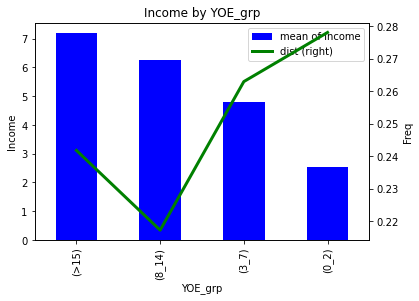

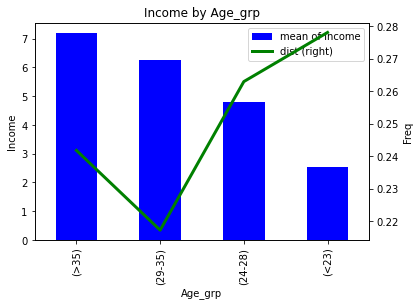

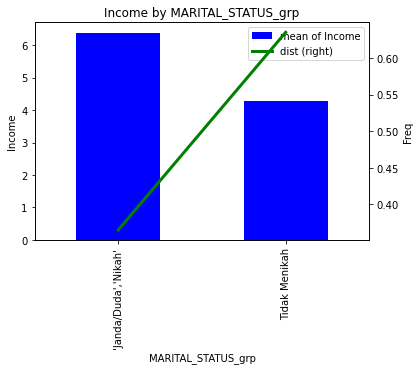

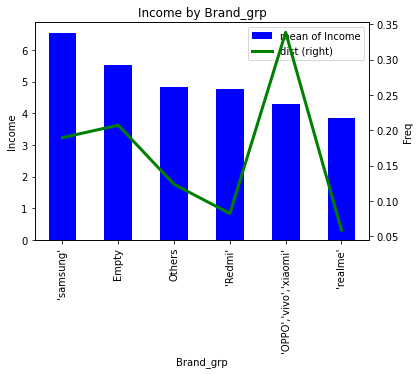

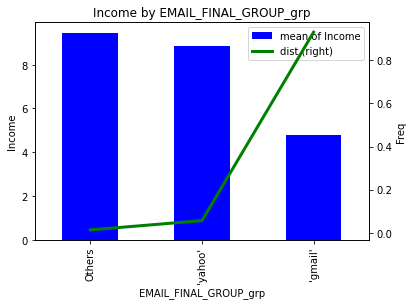

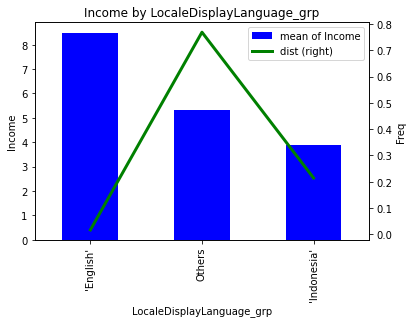

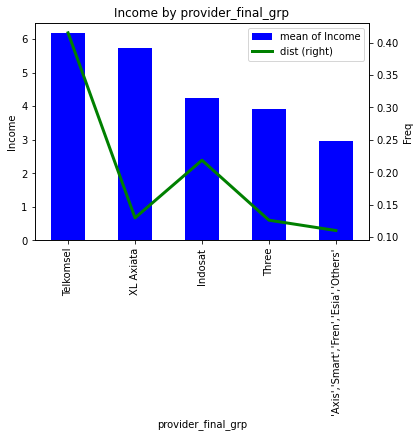

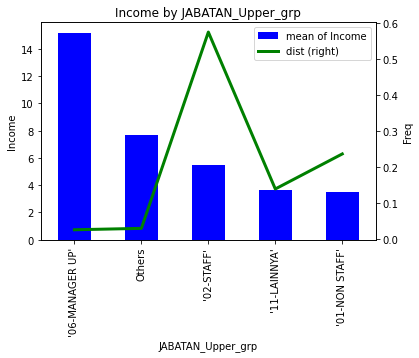

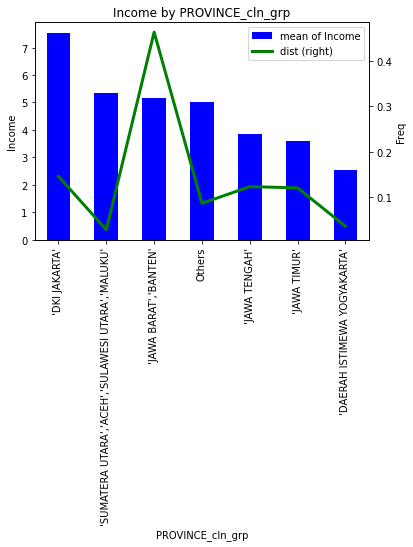

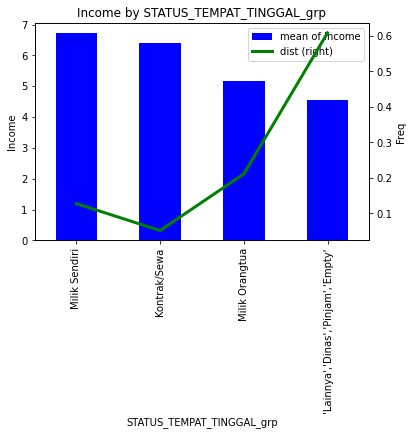

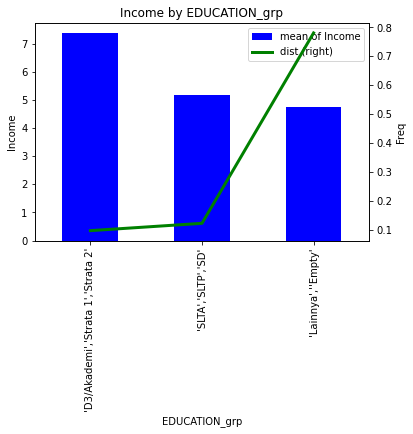

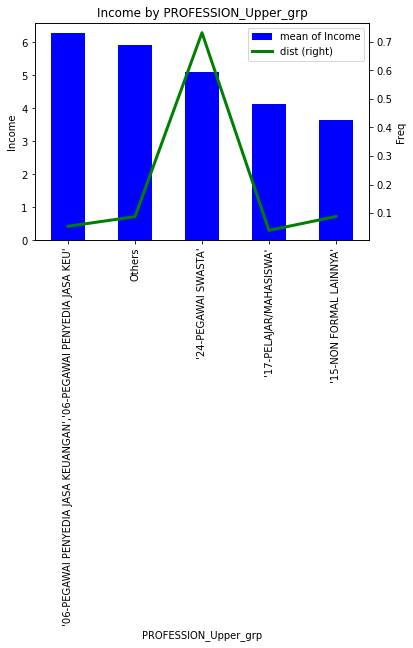

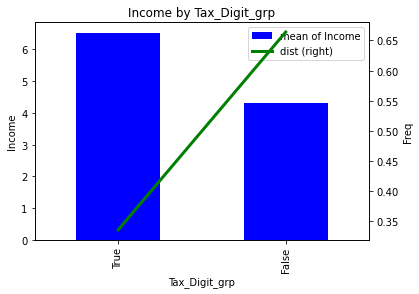

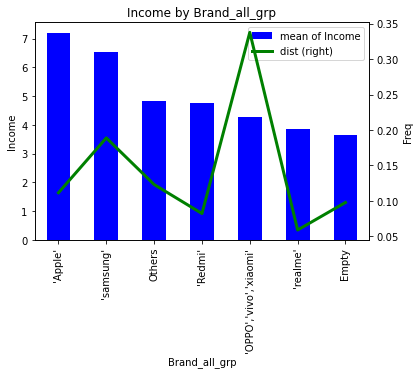

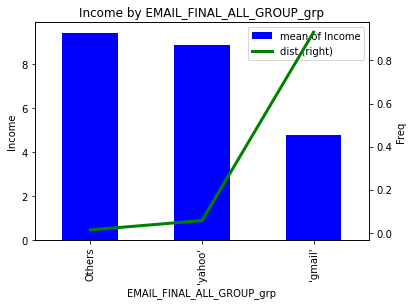

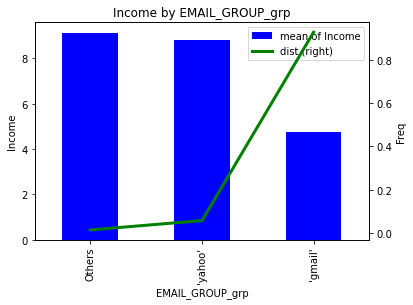

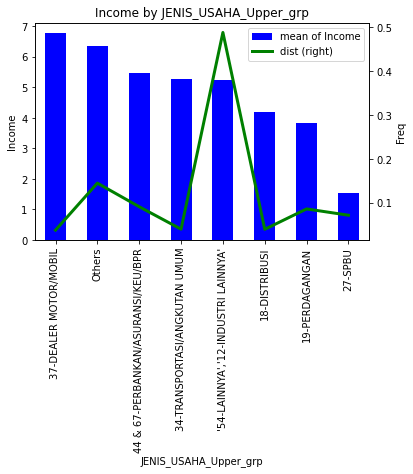

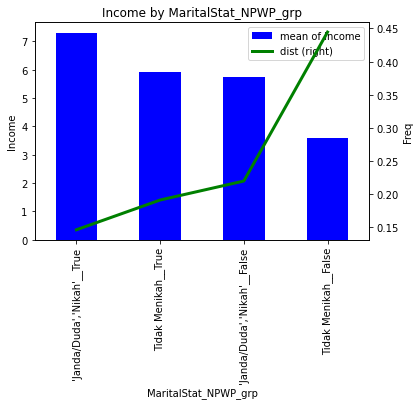

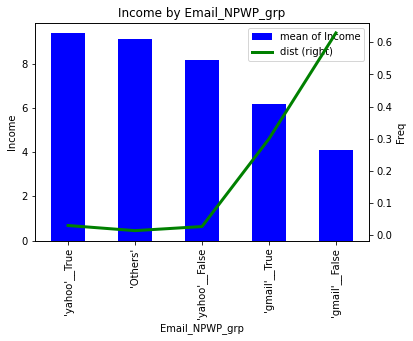

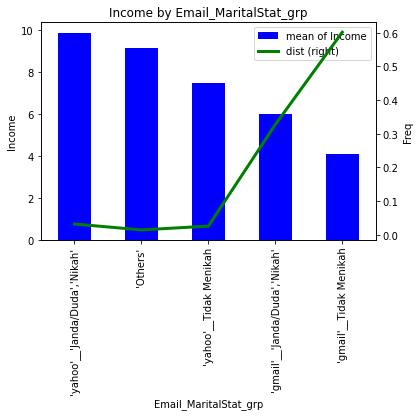

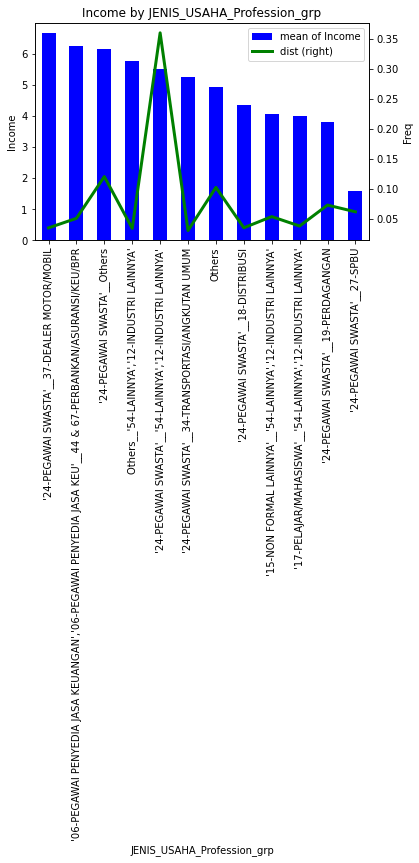

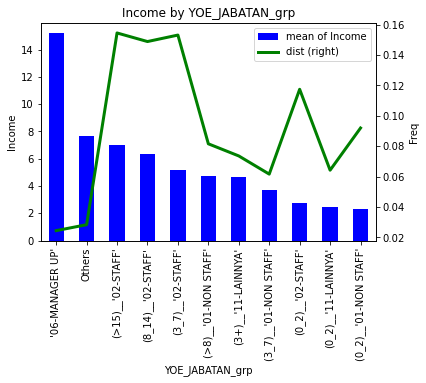

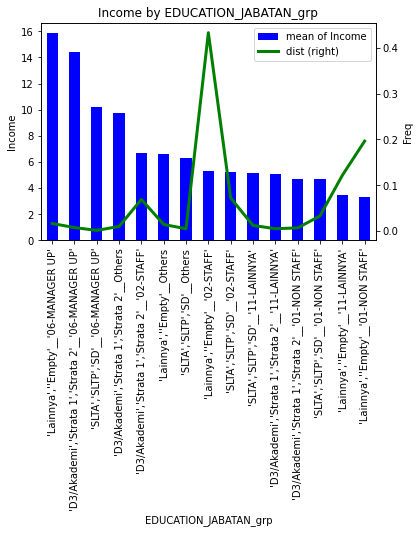

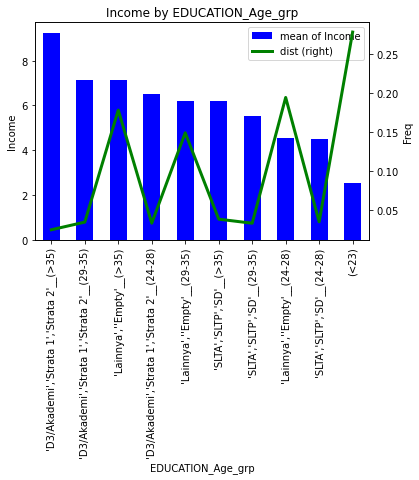

In [69]:
# Plot Cat_grp var
grp_cols = [col for col in Train.columns if '_grp' in col]
for i in grp_cols:
    ax = char_analysis(Train,i,'Avg_IncomeL3M_Mio').sort_values(['mean'], ascending=[False]).plot(kind = 'bar', use_index=True,
                  y = 'mean', color = 'Blue',rot=90,
                  linewidth = 3, label = 'mean of Income')

    ax2 = char_analysis(Train,i,'Avg_IncomeL3M_Mio').sort_values(['mean'], ascending=[False]).plot(kind = 'line', use_index=True,
                   y = 'dist', secondary_y = True,
                   color = 'Green', rot=90,  linewidth = 3,
                   ax = ax)


    plt.xticks(rotation=90)
    #title of the plot
    plt.title("Income by "+i)



    #labeling x and y-axis
    ax.set_xlabel(i, color = 'k')
    ax.set_ylabel('Income', color = "k")
    ax2.set_ylabel('Freq', color = 'k')


    plt.show()

In [ ]:
#grp_cols2 = list(set(grp_cols)-set(['JABATAN_YOE_grp']))

In [ ]:
#grp_cols

In [ ]:
#char_analysis(Train,'YOE_JABATAN_grp','Avg_SalaryL3M')

In [70]:
# Char Group Analysis Train
attributes_cat_train_grp =pd.DataFrame()
for i in grp_cols:
    attribute_cat_train_grp = char_analysis(Train,i,'Avg_SalaryL3M')
    attribute_cat_train_grp['bin'] = attribute_cat_train_grp.index
    attribute_cat_train_grp = attribute_cat_train_grp.reset_index(drop=True)
    attributes_cat_train_grp = pd.concat([attributes_cat_train_grp, attribute_cat_train_grp])
attributes_cat_train_grp    

,count,mean,median,dist,attribute,mean_correlation,median_correlation,dist_correlation,bin
0,4631,2.523269e+06,1.543833e+06,0.278088,YOE_grp,0.396405,0.383440,-0.327708,(0_2)
1,4379,4.782404e+06,4.265100e+06,0.262956,YOE_grp,0.396405,0.383440,-0.327708,(3_7)
2,3617,6.248396e+06,5.223333e+06,0.217198,YOE_grp,0.396405,0.383440,-0.327708,(8_14)
3,4026,7.196304e+06,5.329230e+06,0.241758,YOE_grp,0.396405,0.383440,-0.327708,(>15)
0,4631,2.523269e+06,1.543833e+06,0.278088,Age_grp,0.396405,0.383440,-0.327708,(<23)
1,4379,4.782404e+06,4.265100e+06,0.262956,Age_grp,0.396405,0.383440,-0.327708,(24-28)
2,3617,6.248396e+06,5.223333e+06,0.217198,Age_grp,0.396405,0.383440,-0.327708,(29-35)
3,4026,7.196304e+06,5.329230e+06,0.241758,Age_grp,0.396405,0.383440,-0.327708,(>35)
0,6077,6.380895e+06,4.882958e+06,0.364919,MARITAL_STATUS_grp,0.221839,0.221839,-0.221839,"'Janda/Duda','Nikah'"
1,10576,4.294958e+06,3.180741e+06,0.635081,MARITAL_STATUS_grp,0.221839,0.221839,-0.221839,Tidak Menikah


In [71]:
attributes_cat_train_grp.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\var_grp_distribution.csv')

In [ ]:
#ax = char_analysis(Train,'Brand_grp','Avg_IncomeL3M_Mio').plot(kind = 'line', x = index,
#                  y = 'Height', color = 'Blue',
#                  linewidth = 3)
 
#ax2 = char_analysis(Train,i,'Avg_IncomeL3M_Mio').plot(kind = 'line', x = 'Name',
#                   y = 'Weight', secondary_y = True,
#                   color = 'Red',  linewidth = 3,
#                   ax = ax)
 
#title of the plot
#plt.title("Student Data")
 
#labeling x and y-axis
#ax.set_xlabel('Name', color = 'g')
#ax.set_ylabel('Height', color = "b")
#ax2.set_ylabel('Weight', color = 'r')

 
#defining display layout
#plt.tight_layout()
 
#show plot
#plt.show()
#Output

In [ ]:
#grp_cols = [col for col in Train.columns if '_grp' in col]
#for i in grp_cols:
    #ax = char_analysis(Train,'providerclass_grp','max_income_proxy')[['mean']].plot(kind='bar')
#    ax = char_analysis(Train,i,'Avg_IncomeL3M_Mio')[['mean']].sort_values(['mean'], ascending=[False])
#    ax2 = char_analysis(Train,i,'Avg_IncomeL3M_Mio')[['dist']]
#    plt.bar(data=ax, x= ax.index, height='mean')
    #plt.bar(data =ax2, x=ax2.index, height ='dist')
#    plt.plot(ax2.index,ax2, color='orange')
    #char_analysis(Train,i,'Avg_IncomeL3M_Mio').plot(y='dist' , ax= ax2.index, secondary_y=True)
    
#    plt.title('Income by '+i )
#    plt.xticks(rotation=90)
#    plt.xlabel(i)
#    plt.ylabel('Income(Mio)')
    #plt.savefig('provider_grp.png')
#    plt.show()

In [ ]:
# Char Group Analysis Train
#attributes_cat_train_grp =pd.DataFrame()
#for i in grp_cols:
#    attribute_cat_train_grp = char_analysis(Train,i,'Avg_SalaryL3M')
#    attribute_cat_train_grp['bin'] = attribute_cat_train_grp.index
#    attribute_cat_train_grp = attribute_cat_train_grp.reset_index(drop=True)
#    attributes_cat_train_grp = pd.concat([attributes_cat_train_grp, attribute_cat_train_grp])

In [ ]:
# Char Analysis Train
#attributes_cat_train_grp =pd.DataFrame()
#for i in grp_cols:
#    attribute_cat_train_grp = char_analysis(Train,i,'Avg_SalaryL3M')
#    attributes_cat_train_grp = pd.concat([attributes_cat_train_grp, attribute_cat_train_grp])

In [72]:
char_cat_train_grp = attributes_cat_train_grp[['attribute','mean_correlation','median_correlation','dist_correlation']].drop_duplicates()
pd.set_option('display.max_rows', char_cat_train_grp.shape[0]+1)
char_cat_train_grp
#char_cat_train_grp.head(15)

,attribute,mean_correlation,median_correlation,dist_correlation
0,YOE_grp,0.396405,0.383440,-0.327708
0,Age_grp,0.396405,0.383440,-0.327708
0,MARITAL_STATUS_grp,0.221839,0.221839,-0.221839
0,Brand_grp,0.193809,0.190005,-0.054296
0,EMAIL_FINAL_GROUP_grp,0.236754,0.236715,-0.236597
0,LocaleDisplayLanguage_grp,0.161340,0.160040,0.084799
0,provider_final_grp,0.258047,0.256975,0.203960
0,JABATAN_Upper_grp,0.421536,0.418079,0.034631
0,PROVINCE_cln_grp,0.276359,0.272172,0.039383
0,STATUS_TEMPAT_TINGGAL_grp,0.171563,0.154007,-0.151094


In [73]:
attributes_cat_test_grp =pd.DataFrame()
for i in grp_cols:
    attribute_cat_test_grp = char_analysis(Test,i,'Avg_SalaryL3M')
    attribute_cat_test_grp['bin'] = attribute_cat_test_grp.index
    attribute_cat_test_grp = attribute_cat_test_grp.reset_index(drop=True)
    attributes_cat_test_grp = pd.concat([attributes_cat_test_grp, attribute_cat_test_grp])

In [74]:
attributes_cat_test_grp

,count,mean,median,dist,attribute,mean_correlation,median_correlation,dist_correlation,bin
0,2165,2.847908e+06,1.533333e+06,0.390020,YOE_grp,0.457872,0.453177,-0.420085,(0_2)
1,1428,3.931432e+06,3.056300e+06,0.257251,YOE_grp,0.457872,0.453177,-0.420085,(3_7)
2,989,7.191793e+06,5.677333e+06,0.178166,YOE_grp,0.457872,0.453177,-0.420085,(8_14)
3,969,8.074195e+06,6.000000e+06,0.174563,YOE_grp,0.457872,0.453177,-0.420085,(>15)
0,2165,2.847908e+06,1.533333e+06,0.390020,Age_grp,0.457872,0.453177,-0.420085,(<23)
...,...,...,...,...,...,...,...,...,...
5,839,8.164044e+06,6.286667e+06,0.151144,EDUCATION_Age_grp,0.467820,0.464166,-0.359964,"'Lainnya',''Empty'__(>35)"
6,167,3.595255e+06,3.236413e+06,0.030085,EDUCATION_Age_grp,0.467820,0.464166,-0.359964,"'SLTA','SLTP','SD'__(24-28)"
7,125,6.889673e+06,5.006156e+06,0.022518,EDUCATION_Age_grp,0.467820,0.464166,-0.359964,"'SLTA','SLTP','SD'__(29-35)"
8,89,5.911676e+06,4.908000e+06,0.016033,EDUCATION_Age_grp,0.467820,0.464166,-0.359964,"'SLTA','SLTP','SD'__(>35)"


In [75]:
char_cat_test_grp = attributes_cat_test_grp[['attribute','mean_correlation','median_correlation','dist_correlation']].drop_duplicates()
pd.set_option('display.max_rows', char_cat_test_grp.shape[0]+1)

In [76]:
Properties2 = getProperties(Train[grp_cols])
pd.options.display.max_rows = len(Properties2)
#display(Properties2)

In [77]:
#New Summary

Table_cat_grp = pd.merge(Properties2[Properties2['Feature'].isin(grp_cols)][['Feature','nullPct','Number of Unique']],char_cat_train_grp[['attribute','mean_correlation']], how='left', left_on = 'Feature', right_on = 'attribute', indicator=False)
Table_cat_grp = pd.merge(Table_cat_grp.rename(columns={'mean_correlation': 'Correlation_Train'}),char_cat_test_grp[['attribute','mean_correlation']], how='left', left_on = 'Feature', right_on = 'attribute', indicator=False)
Table_cat_grp = Table_cat_grp.rename(columns={'mean_correlation': 'Correlation_Test'})
Table_cat_grp = Table_cat_grp.drop(['attribute_x','attribute_y'], axis=1)
Table_cat_grp['Type'] = 'categorical' 


#Table_num = pd.merge(Properties[Properties['Feature'].isin(cols_pred_num)][['Feature','nullPct','Number of Unique']],char_num_train[['Avg_SalaryL3M']], how='left', left_on = 'Feature', right_index = True, indicator=False)
#Table_num = Table_num.rename(columns={'Avg_SalaryL3M':'Correlation_Train'})
#Table_num = pd.merge(Table_num, char_num_test[['Avg_SalaryL3M']], how='left', left_on = 'Feature', right_index = True, indicator=False )
#Table_num = Table_num.rename(columns={'Avg_SalaryL3M':'Correlation_Test'})
#Table_num['Type'] = 'numerical'

Table_grp = pd.concat([Table_cat_grp,Table_num],axis=0)
Table_grp.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Feature2.csv')
pd.set_option('display.max_rows', None)
Table_grp.sort_values(['Correlation_Train'],ascending=[False])

,Feature,nullPct,Number of Unique,Correlation_Train,Correlation_Test,Type
21,YOE_JABATAN_grp,0.00,11,0.515233,0.508178,categorical
22,EDUCATION_JABATAN_grp,0.00,15,0.440190,0.376065,categorical
7,JABATAN_Upper_grp,0.00,5,0.421536,0.361477,categorical
23,EDUCATION_Age_grp,0.00,10,0.414884,0.467820,categorical
0,YOE_grp,0.00,4,0.396405,0.457872,categorical
1,Age_grp,0.00,4,0.396405,0.457872,categorical
14,Age,0.00,57,0.367850,0.434309,numerical
46,YOE,0.00,57,0.367850,0.434309,numerical
18,Email_NPWP_grp,0.00,5,0.312367,0.351440,categorical
17,MaritalStat_NPWP_grp,0.00,4,0.308721,0.407107,categorical


In [ ]:
#Train.columns

<AxesSubplot:xlabel='PROVINCE_cln'>

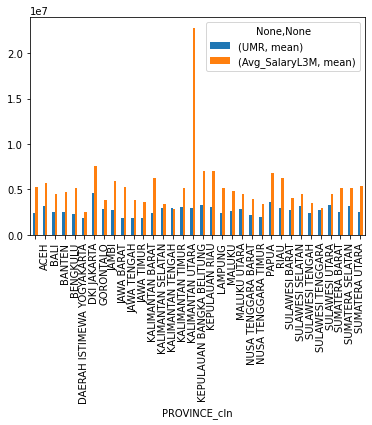

In [80]:
Train2 = Train
#Train2['Avg_IncomeL3M_Mio'] = Train['Avg_IncomeL3M_Mio']
ax = Train2.groupby('PROVINCE_cln', as_index = False, dropna=True)[['UMR','Avg_SalaryL3M']].agg(['mean'])
#plt.ticklabel_format(style='plain')
#plt.yticks(style='plain')
ax.plot(kind ="bar")
#plt.show()

#ax_plot = ax.plot(x=ax.index, y=['UMR','max_income_proxy'], kind="bar", rot=0)

#df2.groupby(attribute, as_index = False, dropna=False)[target].agg(['count','mean','median'])

#df.plot(x="X", y=["A", "B", "C"], kind="bar", rot=0)

In [ ]:
# Char Analysis Train Grp
#grp_attributes_cat_train =pd.DataFrame()
#for i in grp_cols:
#    grp_attribute_cat_train = char_analysis(Train,i,'Avg_SalaryL3M')
#    grp_attributes_cat_train = pd.concat([grp_attributes_cat_train, grp_attribute_cat_train])

In [ ]:
# Char Analysis Test Grp
#grp_attributes_cat_test =pd.DataFrame()
#for i in grp_cols:
#    grp_attribute_cat_test = char_analysis(Test,i,'Avg_SalaryL3M')
#    grp_attributes_cat_test = pd.concat([grp_attributes_cat_test, grp_attribute_cat_test])

In [81]:
attributes_cat_test_grp

,count,mean,median,dist,attribute,mean_correlation,median_correlation,dist_correlation,bin
0,2165,2.847908e+06,1.533333e+06,0.390020,YOE_grp,0.457872,0.453177,-0.420085,(0_2)
1,1428,3.931432e+06,3.056300e+06,0.257251,YOE_grp,0.457872,0.453177,-0.420085,(3_7)
2,989,7.191793e+06,5.677333e+06,0.178166,YOE_grp,0.457872,0.453177,-0.420085,(8_14)
3,969,8.074195e+06,6.000000e+06,0.174563,YOE_grp,0.457872,0.453177,-0.420085,(>15)
0,2165,2.847908e+06,1.533333e+06,0.390020,Age_grp,0.457872,0.453177,-0.420085,(<23)
1,1428,3.931432e+06,3.056300e+06,0.257251,Age_grp,0.457872,0.453177,-0.420085,(24-28)
2,989,7.191793e+06,5.677333e+06,0.178166,Age_grp,0.457872,0.453177,-0.420085,(29-35)
3,969,8.074195e+06,6.000000e+06,0.174563,Age_grp,0.457872,0.453177,-0.420085,(>35)
0,1704,7.045714e+06,5.203562e+06,0.306972,MARITAL_STATUS_grp,0.318257,0.318257,-0.318257,"'Janda/Duda','Nikah'"
1,3847,3.823886e+06,2.100092e+06,0.693028,MARITAL_STATUS_grp,0.318257,0.318257,-0.318257,Tidak Menikah


In [82]:
Train_backup = Train
Test_backup = Test

In [83]:
# Put the grp_mean into dataframe

for i in attributes_cat_train_grp.attribute.unique():
    Train = pd.merge(Train, attributes_cat_train_grp[attributes_cat_train_grp['attribute']==i][['bin','mean']], how = 'left', left_on = i, right_on = 'bin', indicator=False )
    new_name = 'mean_'+i
    Train.rename(columns={'mean':new_name}, inplace=True)
    

# applied to test    
for i in attributes_cat_test_grp.attribute.unique():
    Test = pd.merge(Test, attributes_cat_test_grp[attributes_cat_test_grp['attribute']==i][['bin','mean']], how = 'left', left_on = i, right_on = 'bin', indicator=False )
    new_name = 'mean_'+i
    Test.rename(columns={'mean':new_name}, inplace=True)    
    
    
    




In [84]:
Train_backup.head()

,Brand,Model,RamTotalSize,PhysicalSize,deviceModel,sub_group,vendor,NetworkOperatorName,LocaleDisplayLanguage,LocaleIso3Country,Rooted,HOME_PHONE_GROUP,FAX,PLACE_OF_BIRTH,Age,MARITAL_STATUS,Tax_Digit,EDUCATION,PROFESSION,JABATAN,JENIS_USAHA,EMAIL_GROUP,HOME_PHONE_CONTACT_GROUP,EMAIL_CONTACT_GROUP,JML_TANGGUNGAN,LAMA_TINGGAL,STATUS_TEMPAT_TINGGAL,TENURE,HUBUNGAN_NASABAH,EMAIL_FINAL_GROUP,PROVINCE_cln,provider1,provider2,provider_final,UMR,PDRB_lag1,Cont_PDRB_lag1,PDRB_lag2,Cont_PDRB_lag2,PDRB_lag3,Cont_PDRB_lag3,deviceModel_all,sub_all,Brand_all,vendor_all,EMAIL_FINAL_ALL_GROUP,YOE,Avg_SalaryL3M,norm_PDRB_lag3,norm_UMR,norm_Cont_PDRB_lag3,norm_PDRB_lag2,norm_Tax_Digit,norm_TENURE,norm_RamTotalSize,norm_Cont_PDRB_lag2,norm_Age,norm_PhysicalSize,norm_LAMA_TINGGAL,norm_JML_TANGGUNGAN,norm_PDRB_lag1,norm_Cont_PDRB_lag1,norm_YOE,PROFESSION_Upper,JABATAN_Upper,JENIS_USAHA_Upper,Avg_IncomeL3M_Mio,YOE_grp,Age_grp,MARITAL_STATUS_grp,Brand_grp,EMAIL_FINAL_GROUP_grp,LocaleDisplayLanguage_grp,provider_final_grp,JABATAN_Upper_grp,PROVINCE_cln_grp,STATUS_TEMPAT_TINGGAL_grp,EDUCATION_grp,PROFESSION_Upper_grp,Tax_Digit_grp,Brand_all_grp,EMAIL_FINAL_ALL_GROUP_grp,EMAIL_GROUP_grp,JENIS_USAHA_Upper_grp,MaritalStat_NPWP_grp,Email_NPWP_grp,Email_MaritalStat_grp,JENIS_USAHA_Profession_grp,YOE_JABATAN_grp,EDUCATION_JABATAN_grp,EDUCATION_Age_grp
333,None,None,4284.788683,5.902221,None,None,None,None,None,None,None,mobile,,blitar,21,Tidak Menikah,1,None,24-Pegawai Swasta,01-Non Staff,54-Lainnya,gmail,mobile,gmail,0.0,0.0,None,0.0,,gmail,JAWA TIMUR,Indosat,Indosat,Indosat,1891567.0,2.454499e+09,0.1448,2.299791e+09,0.1458,2.345549e+09,0.1462,None,None,None,None,gmail,0,1.193333e+06,0.741624,-0.552755,0.738427,0.732197,-0.675803,-0.513593,1.770896e-13,0.732491,-0.980378,-8.103112e-13,-0.424489,-0.496059,0.757963,0.755791,-0.980378,24-PEGAWAI SWASTA,01-NON STAFF,54-LAINNYA,1.193333,(0_2),(<23),Tidak Menikah,Empty,'gmail',Others,Indosat,'01-NON STAFF','JAWA TIMUR',"'Lainnya','Dinas','Pinjam','Empty'","'Lainnya',''Empty'",'24-PEGAWAI SWASTA',False,Empty,'gmail','gmail',"'54-LAINNYA','12-INDUSTRI LAINNYA'",Tidak Menikah__False,'gmail'__False,'gmail'__Tidak Menikah,"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI...",(0_2)__'01-NON STAFF',"'Lainnya',''Empty'__'01-NON STAFF'",(<23)
335,None,None,4284.788683,5.902221,None,None,None,None,None,None,None,mobile,,PEKANBARU,27,Tidak Menikah,0,None,24-Pegawai Swasta,02-STAFF,54-LAINNYA,gmail,mobile,gmail,0.0,5.0,Kontrak/Sewa,4.0,5,gmail,RIAU,Telkomsel,Telkomsel,Telkomsel,2938564.0,8.432112e+08,0.0497,7.286500e+08,0.0462,7.602475e+08,0.0474,"iPhone12,1",denielisabeth@gmail.com,Apple,Apple,gmail,6,5.455933e+06,-1.151301,0.523302,-1.152019,-1.168542,-0.822213,-0.418750,1.770896e-13,-1.168707,-0.332353,-8.103112e-13,-0.377254,-0.496059,-1.091774,-1.093315,-0.332353,24-PEGAWAI SWASTA,02-STAFF,54-LAINNYA,5.455933,(3_7),(24-28),Tidak Menikah,Empty,'gmail',Others,Telkomsel,'02-STAFF',Others,Kontrak/Sewa,"'Lainnya',''Empty'",'24-PEGAWAI SWASTA',False,'Apple','gmail','gmail',"'54-LAINNYA','12-INDUSTRI LAINNYA'",Tidak Menikah__False,'gmail'__False,'gmail'__Tidak Menikah,"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI...",(3_7)__'02-STAFF',"'Lainnya',''Empty'__'02-STAFF'","'Lainnya',''Empty'__(24-28)"
336,Redmi,M2004J19C,3745.945312,6.275046,lancelot,gmail,Redmi,None,None,None,None,mobile,,Garut,20,Tidak Menikah,0,None,24-Pegawai Swasta,01-Non Staff,54-LAINNYA,gmail,mobile,gmail,0.0,0.0,None,0.0,,gmail,JAWA BARAT,XL Axiata,XL Axiata,XL Axiata,1841487.0,2.209822e+09,0.1303,2.084620e+09,0.1322,2.123154e+09,0.1324,lancelot,sh170802@gmail.com,Redmi,Redmi,gmail,-1,1.486667e+06,0.476074,-0.604225,0.474377,0.471888,-0.822213,-0.513593,-3.006284e-01,0.472890,-1.088382,1.083246e+00,-0.424489,-0.496059,0.477078,0.473856,-1.088382,24-PEGAWAI SWASTA,01-NON STAFF,54-LAINNYA,1.486667,(0_2),(<23),Tidak Menikah,'Redmi','gmail',Others,XL Axiata,'01-NON STAFF',"'JAWA BARAT','BANTEN'","'Lainnya','Dinas','Pinjam','Empty'","'Lainnya',''Empty'",'24-PEG

In [85]:
Train.index = Train_backup.index
Test.index = Test_backup.index
Train.head()

,Brand,Model,RamTotalSize,PhysicalSize,deviceModel,sub_group,vendor,NetworkOperatorName,LocaleDisplayLanguage,LocaleIso3Country,Rooted,HOME_PHONE_GROUP,FAX,PLACE_OF_BIRTH,Age,MARITAL_STATUS,Tax_Digit,EDUCATION,PROFESSION,JABATAN,JENIS_USAHA,EMAIL_GROUP,HOME_PHONE_CONTACT_GROUP,EMAIL_CONTACT_GROUP,JML_TANGGUNGAN,LAMA_TINGGAL,STATUS_TEMPAT_TINGGAL,TENURE,HUBUNGAN_NASABAH,EMAIL_FINAL_GROUP,PROVINCE_cln,provider1,provider2,provider_final,UMR,PDRB_lag1,Cont_PDRB_lag1,PDRB_lag2,Cont_PDRB_lag2,PDRB_lag3,Cont_PDRB_lag3,deviceModel_all,sub_all,Brand_all,vendor_all,EMAIL_FINAL_ALL_GROUP,YOE,Avg_SalaryL3M,norm_PDRB_lag3,norm_UMR,norm_Cont_PDRB_lag3,norm_PDRB_lag2,norm_Tax_Digit,norm_TENURE,norm_RamTotalSize,norm_Cont_PDRB_lag2,norm_Age,norm_PhysicalSize,norm_LAMA_TINGGAL,norm_JML_TANGGUNGAN,norm_PDRB_lag1,norm_Cont_PDRB_lag1,norm_YOE,PROFESSION_Upper,JABATAN_Upper,JENIS_USAHA_Upper,Avg_IncomeL3M_Mio,YOE_grp,Age_grp,MARITAL_STATUS_grp,Brand_grp,EMAIL_FINAL_GROUP_grp,LocaleDisplayLanguage_grp,provider_final_grp,JABATAN_Upper_grp,PROVINCE_cln_grp,STATUS_TEMPAT_TINGGAL_grp,EDUCATION_grp,PROFESSION_Upper_grp,Tax_Digit_grp,Brand_all_grp,EMAIL_FINAL_ALL_GROUP_grp,EMAIL_GROUP_grp,JENIS_USAHA_Upper_grp,MaritalStat_NPWP_grp,Email_NPWP_grp,Email_MaritalStat_grp,JENIS_USAHA_Profession_grp,YOE_JABATAN_grp,EDUCATION_JABATAN_grp,EDUCATION_Age_grp,bin_x,mean_YOE_grp,bin_y,mean_Age_grp,bin_x,mean_MARITAL_STATUS_grp,bin_y,mean_Brand_grp,bin_x,mean_EMAIL_FINAL_GROUP_grp,bin_y,mean_LocaleDisplayLanguage_grp,bin_x,mean_provider_final_grp,bin_y,mean_JABATAN_Upper_grp,bin_x,mean_PROVINCE_cln_grp,bin_y,mean_STATUS_TEMPAT_TINGGAL_grp,bin_x,mean_EDUCATION_grp,bin_y,mean_PROFESSION_Upper_grp,bin_x,mean_Tax_Digit_grp,bin_y,mean_Brand_all_grp,bin_x,mean_EMAIL_FINAL_ALL_GROUP_grp,bin_y,mean_EMAIL_GROUP_grp,bin_x,mean_JENIS_USAHA_Upper_grp,bin_y,mean_MaritalStat_NPWP_grp,bin_x,mean_Email_NPWP_grp,bin_y,mean_Email_MaritalStat_grp,bin_x,mean_JENIS_USAHA_Profession_grp,bin_y,mean_YOE_JABATAN_grp,bin_x,mean_EDUCATION_JABATAN_grp,bin_y,mean_EDUCATION_Age_grp
333,None,None,4284.788683,5.902221,None,None,None,None,None,None,None,mobile,,blitar,21,Tidak Menikah,1,None,24-Pegawai Swasta,01-Non Staff,54-Lainnya,gmail,mobile,gmail,0.0,0.0,None,0.0,,gmail,JAWA TIMUR,Indosat,Indosat,Indosat,1891567.0,2.454499e+09,0.1448,2.299791e+09,0.1458,2.345549e+09,0.1462,None,None,None,None,gmail,0,1.193333e+06,0.741624,-0.552755,0.738427,0.732197,-0.675803,-0.513593,1.770896e-13,0.732491,-0.980378,-8.103112e-13,-0.424489,-0.496059,0.757963,0.755791,-0.980378,24-PEGAWAI SWASTA,01-NON STAFF,54-LAINNYA,1.193333,(0_2),(<23),Tidak Menikah,Empty,'gmail',Others,Indosat,'01-NON STAFF','JAWA TIMUR',"'Lainnya','Dinas','Pinjam','Empty'","'Lainnya',''Empty'",'24-PEGAWAI SWASTA',False,Empty,'gmail','gmail',"'54-LAINNYA','12-INDUSTRI LAINNYA'",Tidak Menikah__False,'gmail'__False,'gmail'__Tidak Menikah,"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI...",(0_2)__'01-NON STAFF',"'Lainnya',''Empty'__'01-NON STAFF'",(<23),(0_2),2.523269e+06,(<23),2.523269e+06,Tidak Menikah,4.294958e+06,Empty,5.542769e+06,'gmail',4.764866e+06,Others,5.300907e+06,Indosat,4.254879e+06,'01-NON STAFF',3.515435e+06,'JAWA TIMUR',3.586431e+06,"'Lainnya','Dinas','Pinjam','Empty'",4.551759e+06,"'Lainnya',''Empty'",4.751388e+06,'24-PEGAWAI SWASTA',5.085781e+06,False,4.308052e+06,Empty,3.661372e+06,'gmail',4.765849e+06,'gmail',4.763228e+06,"'54-LAINNYA','12-INDUSTRI LAINNYA'",5.241038e+06,Tidak Menikah__False,3.591446e+06,'gmail'__False,4.098515e+06,'gmail'__Tidak Menikah,4.101537e+06,"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI...",5.496791e+06,(0_2)__'01-NON STAFF',2.300874e+06,"'Lainnya',''Empty'__'01-NON STAFF'",3.281953e+06,(<23),2.523269e+06
335,None,None,4284.788683,5.902221,None,None,None,None,None,None,None,mobile,,PEKANBARU,27,Tidak Menikah,0,None,24-Pegawai Swasta,02-STAFF,54-LAINNYA,gmail,mobile,gmail,0.0,5.0,Kontrak/Sewa,4.0,5,gmail,RIAU,Telkomsel,Telkomsel,Telkomsel,2938564.0,8.432112e+08,0.0497,7.286500e+08,0.0462,7.60247

In [86]:
Train = Train.drop(['bin_x','bin_y'], axis=1)
Test = Test.drop(['bin_x','bin_y'], axis=1)
Train.head()

,Brand,Model,RamTotalSize,PhysicalSize,deviceModel,sub_group,vendor,NetworkOperatorName,LocaleDisplayLanguage,LocaleIso3Country,Rooted,HOME_PHONE_GROUP,FAX,PLACE_OF_BIRTH,Age,MARITAL_STATUS,Tax_Digit,EDUCATION,PROFESSION,JABATAN,JENIS_USAHA,EMAIL_GROUP,HOME_PHONE_CONTACT_GROUP,EMAIL_CONTACT_GROUP,JML_TANGGUNGAN,LAMA_TINGGAL,STATUS_TEMPAT_TINGGAL,TENURE,HUBUNGAN_NASABAH,EMAIL_FINAL_GROUP,PROVINCE_cln,provider1,provider2,provider_final,UMR,PDRB_lag1,Cont_PDRB_lag1,PDRB_lag2,Cont_PDRB_lag2,PDRB_lag3,Cont_PDRB_lag3,deviceModel_all,sub_all,Brand_all,vendor_all,EMAIL_FINAL_ALL_GROUP,YOE,Avg_SalaryL3M,norm_PDRB_lag3,norm_UMR,norm_Cont_PDRB_lag3,norm_PDRB_lag2,norm_Tax_Digit,norm_TENURE,norm_RamTotalSize,norm_Cont_PDRB_lag2,norm_Age,norm_PhysicalSize,norm_LAMA_TINGGAL,norm_JML_TANGGUNGAN,norm_PDRB_lag1,norm_Cont_PDRB_lag1,norm_YOE,PROFESSION_Upper,JABATAN_Upper,JENIS_USAHA_Upper,Avg_IncomeL3M_Mio,YOE_grp,Age_grp,MARITAL_STATUS_grp,Brand_grp,EMAIL_FINAL_GROUP_grp,LocaleDisplayLanguage_grp,provider_final_grp,JABATAN_Upper_grp,PROVINCE_cln_grp,STATUS_TEMPAT_TINGGAL_grp,EDUCATION_grp,PROFESSION_Upper_grp,Tax_Digit_grp,Brand_all_grp,EMAIL_FINAL_ALL_GROUP_grp,EMAIL_GROUP_grp,JENIS_USAHA_Upper_grp,MaritalStat_NPWP_grp,Email_NPWP_grp,Email_MaritalStat_grp,JENIS_USAHA_Profession_grp,YOE_JABATAN_grp,EDUCATION_JABATAN_grp,EDUCATION_Age_grp,mean_YOE_grp,mean_Age_grp,mean_MARITAL_STATUS_grp,mean_Brand_grp,mean_EMAIL_FINAL_GROUP_grp,mean_LocaleDisplayLanguage_grp,mean_provider_final_grp,mean_JABATAN_Upper_grp,mean_PROVINCE_cln_grp,mean_STATUS_TEMPAT_TINGGAL_grp,mean_EDUCATION_grp,mean_PROFESSION_Upper_grp,mean_Tax_Digit_grp,mean_Brand_all_grp,mean_EMAIL_FINAL_ALL_GROUP_grp,mean_EMAIL_GROUP_grp,mean_JENIS_USAHA_Upper_grp,mean_MaritalStat_NPWP_grp,mean_Email_NPWP_grp,mean_Email_MaritalStat_grp,mean_JENIS_USAHA_Profession_grp,mean_YOE_JABATAN_grp,mean_EDUCATION_JABATAN_grp,mean_EDUCATION_Age_grp
333,None,None,4284.788683,5.902221,None,None,None,None,None,None,None,mobile,,blitar,21,Tidak Menikah,1,None,24-Pegawai Swasta,01-Non Staff,54-Lainnya,gmail,mobile,gmail,0.0,0.0,None,0.0,,gmail,JAWA TIMUR,Indosat,Indosat,Indosat,1891567.0,2.454499e+09,0.1448,2.299791e+09,0.1458,2.345549e+09,0.1462,None,None,None,None,gmail,0,1.193333e+06,0.741624,-0.552755,0.738427,0.732197,-0.675803,-0.513593,1.770896e-13,0.732491,-0.980378,-8.103112e-13,-0.424489,-0.496059,0.757963,0.755791,-0.980378,24-PEGAWAI SWASTA,01-NON STAFF,54-LAINNYA,1.193333,(0_2),(<23),Tidak Menikah,Empty,'gmail',Others,Indosat,'01-NON STAFF','JAWA TIMUR',"'Lainnya','Dinas','Pinjam','Empty'","'Lainnya',''Empty'",'24-PEGAWAI SWASTA',False,Empty,'gmail','gmail',"'54-LAINNYA','12-INDUSTRI LAINNYA'",Tidak Menikah__False,'gmail'__False,'gmail'__Tidak Menikah,"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI...",(0_2)__'01-NON STAFF',"'Lainnya',''Empty'__'01-NON STAFF'",(<23),2.523269e+06,2.523269e+06,4.294958e+06,5.542769e+06,4.764866e+06,5.300907e+06,4.254879e+06,3.515435e+06,3.586431e+06,4.551759e+06,4.751388e+06,5.085781e+06,4.308052e+06,3.661372e+06,4.765849e+06,4.763228e+06,5.241038e+06,3.591446e+06,4.098515e+06,4.101537e+06,5.496791e+06,2.300874e+06,3.281953e+06,2.523269e+06
335,None,None,4284.788683,5.902221,None,None,None,None,None,None,None,mobile,,PEKANBARU,27,Tidak Menikah,0,None,24-Pegawai Swasta,02-STAFF,54-LAINNYA,gmail,mobile,gmail,0.0,5.0,Kontrak/Sewa,4.0,5,gmail,RIAU,Telkomsel,Telkomsel,Telkomsel,2938564.0,8.432112e+08,0.0497,7.286500e+08,0.0462,7.602475e+08,0.0474,"iPhone12,1",denielisabeth@gmail.com,Apple,Apple,gmail,6,5.455933e+06,-1.151301,0.523302,-1.152019,-1.168542,-0.822213,-0.418750,1.770896e-13,-1.168707,-0.332353,-8.103112e-13,-0.377254,-0.496059,-1.091774,-1.093315,-0.332353,24-PEGAWAI SWASTA,02-STAFF,54-LAINNYA,5.455933,(3_7),(24-28),Tidak Menikah,Empty,'gmail',Others,Telkomsel,'02-STAFF',Others,Kontrak/Sewa,"'Lainnya',''Empty'",'24-PEGAWAI SWASTA',False,'Apple','gmail','gmail',"'54-LAINNYA','12-INDUSTRI LAINNYA'",Tidak Menikah__False,'gmail'__False,'gmail'__Tidak Menikah,"'2

In [87]:
print(Train.shape)
print(Test.shape)

(16653, 115)
(5551, 115)


In [88]:
cor_cat_train = attributes_cat_train_grp.drop_duplicates(['attribute','mean_correlation'])[['attribute','mean_correlation']]
cor_cat_train = cor_cat_train.rename(columns = {'mean_correlation':'corr_train'})

cor_cat_test = attributes_cat_test_grp.drop_duplicates(['attribute','mean_correlation'])[['attribute','mean_correlation']]
cor_cat_test = cor_cat_test.rename(columns = {'mean_correlation':'corr_test'})

cor_cat = pd.merge(cor_cat_train, cor_cat_test, how ='left', left_on = 'attribute', right_on = 'attribute')
cor_cat['attribute'] = 'mean_' + cor_cat['attribute'].astype(str)
cor_cat.index = cor_cat['attribute']



cor_num = char_num_train
cor_num = cor_num.rename(columns = {'Avg_SalaryL3M':'corr_train'})

cor_num = pd.merge(cor_num,char_num_test, how='left', left_index =True, right_index =True  )
cor_num = cor_num.rename(columns = {'Avg_SalaryL3M' : 'corr_test'})

cor_tbl = pd.concat([cor_cat,cor_num], axis=0)
cor_tbl['abs_corr_train'] = abs(cor_tbl['corr_train'])
cor_tbl['abs_corr_test'] = abs(cor_tbl['corr_test'])

cor_tbl = cor_tbl.drop(columns=['attribute'])
cor_tbl

,corr_train,corr_test,abs_corr_train,abs_corr_test
mean_YOE_grp,0.396405,0.457872,0.396405,0.457872
mean_Age_grp,0.396405,0.457872,0.396405,0.457872
mean_MARITAL_STATUS_grp,0.221839,0.318257,0.221839,0.318257
mean_Brand_grp,0.193809,0.157473,0.193809,0.157473
mean_EMAIL_FINAL_GROUP_grp,0.236754,0.239394,0.236754,0.239394
mean_LocaleDisplayLanguage_grp,0.161340,0.158363,0.161340,0.158363
mean_provider_final_grp,0.258047,0.212303,0.258047,0.212303
mean_JABATAN_Upper_grp,0.421536,0.361477,0.421536,0.361477
mean_PROVINCE_cln_grp,0.276359,0.332263,0.276359,0.332263
mean_STATUS_TEMPAT_TINGGAL_grp,0.171563,0.174762,0.171563,0.174762


In [89]:
cor_tbl.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\correlation.csv')

In [90]:
mean_var = list()
for i in attributes_cat_train_grp.attribute.unique():
    mean_var.append('mean_'+i)
    
print(mean_var)

['mean_YOE_grp', 'mean_Age_grp', 'mean_MARITAL_STATUS_grp', 'mean_Brand_grp', 'mean_EMAIL_FINAL_GROUP_grp', 'mean_LocaleDisplayLanguage_grp', 'mean_provider_final_grp', 'mean_JABATAN_Upper_grp', 'mean_PROVINCE_cln_grp', 'mean_STATUS_TEMPAT_TINGGAL_grp', 'mean_EDUCATION_grp', 'mean_PROFESSION_Upper_grp', 'mean_Tax_Digit_grp', 'mean_Brand_all_grp', 'mean_EMAIL_FINAL_ALL_GROUP_grp', 'mean_EMAIL_GROUP_grp', 'mean_JENIS_USAHA_Upper_grp', 'mean_MaritalStat_NPWP_grp', 'mean_Email_NPWP_grp', 'mean_Email_MaritalStat_grp', 'mean_JENIS_USAHA_Profession_grp', 'mean_YOE_JABATAN_grp', 'mean_EDUCATION_JABATAN_grp', 'mean_EDUCATION_Age_grp']


In [91]:
#More than one unique value

cols_del = list()
for c in cols_pred_num:
    if (Train[c].count() == 0) or (Train[c].max() == Train[c].min()):
        cols_del.append(c)
        cols_pred_num.remove(c)
for c in mean_var:
    if (Train[c].count() == 0) or (len(list(set(Train[c].unique()) - {np.nan})) <= 1):
        cols_del.append(c)
        mean_var.remove(c)

#for c in norm_cols:
#    if (Train[c].count() == 0) or (Train[c].max() == Train[c].min()):
#        cols_del.append(c)
#        norm_cols.remove(c)        
        
        
            
cols_pred = cols_pred_num + mean_var #+ norm_cols

if len(cols_del) > 0:
    print('Variables', cols_del, 'will not be further used as they have only 1 unique level.')
else:
    print('All predictors have more than 1 unique level.')

All predictors have more than 1 unique level.


In [92]:
cols_pred

['PDRB_lag3',
 'UMR',
 'Cont_PDRB_lag3',
 'PDRB_lag2',
 'Tax_Digit',
 'TENURE',
 'RamTotalSize',
 'Cont_PDRB_lag2',
 'Age',
 'PhysicalSize',
 'LAMA_TINGGAL',
 'JML_TANGGUNGAN',
 'PDRB_lag1',
 'Cont_PDRB_lag1',
 'YOE',
 'mean_YOE_grp',
 'mean_Age_grp',
 'mean_MARITAL_STATUS_grp',
 'mean_Brand_grp',
 'mean_EMAIL_FINAL_GROUP_grp',
 'mean_LocaleDisplayLanguage_grp',
 'mean_provider_final_grp',
 'mean_JABATAN_Upper_grp',
 'mean_PROVINCE_cln_grp',
 'mean_STATUS_TEMPAT_TINGGAL_grp',
 'mean_EDUCATION_grp',
 'mean_PROFESSION_Upper_grp',
 'mean_Tax_Digit_grp',
 'mean_Brand_all_grp',
 'mean_EMAIL_FINAL_ALL_GROUP_grp',
 'mean_EMAIL_GROUP_grp',
 'mean_JENIS_USAHA_Upper_grp',
 'mean_MaritalStat_NPWP_grp',
 'mean_Email_NPWP_grp',
 'mean_Email_MaritalStat_grp',
 'mean_JENIS_USAHA_Profession_grp',
 'mean_YOE_JABATAN_grp',
 'mean_EDUCATION_JABATAN_grp',
 'mean_EDUCATION_Age_grp']

In [ ]:
#Train[cols_pred_num] = Train[cols_pred_num].fillna(Train[cols_pred_num].mean())
#Test[cols_pred_num] = Test[cols_pred_num].fillna(Train[cols_pred_num].mean())

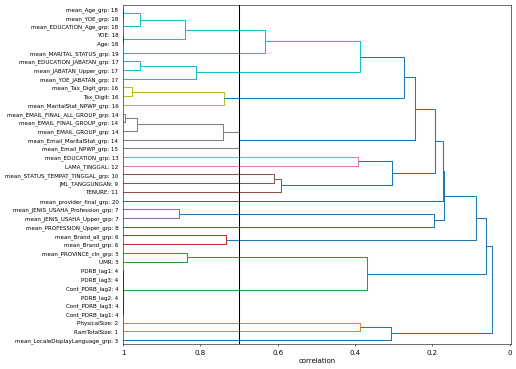

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

max_cluster_correlation = 0.7


if len(Train[cols_pred]) > 50000:
    data_for_clustering = Train[cols_pred].sample(50000)
else:
    data_for_clustering = Train[cols_pred]

 
    
Z = linkage(data_for_clustering.fillna(0).transpose(), method='average', metric='correlation')
clusters = fcluster(Z, 1-max_cluster_correlation, criterion='distance')

a4_dims = (10, int(len(clusters)/4))
fig, ax = plt.subplots(figsize=a4_dims, dpi=50)
dendrogram(Z, labels=[a+': '+str(b) for a,b in zip(cols_pred,list(clusters))], orientation='right')
plt.axvline(x=1-max_cluster_correlation, c='k')
plt.xlabel('correlation')
plt.xticks([0,0.2,0.4,0.6,0.8,1],[1,0.8,0.6,0.4,0.2,0])
#plt.savefig(output_folder+'/analysis/clustering_dendrogram.png', bbox_inches='tight', dpi = 72)
#plt.savefig(output_folder+'/analysis/clustering_dendrogram_full.png', bbox_inches='tight', dpi = 300)
plt.show()

In [94]:
Train[cols_pred].corr().to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\cormat.csv')

In [95]:
clustered_variables = pd.DataFrame({'Name':cols_pred,'Cluster':list(clusters)},index=cols_pred)
clustered_variables = pd.merge(clustered_variables,cor_tbl, left_index=True , right_index =True, indicator=False)


clustered_variables = clustered_variables.sort_values(['Cluster','abs_corr_train'],ascending=[True,False])
clustered_variables['Order in cluster'] = clustered_variables.sort_values('abs_corr_train', ascending=False).groupby('Cluster')\
             .cumcount() + 1
#clustered_variables['Delta'] = abs(clustered_variables['KPICorrelation_train']-clustered_variables['KPICorrelation_test'])
pd.options.display.max_rows = 1000
display(clustered_variables)
pd.options.display.max_rows = 15
clustered_variables.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\predictor_clusters.csv')

vars_selected = list(clustered_variables[clustered_variables['Order in cluster']==1].index)

#vars_selected = list(clustered_variables[(clustered_variables['Delta']<=0.09)].index)
#print('Restricted set of  variables:',vars_selected)

,Name,Cluster,corr_train,corr_test,abs_corr_train,abs_corr_test,Order in cluster
RamTotalSize,RamTotalSize,1,0.260475,0.260254,0.260475,0.260254,1
PhysicalSize,PhysicalSize,2,0.035506,0.049585,0.035506,0.049585,1
mean_LocaleDisplayLanguage_grp,mean_LocaleDisplayLanguage_grp,3,0.161340,0.158363,0.161340,0.158363,1
PDRB_lag3,PDRB_lag3,4,0.148483,0.050899,0.148483,0.050899,1
Cont_PDRB_lag3,Cont_PDRB_lag3,4,0.148186,0.050526,0.148186,0.050526,2
Cont_PDRB_lag2,Cont_PDRB_lag2,4,0.147789,0.051591,0.147789,0.051591,3
PDRB_lag2,PDRB_lag2,4,0.147728,0.051470,0.147728,0.051470,4
PDRB_lag1,PDRB_lag1,4,0.146556,0.047869,0.146556,0.047869,5
Cont_PDRB_lag1,Cont_PDRB_lag1,4,0.146189,0.047432,0.146189,0.047432,6
mean_PROVINCE_cln_grp,mean_PROVINCE_cln_grp,5,0.276359,0.332263,0.276359,0.332263,1


In [ ]:
#clustered_variables.to_csv('cluster_test.csv')

In [96]:
Train[mean_var].to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\grp_car_null.csv')

In [ ]:
#Train[mean_var]

In [97]:
vars_selected

['RamTotalSize',
 'PhysicalSize',
 'mean_LocaleDisplayLanguage_grp',
 'PDRB_lag3',
 'mean_PROVINCE_cln_grp',
 'mean_Brand_all_grp',
 'mean_JENIS_USAHA_Upper_grp',
 'mean_PROFESSION_Upper_grp',
 'JML_TANGGUNGAN',
 'mean_STATUS_TEMPAT_TINGGAL_grp',
 'TENURE',
 'LAMA_TINGGAL',
 'mean_EDUCATION_grp',
 'mean_Email_MaritalStat_grp',
 'mean_Email_NPWP_grp',
 'mean_MaritalStat_NPWP_grp',
 'mean_YOE_JABATAN_grp',
 'mean_EDUCATION_Age_grp',
 'mean_MARITAL_STATUS_grp',
 'mean_provider_final_grp']

In [98]:
#vars_selected = list(set(vars_selected)-set(['LAMA_TINGGAL','mean_PROVINCE_cln_grp']))+list(['UMR'])
vars_selected = list(set(vars_selected)-set(['mean_PROVINCE_cln_grp','mean_STATUS_TEMPAT_TINGGAL_grp','TENURE','norm_TENURE','mean_Brand_grp','PDRB_lag3','mean_MaritalStat_NPWP_grp','LAMA_TINGGAL','mean_Email_NPWP_grp']))+list(['UMR'])
##Negative coefficient
vars_selected = list(set(vars_selected)-set(['LAMA_TINGGAL','mean_PROFESSION_Upper_grp','JML_TANGGUNGAN','norm_JML_TANGGUNGAN','PhysicalSize','norm_PhysicalSize',''])) #
##collinearity w Age
vars_selected = list(set(vars_selected)-set(['mean_MARITAL_STATUS_grp','mean_YOE_grp','mean_EMAIL_FINAL_GROUP_grp']))+list(['Age','mean_EMAIL_FINAL_ALL_GROUP_grp'])
vars_selected = list(set(vars_selected)-set(['mean_Email_NPWP_grp'])) #already use npwp 
## neg impact to marg cont
vars_selected = list(set(vars_selected)-set(['mean_Email_MaritalStat_grp']))





#vars_selected = list(['age','mean_educationstatus_grp','mean_maritalstatus_grp']) 
vars_selected = list(set(vars_selected)-set(['Age','UMR','RamTotalSize']))+list(['norm_Age','norm_UMR','norm_RamTotalSize'])
vars_selected = list(set(vars_selected)-set(['norm_Age','norm_UMR','norm_RamTotalSize']))+list(['Age','UMR','RamTotalSize'])
vars_selected = list(set(vars_selected)-set(['mean_EDUCATION_grp'])) #already use mean_EDUCATION_Age_grp 
#vars_selected = list(set(vars_selected)-set(['mean_EMAIL_FINAL_ALL_GROUP_grp'])) #already use mean_Email_MaritalStat_grp 
vars_selected = list(set(vars_selected)-set(['mean_EDUCATION_Age_grp']))+list(['mean_EDUCATION_grp'])


vars_selected 

['UMR',
 'mean_EMAIL_FINAL_ALL_GROUP_grp',
 'mean_Brand_all_grp',
 'RamTotalSize',
 'mean_JENIS_USAHA_Upper_grp',
 'mean_provider_final_grp',
 'Age',
 'mean_YOE_JABATAN_grp',
 'mean_LocaleDisplayLanguage_grp',
 'mean_EDUCATION_grp']

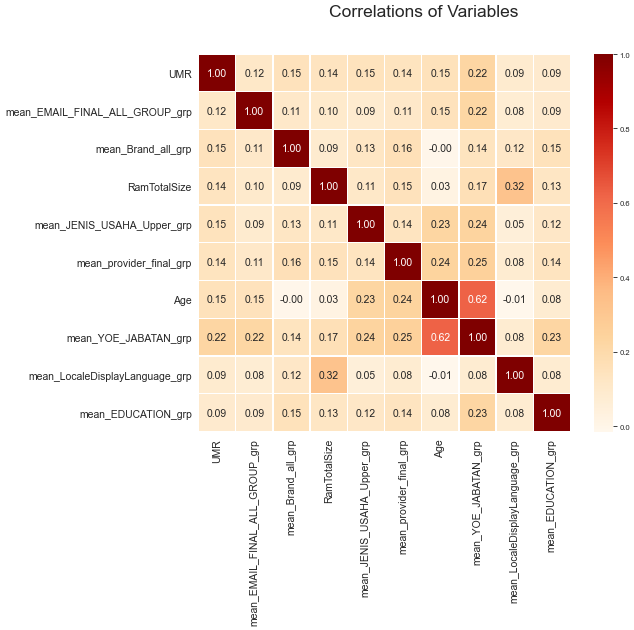

In [99]:
import matplotlib
cormat = Train[vars_selected].fillna(0).corr()

matplotlib.rcParams.update({'font.size': 15})
sns.set()
%matplotlib inline
%config InlineBackend.close_figures=True
a4_dims = (12,10)

fig, ax = plt.subplots(figsize=a4_dims, dpi=50)
fig.suptitle('Correlations of Variables',fontsize=25)
sns.heatmap(cormat, ax=ax, annot=True, fmt="0.2f", linewidths=.5, annot_kws={"size":15},cmap="OrRd")
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

#plt.savefig(output_folder+'/analysis/correlation_full.png', bbox_inches='tight', dpi = 72)
plt.show()

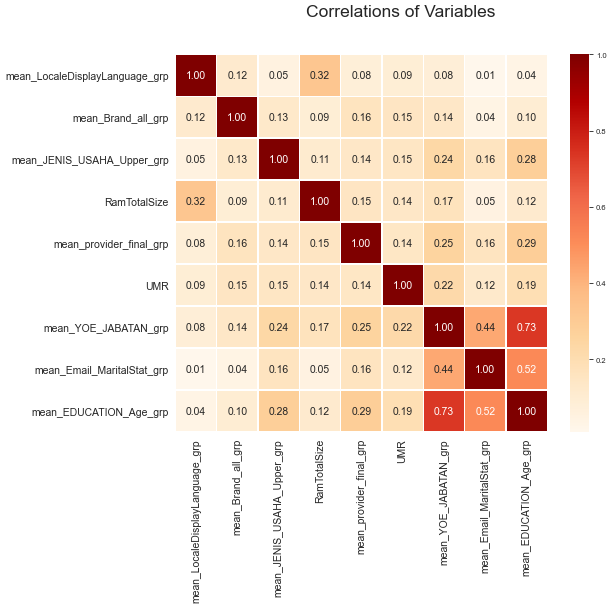

In [110]:
import matplotlib
cormat = Train[vars_selected].fillna(0).corr()

matplotlib.rcParams.update({'font.size': 15})
sns.set()
%matplotlib inline
%config InlineBackend.close_figures=True
a4_dims = (12,10)

fig, ax = plt.subplots(figsize=a4_dims, dpi=50)
fig.suptitle('Correlations of Variables',fontsize=25)
sns.heatmap(cormat, ax=ax, annot=True, fmt="0.2f", linewidths=.5, annot_kws={"size":15},cmap="OrRd")
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

#plt.savefig(output_folder+'/analysis/correlation_full.png', bbox_inches='tight', dpi = 72)
plt.show()

In [ ]:
#list(set(['a','b','c']) - set(['a']))

In [ ]:
#a = list(['a','b','c'])
#for i in a :
#    print(list(set(a)-set([i])))


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


LR = LinearRegression()
#LR = DecisionTreeRegressor(max_depth=5)
LR.fit(Train[vars_selected], Train['Avg_SalaryL3M'])
LR_pred_ts=LR.predict(Test[vars_selected])
LR_pred_tr=LR.predict(Train[vars_selected])

In [101]:
from sklearn import metrics
#from sklearn.metrics import mean_absolute_percentage_error

#def mape(actual, pred): 
#    actual, pred = np.array(actual), np.array(pred)
#    return np.mean(np.abs((actual - pred) / actual))



print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_pred_ts))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_pred_ts)))
#print('MAPE     : ',mape(Test['Avg_SalaryL3M'], LR_pred_ts))

print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], LR_pred_ts))
print('\n')


print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], LR_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_pred_tr))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_pred_tr)))
#print('MAPE     : ',mape(Train['Avg_SalaryL3M'], LR_pred_tr))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], LR_pred_tr))

Test
MAE      :  2374455.160372708
RMSE     :  3732471.719605891
R2 Score :  0.3610105623042492


Train
MAE      :  2467481.398435059
RMSE     :  3595305.7877954417
R2 Score :  0.36916178465432303


In [102]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_pred_ts))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_pred_ts)))
#print('MAPE     : ',mape(Test['Avg_SalaryL3M'], LR_pred_ts))

print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], LR_pred_ts))
print('\n')


print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], LR_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_pred_tr))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_pred_tr)))
#print('MAPE     : ',mape(Train['Avg_SalaryL3M'], LR_pred_tr))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], LR_pred_tr))

Test
MAE      :  2374455.160372708
R2 Score :  0.3610105623042492


Train
MAE      :  2467481.398435059
R2 Score :  0.36916178465432303


In [103]:
def regression_roc_auc_score(y_true, y_pred, num_rounds = 10000):
    """
    Computes Regression-ROC-AUC-score.

    Parameters:
    ----------
    y_true: array-like of shape (n_samples,). Binary or continuous target variable.
    y_pred: array-like of shape (n_samples,). Target scores.
    num_rounds: int or string. If integer, number of random pairs of observations. 
                If string, 'exact', all possible pairs of observations will be evaluated.

    Returns:
    -------
    rroc: float. Regression-ROC-AUC-score.
    """

    import numpy as np

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)


    num_pairs = 0
    num_same_sign = 0

    for i, j in _yield_pairs(y_true, num_rounds):
      diff_true = y_true[i] - y_true[j]
      diff_score = y_pred[i] - y_pred[j]
      if diff_true * diff_score > 0:
        num_same_sign += 1
      elif diff_score == 0:
        num_same_sign += .5
      num_pairs += 1

    return num_same_sign / num_pairs

def _yield_pairs(y_true, num_rounds):
    """
    Returns pairs of valid indices. Indices must belong to observations having different values.

    Parameters:
    ----------
    y_true: array-like of shape (n_samples,). Binary or continuous target variable.
    num_rounds: int or string. If integer, number of random pairs of observations to return. 
                If string, 'exact', all possible pairs of observations will be returned.

    Yields:
    -------
    i, j: tuple of int of shape (2,). Indices referred to a pair of samples.

    """
    import numpy as np

    if num_rounds == 'exact':
      for i in range(len(y_true)):
        for j in np.where((y_true != y_true[i]) & (np.arange(len(y_true)) > i))[0]:
          yield i, j     
    else:
      for r in range(num_rounds):
        i = np.random.choice(range(len(y_true)))
        j = np.random.choice(np.where(y_true != y_true[i])[0])
        yield i, j
    
    


In [104]:
print(regression_roc_auc_score(Train['Avg_SalaryL3M'], LR_pred_tr))
print(2*regression_roc_auc_score(Train['Avg_SalaryL3M'], LR_pred_tr)-1)

0.7265
0.46419999999999995


In [105]:
print(regression_roc_auc_score(Test['Avg_SalaryL3M'], LR_pred_ts))
print(2*regression_roc_auc_score(Test['Avg_SalaryL3M'], LR_pred_ts)-1)

0.74205
0.4818


In [ ]:
Test
MAE      :  2400159.9080775557
RMSE     :  3728814.683523916
R2 Score :  0.36226209898856276


Train
MAE      :  2480852.0103736897
RMSE     :  3604610.581509329
R2 Score :  0.36589229078086605

In [106]:
Train['OLS'] = LR.predict(Train[vars_selected])
Test['OLS'] = LR.predict(Test[vars_selected])

In [107]:
Test[['OLS','Avg_SalaryL3M']].corr()

,OLS,Avg_SalaryL3M
OLS,1.000000,0.613352
Avg_SalaryL3M,0.613352,1.000000


In [194]:
Train[['OLS','Avg_SalaryL3M']].corr()

,OLS,Avg_SalaryL3M
OLS,1.00000,0.60759
Avg_SalaryL3M,0.60759,1.00000


In [108]:
Train['error'] = Train['OLS'] - Train['Avg_SalaryL3M']
Test['error'] = Test['OLS'] - Test['Avg_SalaryL3M']

Train['abs_error'] = abs(Train['error']) 
Test['abs_error'] = abs(Test['error'])

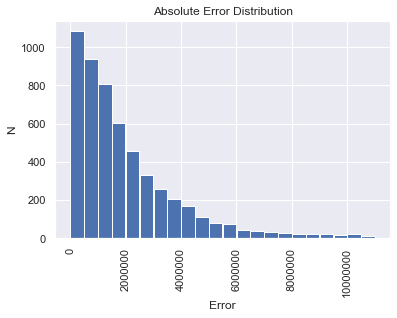

In [109]:
plt.hist(Test['abs_error'], bins=[0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000,5500000,6000000,6500000,7000000,7500000,8000000,8500000,9000000,9500000,10000000,10500000,11000000], rwidth=0.975)
         #bins=[0, 1000000, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 450000000], rwidth=0.975)
plt.ticklabel_format(style='plain')
plt.title('Absolute Error Distribution')
plt.xticks(rotation=90)
plt.ylabel('N')
plt.xlabel('Error')

plt.show()

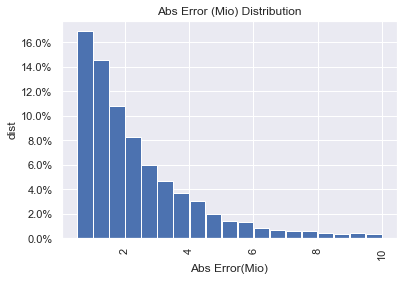

In [110]:
plt.hist(Test['abs_error']/1000000, 
          weights=np.ones(len(Test)) / len(Test),
         bins=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10], rwidth=0.965)
plt.ticklabel_format(style='plain')
plt.title('Abs Error (Mio) Distribution')
plt.ylabel('dist')
plt.xlabel('Abs Error(Mio)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

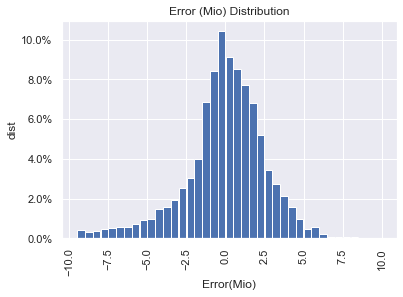

In [111]:
plt.hist(Test['error']/1000000, 
          weights=np.ones(len(Test)) / len(Test),
         bins=[-9.5,-9,-8.5,-8,-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10], rwidth=0.97)
plt.ticklabel_format(style='plain')
plt.title('Error (Mio) Distribution')
plt.ylabel('dist')
plt.xlabel('Error(Mio)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
#cor_result['abs_error_mio'] = cor_result['abs_error']/1000000
#cor_result.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio\Result_raw.csv')

In [112]:
Train['abs_error_mio']= Train['abs_error']/1000000
Test['abs_error_mio'] = Test['abs_error']/1000000

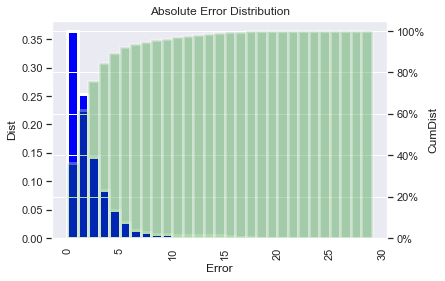

In [113]:
ax3 = Test['abs_error_mio'].plot(kind = 'hist', use_index=True, weights=np.ones(len(Test)) / len(Test),
              #y = 'mean', 
                                   bins = range(30),
                                      
                                       color = 'Blue',rot=90,
              linewidth = 3, label = 'absolute error')

ax4 = Test['abs_error_mio'].plot(kind = 'hist', use_index=True, weights=np.ones(len(Test)) / len(Test),
                                       
               #y = 'dist',
                                       bins = range(30),
                                       cumulative=1,
                                       secondary_y = True,
               color = 'Green', rot=90,  linewidth = 3, alpha = 0.3)
               #ax3 = ax3)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=90)
#title of the plot
plt.title("Absolute Error Distribution")



#labeling x and y-axis
ax3.set_xlabel('Error', color = 'k')
ax3.set_ylabel('Dist', color = "k")
ax4.set_ylabel('CumDist', color = 'k')


plt.show()

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [12, 100, 300],
    'n_estimators': [100, 200, 300]}


RF = RandomForestRegressor()
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)    
grid_search.fit(Train[vars_selected], Train['Avg_SalaryL3M'])

best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, Test[vars_selected], Test['Avg_SalaryL3M'])    

print(grid_search.best_params_)
print(best_grid)
    
    


Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.5min finished


{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}
RandomForestRegressor(max_depth=10, max_features=3, min_samples_leaf=5,
                      min_samples_split=12)


In [115]:
RF = RandomForestRegressor(bootstrap= True, max_depth= 10, max_features= 3, min_samples_leaf= 5, min_samples_split= 12, n_estimators= 100)
RF.fit(Train[vars_selected], Train['Avg_SalaryL3M'])
RF_pred_ts=RF.predict(Test[vars_selected])
RF_pred_tr=RF.predict(Train[vars_selected])

In [116]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], RF_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], RF_pred_ts))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], RF_pred_ts)))
print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], RF_pred_ts))

print('\n')


print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], RF_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], RF_pred_tr))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], RF_pred_tr)))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], RF_pred_tr))

Test
MAE      :  2327563.693887006
RMSE     :  3634937.7164760106
R2 Score :  0.39396936930678006


Train
MAE      :  2177328.744159681
RMSE     :  3236096.9930602466
R2 Score :  0.48891941116118875


In [117]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], RF_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], RF_pred_ts))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], RF_pred_ts)))
print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], RF_pred_ts))

print('\n')


print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], RF_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], RF_pred_tr))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], RF_pred_tr)))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], RF_pred_tr))

Test
MAE      :  2327563.693887006
R2 Score :  0.39396936930678006


Train
MAE      :  2177328.744159681
R2 Score :  0.48891941116118875


In [118]:
print(regression_roc_auc_score(Test['Avg_SalaryL3M'], RF_pred_ts))
print(2*regression_roc_auc_score(Test['Avg_SalaryL3M'], RF_pred_ts)-1)

0.73945
0.4930000000000001


In [119]:
print(regression_roc_auc_score(Train['Avg_SalaryL3M'], RF_pred_tr))
print(2*regression_roc_auc_score(Train['Avg_SalaryL3M'], RF_pred_tr)-1)

0.7677
0.5242


In [120]:
Train['RF'] = RF.predict(Train[vars_selected])
Test['RF'] = RF.predict(Test[vars_selected])

In [ ]:
from xgboost import XGBRegressor

In [121]:
Test[['Avg_SalaryL3M','OLS']].corr().loc['OLS'][0]

0.6133516386533627

In [122]:
Train[['Avg_SalaryL3M','OLS']].corr().loc['OLS'][0]

0.6075868535891135

In [123]:
Test[['Avg_SalaryL3M','RF']].corr().loc['RF'][0]

0.6331541691947158

In [124]:
Train[['Avg_SalaryL3M','RF']].corr().loc['RF'][0]

0.707194175479568

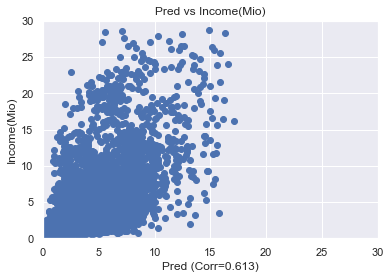

In [125]:
plt.scatter(Test['OLS']/1000000, Test['Avg_SalaryL3M']/1000000)
plt.title("Pred" +" vs Income(Mio)")
plt.ticklabel_format(style='plain')
plt.xlabel("Pred (Corr=" +str(round(Test[['Avg_SalaryL3M','OLS']].corr().loc['OLS'][0],3))+")")
plt.ylabel("Income(Mio)")
plt.xlim(0,30)
plt.ylim(0,30)

plt.show()

In [126]:
Test[['Avg_SalaryL3M','RF']].corr().loc['RF'][0]

0.6331541691947158

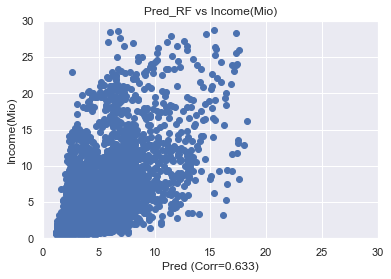

In [127]:
plt.scatter(Test['RF']/1000000, Test['Avg_SalaryL3M']/1000000)
plt.title("Pred_RF" +" vs Income(Mio)")
plt.ticklabel_format(style='plain')
plt.xlabel("Pred (Corr=" +str(round(Test[['Avg_SalaryL3M','RF']].corr().loc['RF'][0],3))+")")
plt.ylabel("Income(Mio)")
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [ ]:
#cor_result = pd.DataFrame()
#cor_result['Income'] =  Test['Avg_SalaryL3M']
#cor_result['Income_pred'] = LR_pred_ts
#cor_result['Income_pred_RF'] = RF_pred_ts
#cor_result['Income_pred2'] = LR2_pred_ts
#cor_result.corr()

In [ ]:
#cor_result.corr().loc['Income_pred_RF'][0]

In [ ]:
#TrvT = pd.DataFrame()
#TrvT['Income'] = Train['Avg_SalaryL3M']
#TrvT['Pred'] =  LR_pred_tr

In [128]:
# Marginal Contribution
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

LR_test = LinearRegression()

marg_cont = dict()
a = vars_selected
for i in a :
    b= list(set(a)- set([i]))
    
    LR_test.fit(Train[b], Train['Avg_SalaryL3M'])
    LR_test_pred_ts=LR_test.predict(Test[b])
    
    LR.fit(Train[a], Train['Avg_SalaryL3M'])
    LR_pred_ts=LR.predict(Test[a])
    
    #print(i,'R2 Score : ',metrics.r2_score(Test['max_income_proxy'], LR_test_pred_ts))
    marg_cont[i] = [metrics.r2_score(Test['Avg_SalaryL3M'], LR_test_pred_ts)
                    ,metrics.r2_score(Test['Avg_SalaryL3M'], LR_pred_ts)
                    , metrics.r2_score(Test['Avg_SalaryL3M'], LR_test_pred_ts) - metrics.r2_score(Test['Avg_SalaryL3M'], LR_pred_ts)
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_test_pred_ts) - metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_pred_ts) 
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_test_pred_ts)
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_pred_ts)]
    
    #print(i,b)
#marg_cont
marg_cont = pd.DataFrame.from_dict(marg_cont,orient ='index') 
marg_cont.columns = ['R2_drop','R2_full','marg_cont_R2(-)','marg_cont_MAE(+)','MAE_drop','MAE_full']
pd.options.display.max_rows = None
#marg_cont.sort_values(['marginal_contribution'], ascending=['False'])

marg_cont2 = marg_cont
marg_cont2.index = marg_cont2.index.str.replace('mean_','')
marg_cont2.sort_values(['marg_cont_R2(-)'], ascending=['False']).to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\marginal_contribution.csv')
marg_cont2.sort_values(['marg_cont_R2(-)'], ascending=['False'])

,R2_drop,R2_full,marg_cont_R2(-),marg_cont_MAE(+),MAE_drop,MAE_full
YOE_JABATAN_grp,0.309592,0.361011,-0.051418,38475.423427,2.412931e+06,2.374455e+06
Brand_all_grp,0.337099,0.361011,-0.023911,79302.064907,2.453757e+06,2.374455e+06
RamTotalSize,0.340673,0.361011,-0.020338,31092.579443,2.405548e+06,2.374455e+06
JENIS_USAHA_Upper_grp,0.345297,0.361011,-0.015714,51191.053786,2.425646e+06,2.374455e+06
EMAIL_FINAL_ALL_GROUP_grp,0.358086,0.361011,-0.002924,11424.227963,2.385879e+06,2.374455e+06
UMR,0.359508,0.361011,-0.001503,16158.350506,2.390614e+06,2.374455e+06
Age,0.360651,0.361011,-0.000360,1644.669988,2.376100e+06,2.374455e+06
LocaleDisplayLanguage_grp,0.361285,0.361011,0.000274,9400.945321,2.383856e+06,2.374455e+06
EDUCATION_grp,0.361411,0.361011,0.000400,1139.111911,2.375594e+06,2.374455e+06
provider_final_grp,0.361728,0.361011,0.000717,6376.069288,2.380831e+06,2.374455e+06


In [129]:
# Marginal Contribution
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

LR_test = LinearRegression()

marg_cont = dict()
a = vars_selected
for i in a :
    b= list(set(a)- set([i]))
    
    LR_test.fit(Train[b], Train['Avg_SalaryL3M'])
    LR_test_pred_ts=LR_test.predict(Test[b])
    
    LR.fit(Train[a], Train['Avg_SalaryL3M'])
    LR_pred_ts=LR.predict(Test[a])
    
    #print(i,'R2 Score : ',metrics.r2_score(Test['max_income_proxy'], LR_test_pred_ts))
    marg_cont[i] = [metrics.r2_score(Test['Avg_SalaryL3M'], LR_test_pred_ts)
                    ,metrics.r2_score(Test['Avg_SalaryL3M'], LR_pred_ts)
                    , metrics.r2_score(Test['Avg_SalaryL3M'], LR_test_pred_ts) - metrics.r2_score(Test['Avg_SalaryL3M'], LR_pred_ts)
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_test_pred_ts) - metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_pred_ts) 
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_test_pred_ts)
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_pred_ts)]
    
    #print(i,b)
#marg_cont
marg_cont = pd.DataFrame.from_dict(marg_cont,orient ='index') 
marg_cont.columns = ['R2_drop','R2_full','marg_cont_R2(-)','marg_cont_MAE(+)','MAE_drop','MAE_full']
pd.options.display.max_rows = None
#marg_cont.sort_values(['marginal_contribution'], ascending=['False'])

marg_cont2 = marg_cont
marg_cont2.index = marg_cont2.index.str.replace('mean_','')
#marg_cont2.sort_values(['marg_cont_R2(-)'], ascending=['False']).to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio\marginal_contribution_.csv')
marg_cont2.sort_values(['marg_cont_R2(-)'], ascending=['False'])

,R2_drop,R2_full,marg_cont_R2(-),marg_cont_MAE(+),MAE_drop,MAE_full
YOE_JABATAN_grp,0.309592,0.361011,-0.051418,38475.423427,2.412931e+06,2.374455e+06
Brand_all_grp,0.337099,0.361011,-0.023911,79302.064907,2.453757e+06,2.374455e+06
RamTotalSize,0.340673,0.361011,-0.020338,31092.579443,2.405548e+06,2.374455e+06
JENIS_USAHA_Upper_grp,0.345297,0.361011,-0.015714,51191.053786,2.425646e+06,2.374455e+06
EMAIL_FINAL_ALL_GROUP_grp,0.358086,0.361011,-0.002924,11424.227963,2.385879e+06,2.374455e+06
UMR,0.359508,0.361011,-0.001503,16158.350506,2.390614e+06,2.374455e+06
Age,0.360651,0.361011,-0.000360,1644.669988,2.376100e+06,2.374455e+06
LocaleDisplayLanguage_grp,0.361285,0.361011,0.000274,9400.945321,2.383856e+06,2.374455e+06
EDUCATION_grp,0.361411,0.361011,0.000400,1139.111911,2.375594e+06,2.374455e+06
provider_final_grp,0.361728,0.361011,0.000717,6376.069288,2.380831e+06,2.374455e+06


In [130]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
Train[['Avg_SalaryL3M']].describe()

,Avg_SalaryL3M
count,16653.000
mean,5056156.459
std,4526785.088
min,500000.000
25%,1711333.333
50%,4100000.000
75%,6485333.333
max,30000000.000


In [131]:
LR_pred_ts_cat = pd.cut(LR_pred_ts, bins=[-9999999, 1711333.333, 4100000.000, 6485333.333,30000000], include_lowest=True, labels=['Low', 'Medium', 'High', 'VeryHigh'])
LR_pred_tr_cat = pd.cut(LR_pred_tr, bins=[-9999999, 1711333.333, 4100000.000, 6485333.333,30000000], include_lowest=True, labels=['Low', 'Medium', 'High', 'VeryHigh'])
y_train_cat = pd.cut(Train['Avg_SalaryL3M'], bins=[-9999999, 1711333.333, 4100000.000, 6485333.333,30000000], include_lowest=True, labels=['Low', 'Medium', 'High', 'VeryHigh'])
y_test_cat = pd.cut(Test['Avg_SalaryL3M'], bins=[-9999999, 1711333.333, 4100000.000, 6485333.333,30000000], include_lowest=True, labels=['Low', 'Medium', 'High', 'VeryHigh'])

In [132]:
Cat_Model_test = pd.DataFrame()
Cat_Model_test['Income'] = Test['Avg_SalaryL3M']
Cat_Model_test['Income_pred'] = LR_pred_ts
Cat_Model_test['Income_cat'] = y_test_cat
Cat_Model_test['Income_pred_cat'] = LR_pred_ts_cat
#Normalize
Cat_Model_test['Income_pred_nomin'] = Cat_Model_test['Income_pred']
Cat_Model_test['Income_pred_nomin'] = Cat_Model_test['Income_pred_nomin'].mask(Cat_Model_test['Income_pred_nomin'] < 0, 0)
#Cat_Model_test[Cat_Model_test['Income_pred'] < 0]['Income_pred_nomin'] = 0
#Cat_Model_test[Cat_Model_test['Income_pred_cat'].isnull()]

In [133]:
print(Cat_Model_test[Cat_Model_test['Income_pred_nomin'] < 0].shape[0])
print(Cat_Model_test[Cat_Model_test['Income_pred'] < 0].shape[0])

0
76


In [134]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Cat_Model_test['Income_cat'], Cat_Model_test['Income_pred_cat']))
print('accuracy_score : '+ str(accuracy_score(Cat_Model_test['Income_cat'], Cat_Model_test['Income_pred_cat'])))
print('accuray_uplift : '+ str(accuracy_score(Cat_Model_test['Income_cat'], Cat_Model_test['Income_pred_cat'])/0.25-1))

              precision    recall  f1-score   support

        High       0.31      0.43      0.36      1037
         Low       0.74      0.47      0.57      1816
      Medium       0.29      0.40      0.33      1331
    VeryHigh       0.64      0.53      0.58      1367

    accuracy                           0.46      5551
   macro avg       0.49      0.45      0.46      5551
weighted avg       0.53      0.46      0.48      5551

accuracy_score : 0.45685462078904704
accuray_uplift : 0.8274184831561882


In [135]:
def naive_accuracy(true, pred):
    number_correct = 0
    i = 0
    for i, y in enumerate(true):
        if pred[i] == y:
            number_correct += 1.0
    return number_correct / len(true)

naive_accuracy(list(Cat_Model_test['Income_cat']), list(Cat_Model_test['Income_pred_cat']))

0.45685462078904704

In [ ]:
#print('MAE      : ',metrics.mean_absolute_error(Cat_Model_test['Income'], Cat_Model_test['Income_pred_nomin']))

In [136]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


#LR = LinearRegression()
#LR = DecisionTreeRegressor(max_depth=5)
#LR.fit(Train[vars_selected], Train['max_income_proxy'])
#LR_pred_ts=LR.predict(Test[vars_selected])
#LR_pred_tr=LR.predict(Train[vars_selected])

In [ ]:
#from sklearn import metrics
#
#
#print('Test')
#print('MAE      : ',metrics.mean_absolute_error(Test['max_income_proxy'], LR_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['max_income_proxy'], LR_pred_ts))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['max_income_proxy'], LR_pred_ts)))
#print('R2 Score : ',metrics.r2_score(Test['max_income_proxy'], LR_pred_ts))
#
#print('Train')
#print('MAE      : ',metrics.mean_absolute_error(Train['max_income_proxy'], LR_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['max_income_proxy'], LR_pred_tr))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['max_income_proxy'], LR_pred_tr)))
#print('R2 Score : ',metrics.r2_score(Train['max_income_proxy'], LR_pred_tr))

In [ ]:
#attributes_cat_train_grp

In [137]:
a = list([LR.intercept_])
for i in LR.coef_:
    a.append(i)
    
b = list(['constant'])
for i in vars_selected:
    b.append(i)

    
grp_attributes_cat_train_copy = attributes_cat_train_grp




coefficients = pd.concat([pd.DataFrame(b),pd.DataFrame(np.transpose(a))], axis=1)

coefficients.columns = ['attributes','coefficients']
coefficients['attributes'] = coefficients['attributes'].str.replace('mean_','')
coefficients = pd.merge(coefficients,grp_attributes_cat_train_copy[['attribute','bin','mean']], how='left', left_on='attributes' , right_on ='attribute', indicator=False)
coefficients = coefficients[['attributes','bin', 'mean','coefficients']]
coefficients.columns = ['attributes','bin', 'value','coefficients']


pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_rows = len(coefficients)
coefficients.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\model_summary.csv')
coefficients         

,attributes,bin,value,coefficients
0,constant,NaN,nan,-11615136.53811
1,UMR,NaN,nan,0.25535
2,EMAIL_FINAL_ALL_GROUP_grp,'gmail',4765848.51670,0.38324
3,EMAIL_FINAL_ALL_GROUP_grp,'yahoo',8886196.48069,0.38324
4,EMAIL_FINAL_ALL_GROUP_grp,Others,9434082.63380,0.38324
5,Brand_all_grp,'Apple',7202095.88925,0.59305
6,Brand_all_grp,"'OPPO','vivo','xiaomi'",4282432.59342,0.59305
7,Brand_all_grp,'Redmi',4763320.06506,0.59305
8,Brand_all_grp,'realme',3850068.87394,0.59305
9,Brand_all_grp,'samsung',6541863.39597,0.59305


In [236]:
a = list([LR.intercept_])
for i in LR.coef_:
    a.append(i)
    
b = list(['constant'])
for i in vars_selected:
    b.append(i)

    
grp_attributes_cat_train_copy = attributes_cat_train_grp




coefficients = pd.concat([pd.DataFrame(b),pd.DataFrame(np.transpose(a))], axis=1)

coefficients.columns = ['attributes','coefficients']
coefficients['attributes'] = coefficients['attributes'].str.replace('mean_','')
coefficients = pd.merge(coefficients,grp_attributes_cat_train_copy[['attribute','bin','mean']], how='left', left_on='attributes' , right_on ='attribute', indicator=False)
coefficients = coefficients[['attributes','bin', 'mean','coefficients']]
coefficients.columns = ['attributes','bin', 'value','coefficients']


pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_rows = len(coefficients)
coefficients.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup\model_summary.csv')
coefficients                                       

,attributes,bin,value,coefficients
0,constant,NaN,nan,-11411485.20930
1,LocaleDisplayLanguage_grp,'English',8490867.25291,0.30459
2,LocaleDisplayLanguage_grp,'Indonesia',3903662.76209,0.30459
3,LocaleDisplayLanguage_grp,Others,5300907.19880,0.30459
4,Brand_all_grp,'Apple',7202095.88925,0.59058
5,Brand_all_grp,"'OPPO','vivo','xiaomi'",4282432.59342,0.59058
6,Brand_all_grp,'Redmi',4763320.06506,0.59058
7,Brand_all_grp,'realme',3850068.87394,0.59058
8,Brand_all_grp,'samsung',6541863.39597,0.59058
9,Brand_all_grp,Empty,3661371.72236,0.59058


In [138]:
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(Train[vars_selected], Train['Avg_SalaryL3M'])
DT_pred_ts=DT.predict(Test[vars_selected])
DT_pred_tr=DT.predict(Train[vars_selected])

In [139]:

print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], DT_pred_ts))
print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], DT_pred_ts))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], DT_pred_ts)))
print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], DT_pred_ts))

print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], DT_pred_tr))
print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], DT_pred_tr))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], DT_pred_tr)))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], DT_pred_tr))

Test
MAE      :  2492082.4272271334
MSE      :  14674964773484.219
RMSE     :  3830791.6640668698
R2 Score :  0.32690293750125354
Train
MAE      :  2462389.442730847
MSE      :  13077046122628.916
RMSE     :  3616219.866466766
R2 Score :  0.36180120161135376


In [140]:
Reg_tr = pd.DataFrame()
Reg_tr['Avg_SalaryL3M'] = Train['Avg_SalaryL3M']
Reg_tr['LR'] = LR_pred_tr
Reg_tr['DT'] = DT_pred_tr
Reg_tr['Vote_LR_DT'] = (Reg_tr['LR'] + (1*Reg_tr['DT']))/2

Reg = pd.DataFrame()
Reg['Avg_SalaryL3M'] = Test['Avg_SalaryL3M']
Reg['LR'] = LR_pred_ts
Reg['DT'] = DT_pred_ts
Reg['Vote_LR_DT'] = (Reg['LR'] + (1*Reg['DT']))/2



Stack = LinearRegression()
#LR = DecisionTreeRegressor(max_depth=5)
Stack.fit(Reg_tr[['LR','DT']], Reg_tr['Avg_SalaryL3M'])
Stack_pred_ts=Stack.predict(Reg[['LR','DT']])
Stack_pred_tr=Stack.predict(Reg_tr[['LR','DT']])


Reg['St_LR_DT'] = Stack_pred_ts
Reg_tr['St_LR_DT'] = Stack_pred_tr

In [141]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Reg['Avg_SalaryL3M'], Stack_pred_ts))
print('MSE      : ',metrics.mean_squared_error(Reg['Avg_SalaryL3M'], Stack_pred_ts))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Reg['Avg_SalaryL3M'], Stack_pred_ts)))
print('R2 Score : ',metrics.r2_score(Reg['Avg_SalaryL3M'], Stack_pred_ts))

print('Train')
print('MAE      : ',metrics.mean_absolute_error(Reg_tr['Avg_SalaryL3M'], Stack_pred_tr))
print('MSE      : ',metrics.mean_squared_error(Reg_tr['Avg_SalaryL3M'], Stack_pred_tr))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Reg_tr['Avg_SalaryL3M'], Stack_pred_tr)))
print('R2 Score : ',metrics.r2_score(Reg_tr['Avg_SalaryL3M'], Stack_pred_tr))

Test
MAE      :  2370723.4363006195
MSE      :  13872901264172.639
RMSE     :  3724634.379932162
R2 Score :  0.36369120925441845
Train
MAE      :  2426198.587077568
MSE      :  12633423850566.914
RMSE     :  3554352.80333381
R2 Score :  0.3834512897362624


In [142]:
a = list([Stack.intercept_])
for i in Stack.coef_:
    a.append(i)
    
b = list(['constant'])
for i in Reg_tr[['LR','DT']].columns:
    b.append(i)




Stack_summary = pd.concat([pd.DataFrame(b),pd.DataFrame(np.transpose(a))], axis=1)
Stack_summary.columns = ['attributes','coefficients']
Stack_summary

,attributes,coefficients
0,constant,-243341.15295
1,LR,0.57569
2,DT,0.47244


In [ ]:
#Reg= pd.DataFrame()
#Reg['max_income_proxy'] = Test['max_income_proxy']
#Reg['LR'] = LR_pred_ts
#Reg['DT'] = DT_pred_ts
#Reg['Vote_LR_DT'] = (Reg['LR'] + (1*Reg['DT']))/2

In [143]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], Reg['Vote_LR_DT']))
print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], Reg['Vote_LR_DT']))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], Reg['Vote_LR_DT'])))
print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], Reg['Vote_LR_DT']))

print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], Reg_tr['Vote_LR_DT']))
print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], Reg_tr['Vote_LR_DT']))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], Reg_tr['Vote_LR_DT'])))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], Reg_tr['Vote_LR_DT']))

Test
MAE      :  2372262.555882862
MSE      :  13899656423815.326
RMSE     :  3728224.29902163
R2 Score :  0.3624640295207595
Train
MAE      :  2421969.9834731105
MSE      :  12654045868582.875
RMSE     :  3557252.5730657466
R2 Score :  0.38244487383815207


In [ ]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(DT, 
#                   feature_names=vars_selected,  
#                   class_names= 'max_income_proxy',
#                   filled=True)

In [ ]:
fig = plt.figure()
_ = tree.plot_tree(DT, 
                   feature_names=vars_selected,  
                   class_names= 'Avg_SalaryL3M',
                   filled=True)

In [144]:
from sklearn import tree
text_rule = tree.export_text(DT
                            ,feature_names=vars_selected  
                  )
print(text_rule)

|--- mean_YOE_JABATAN_grp <= 5759326.75
|   |--- mean_YOE_JABATAN_grp <= 4163567.38
|   |   |--- mean_JENIS_USAHA_Upper_grp <= 4016513.88
|   |   |   |--- UMR <= 2511906.50
|   |   |   |   |--- mean_JENIS_USAHA_Upper_grp <= 2698636.69
|   |   |   |   |   |--- value: [1267286.29]
|   |   |   |   |--- mean_JENIS_USAHA_Upper_grp >  2698636.69
|   |   |   |   |   |--- value: [1592669.64]
|   |   |   |--- UMR >  2511906.50
|   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |--- value: [3480250.12]
|   |   |   |   |--- Age >  23.50
|   |   |   |   |   |--- value: [1963944.44]
|   |   |--- mean_JENIS_USAHA_Upper_grp >  4016513.88
|   |   |   |--- mean_Brand_all_grp <= 5688985.75
|   |   |   |   |--- RamTotalSize <= 5472.90
|   |   |   |   |   |--- value: [2561592.59]
|   |   |   |   |--- RamTotalSize >  5472.90
|   |   |   |   |   |--- value: [3801112.11]
|   |   |   |--- mean_Brand_all_grp >  5688985.75
|   |   |   |   |--- RamTotalSize <= 2783.04
|   |   |   |   |   |--- value: [2653077.

In [ ]:
#from sklearn.tree import export_graphviz 
#
#
#dot_data = export_graphviz(DT, out_file =None
#                           ,feature_names =vars_selected
#                           , class_names ='max_income_proxy'
#                            ,filled=True) 
#

In [ ]:
#dot_data

In [ ]:
fig.savefig("decistion_tree1.pdf")

In [145]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from scipy.special import inv_boxcox
#from feature_engine.transformation.boxcox import BoxCoxTransformer


y = Train['Avg_SalaryL3M']
y, fitted_lambda = boxcox(y,lmbda=None)
inv_boxcox = (y,fitted_lambda)



#pt = PowerTransformer()
#bc_max_income_proxy = pt.fit_transform(Train['max_income_proxy'])

In [269]:
#fitted_lambda

In [146]:
LR_bc = LinearRegression()
#LR = DecisionTreeRegressor(max_depth=5)
LR_bc.fit(Train[vars_selected], y)
LR_bc_pred_ts=np.exp(np.log(fitted_lambda*LR_bc.predict(Test[vars_selected])+1)/fitted_lambda)
LR_bc_pred_tr=np.exp(np.log(fitted_lambda*LR_bc.predict(Train[vars_selected])+1)/fitted_lambda)



#np.exp(np.log(fitted_lambda*y+1)/fitted_lambda)

In [147]:

print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_bc_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_bc_pred_ts))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_bc_pred_ts)))
print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], LR_bc_pred_ts))
print('\n')
print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], LR_bc_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_bc_pred_tr))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_bc_pred_tr)))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], LR_bc_pred_tr))

Test
MAE      :  2310197.1324988976
RMSE     :  3949804.654894531
R2 Score :  0.28443043207952934


Train
MAE      :  2342736.0826257924
RMSE     :  3726433.9787134044
R2 Score :  0.32230670450148957


In [148]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR_bc_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_bc_pred_ts))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR_bc_pred_ts)))
print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], LR_bc_pred_ts))
print('\n')
print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], LR_bc_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_bc_pred_tr))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR_bc_pred_tr)))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], LR_bc_pred_tr))

Test
MAE      :  2310197.1324988976
R2 Score :  0.28443043207952934


Train
MAE      :  2342736.0826257924
R2 Score :  0.32230670450148957


In [149]:
print(regression_roc_auc_score(Train['Avg_SalaryL3M'], LR_bc_pred_tr))
print(2*regression_roc_auc_score(Train['Avg_SalaryL3M'], LR_bc_pred_tr)-1)

0.7224
0.47439999999999993


In [150]:
print(regression_roc_auc_score(Test['Avg_SalaryL3M'], LR_bc_pred_ts))
print(2*regression_roc_auc_score(Test['Avg_SalaryL3M'], LR_bc_pred_ts)-1)

0.7423
0.4910000000000001


In [151]:
Train['OLS_BC'] = np.exp(np.log(fitted_lambda*LR_bc.predict(Train[vars_selected])+1)/fitted_lambda)
Test['OLS_BC'] = np.exp(np.log(fitted_lambda*LR_bc.predict(Test[vars_selected])+1)/fitted_lambda)

In [152]:
Test[['Avg_SalaryL3M','OLS_BC']].corr()['OLS_BC'][0]

0.5932297771683439

In [153]:
Train[['Avg_SalaryL3M','OLS_BC']].corr()['OLS_BC'][0]

0.5978149663506376

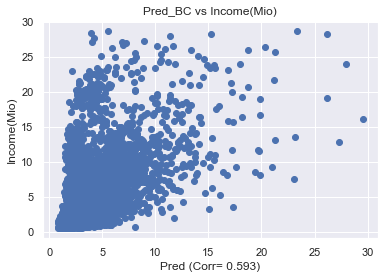

In [154]:
plt.scatter(Test['OLS_BC']/1000000, Test['Avg_SalaryL3M']/1000000)
plt.title("Pred_BC" +" vs Income(Mio)")
plt.ticklabel_format(style='plain')
plt.xlabel("Pred (Corr= "+str(round(Test[['Avg_SalaryL3M','OLS_BC']].corr()['OLS_BC'][0],3))+')')
plt.ylabel("Income(Mio)")

plt.show()

In [ ]:
#cor_result.corr().loc['Income_pred_bc'][0]

In [ ]:
#cor_result['Income_pred_bc'] = LR_bc_pred_ts
#cor_result['Income_pred2'] = LR2_pred_ts
#cor_result.corr()

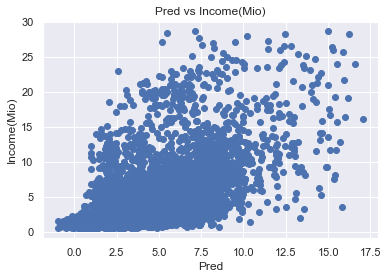

,Income,Income_pred
Income,1.00000,0.61256
Income_pred,0.61256,1.00000


In [197]:
#plt.scatter(LR_pred_ts/1000000, Test['Avg_SalaryL3M']/1000000)
#plt.title("Pred" +" vs Income(Mio)")
#plt.ticklabel_format(style='plain')
#plt.xlabel("Pred")
#plt.ylabel("Income(Mio)")
#plt.show()

#cor_result = pd.DataFrame()
#cor_result['Income'] =  Test['Avg_SalaryL3M']
#cor_result['Income_pred'] = LR_pred_ts
#cor_result['Income_pred2'] = LR2_pred_ts
#cor_result.corr()

In [155]:
vars_selected

['UMR',
 'mean_EMAIL_FINAL_ALL_GROUP_grp',
 'mean_Brand_all_grp',
 'RamTotalSize',
 'mean_JENIS_USAHA_Upper_grp',
 'mean_provider_final_grp',
 'Age',
 'mean_YOE_JABATAN_grp',
 'mean_LocaleDisplayLanguage_grp',
 'mean_EDUCATION_grp']

In [156]:
#vars_selected = list(set(vars_selected)-set(['LAMA_TINGGAL','mean_PROVINCE_cln_grp']))+list(['UMR'])

#Remove SDK

vars_selected2 = list(set(vars_selected)-set(['RamTotalSize','mean_LocaleDisplayLanguage_grp','mean_Brand_all_grp','mean_EMAIL_FINAL_ALL_GROUP_grp']))+list(['mean_EMAIL_GROUP_grp'])
#vars_selected = list(['age','mean_educationstatus_grp','mean_maritalstatus_grp']) 
vars_selected2 

['UMR',
 'mean_JENIS_USAHA_Upper_grp',
 'mean_provider_final_grp',
 'mean_EDUCATION_grp',
 'Age',
 'mean_YOE_JABATAN_grp',
 'mean_EMAIL_GROUP_grp']

In [157]:

LR2 = LinearRegression()
#LR = DecisionTreeRegressor(max_depth=5)
LR2.fit(Train[vars_selected2], Train['Avg_SalaryL3M'])
LR2_pred_ts=LR2.predict(Test[vars_selected2])
LR2_pred_tr=LR2.predict(Train[vars_selected2])

In [158]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR2_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR2_pred_ts))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR2_pred_ts)))
#print('MAPE     : ',mape(Test['Avg_SalaryL3M'], LR_pred_ts))

print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], LR2_pred_ts))

print('\n')
print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], LR2_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR2_pred_tr))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR2_pred_tr)))
#print('MAPE     : ',mape(Train['Avg_SalaryL3M'], LR_pred_tr))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], LR2_pred_tr))

Test
MAE      :  2509401.306541139
RMSE     :  3863739.16338959
R2 Score :  0.31527493197511525


Train
MAE      :  2571193.884814445
RMSE     :  3726872.257445354
R2 Score :  0.3221472834428655


In [159]:
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR2_pred_ts))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR2_pred_ts))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR2_pred_ts)))
#print('MAPE     : ',mape(Test['Avg_SalaryL3M'], LR_pred_ts))

print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], LR2_pred_ts))

print('\n')
print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], LR2_pred_tr))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR2_pred_tr))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR2_pred_tr)))
#print('MAPE     : ',mape(Train['Avg_SalaryL3M'], LR_pred_tr))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], LR2_pred_tr))

Test
MAE      :  2509401.306541139
R2 Score :  0.31527493197511525


Train
MAE      :  2571193.884814445
R2 Score :  0.3221472834428655


In [160]:
print(regression_roc_auc_score(Train['Avg_SalaryL3M'], LR2_pred_tr))
print(2*regression_roc_auc_score(Train['Avg_SalaryL3M'], LR2_pred_tr)-1)

0.7175
0.4323999999999999


In [161]:
print(regression_roc_auc_score(Test['Avg_SalaryL3M'], LR2_pred_ts))
print(2*regression_roc_auc_score(Test['Avg_SalaryL3M'], LR2_pred_ts)-1)

0.7097
0.4287000000000001


In [162]:
Train['OLS_NonSDK']=LR2.predict(Train[vars_selected2])
Test['OLS_NonSDK']=LR2.predict(Test[vars_selected2])

In [163]:
Test[['OLS_NonSDK','Avg_SalaryL3M']].corr()['Avg_SalaryL3M'][0]

0.5685004613144679

In [164]:
Train[['OLS_NonSDK','Avg_SalaryL3M']].corr()['Avg_SalaryL3M'][0]

0.567580200009539

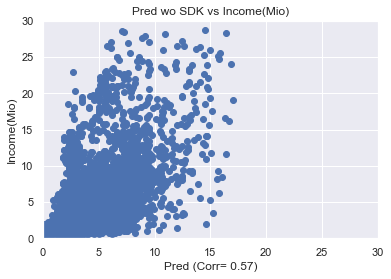

In [165]:
plt.scatter(LR2_pred_ts/1000000, Test['Avg_SalaryL3M']/1000000)
plt.title("Pred wo SDK" +" vs Income(Mio)")
plt.ticklabel_format(style='plain')
plt.xlabel("Pred (Corr= "+ str(round(Test[['OLS_NonSDK','Avg_SalaryL3M']].corr()['Avg_SalaryL3M'][0],2))+ ')')
plt.ylabel("Income(Mio)")
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [ ]:
## Error distribution for non sdk

In [ ]:
#cor_result = pd.DataFrame()
#cor_result['Income'] =  Test['Avg_SalaryL3M']
#cor_result['Income_pred'] = LR_pred_ts


In [ ]:
#Bug?
#Pred_corr = pd.DataFrame()
#Pred_corr['Pred'] = LR2_pred_ts
#Pred_corr['Income'] = Test['Avg_SalaryL3M']
#Pred_corr.corr()

In [166]:
a2 = list([LR2.intercept_])
for i in LR2.coef_:
    a2.append(i)
    
b2 = list(['constant'])
for i in vars_selected2:
    b2.append(i)

    
grp_attributes_cat_train_copy2 = attributes_cat_train_grp
#grp_attributes_cat_train_copy2['bin'] = grp_attributes_cat_train_copy2.index



coefficients2 = pd.concat([pd.DataFrame(b2),pd.DataFrame(np.transpose(a2))], axis=1)

coefficients2.columns = ['attributes','coefficients']
coefficients2['attributes'] = coefficients2['attributes'].str.replace('mean_','')
coefficients2 = pd.merge(coefficients2,grp_attributes_cat_train_copy2[['attribute','bin','mean']], how='left', left_on='attributes' , right_on ='attribute', indicator=False)
coefficients2 = coefficients2[['attributes','bin', 'mean','coefficients']]
coefficients2.columns = ['attributes','bin', 'value','coefficients']


pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_rows = len(coefficients2)
coefficients2.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\model_MVP.csv')
coefficients2   

,attributes,bin,value,coefficients
0,constant,NaN,nan,-7983485.05936
1,UMR,NaN,nan,0.39573
2,JENIS_USAHA_Upper_grp,"'54-LAINNYA','12-INDUSTRI LAINNYA'",5241037.72033,0.46482
3,JENIS_USAHA_Upper_grp,18-DISTRIBUSI,4187410.43102,0.46482
4,JENIS_USAHA_Upper_grp,19-PERDAGANGAN,3845617.30012,0.46482
5,JENIS_USAHA_Upper_grp,27-SPBU,1551656.14326,0.46482
6,JENIS_USAHA_Upper_grp,34-TRANSPORTASI/ANGKUTAN UMUM,5280447.70315,0.46482
7,JENIS_USAHA_Upper_grp,37-DEALER MOTOR/MOBIL,6783668.84180,0.46482
8,JENIS_USAHA_Upper_grp,44 & 67-PERBANKAN/ASURANSI/KEU/BPR,5463325.96574,0.46482
9,JENIS_USAHA_Upper_grp,Others,6358695.00055,0.46482


In [167]:
LR2_test = LinearRegression()

marg_cont_new = dict()
a2 = vars_selected2
for i in a2 :
    b2= list(set(a2)- set([i]))
    
    LR2_test.fit(Train[b2], Train['Avg_SalaryL3M'])
    LR2_test_pred_ts=LR2_test.predict(Test[b2])
    
    LR2.fit(Train[a2], Train['Avg_SalaryL3M'])
    LR2_pred_ts=LR2.predict(Test[a2])
    
    #print(i,'R2 Score : ',metrics.r2_score(Test['max_income_proxy'], LR_test_pred_ts))
    marg_cont_new[i] = [metrics.r2_score(Test['Avg_SalaryL3M'], LR2_test_pred_ts)
                    ,metrics.r2_score(Test['Avg_SalaryL3M'], LR2_pred_ts)
                    , metrics.r2_score(Test['Avg_SalaryL3M'], LR2_test_pred_ts) - metrics.r2_score(Test['Avg_SalaryL3M'], LR2_pred_ts)
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR2_test_pred_ts) - metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR2_pred_ts) 
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR2_test_pred_ts)
                    ,metrics.mean_absolute_error(Test['Avg_SalaryL3M'], LR2_pred_ts)]
    
    #print(i,b)
#marg_cont
marg_cont_new = pd.DataFrame.from_dict(marg_cont_new,orient ='index') 
marg_cont_new.columns = ['R2_drop','R2_full','marg_cont_R2(-)','marg_cont_MAE(+)','MAE_drop','MAE_full']
pd.options.display.max_rows = None
#marg_cont.sort_values(['marginal_contribution'], ascending=['False'])

marg_cont_new2 = marg_cont_new
marg_cont_new2.index = marg_cont_new2.index.str.replace('mean_','')
marg_cont_new2.sort_values(['marg_cont_R2(-)'], ascending=['False']).to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\marginal_contribution_MVP.csv')
marg_cont_new2.sort_values(['marg_cont_R2(-)'], ascending=['False'])

,R2_drop,R2_full,marg_cont_R2(-),marg_cont_MAE(+),MAE_drop,MAE_full
YOE_JABATAN_grp,0.25388,0.31527,-0.06140,56883.41078,2566284.71732,2509401.30654
JENIS_USAHA_Upper_grp,0.28845,0.31527,-0.02683,129826.44287,2639227.74941,2509401.30654
UMR,0.30952,0.31527,-0.00575,38938.12541,2548339.43195,2509401.30654
EMAIL_GROUP_grp,0.30962,0.31527,-0.00566,29621.90362,2539023.21017,2509401.30654
provider_final_grp,0.31305,0.31527,-0.00223,17764.92983,2527166.23637,2509401.30654
Age,0.31513,0.31527,-0.00014,4974.83819,2514376.14473,2509401.30654
EDUCATION_grp,0.31594,0.31527,0.00066,10701.68855,2520102.99509,2509401.30654


In [ ]:
vars_selected2

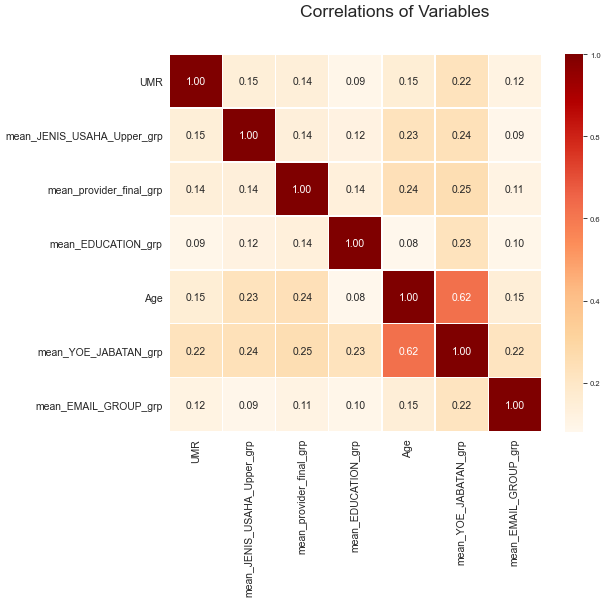

In [168]:
import matplotlib
cormat2 = Train[vars_selected2].fillna(0).corr()

matplotlib.rcParams.update({'font.size': 15})
sns.set()
%matplotlib inline
%config InlineBackend.close_figures=True
a4_dims = (12,10)

fig2, ax = plt.subplots(figsize=a4_dims, dpi=50)
fig2.suptitle('Correlations of Variables',fontsize=25)
sns.heatmap(cormat2, ax=ax, annot=True, fmt="0.2f", linewidths=.5, annot_kws={"size":15},cmap="OrRd")
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

#plt.savefig(output_folder+'/analysis/correlation_full.png', bbox_inches='tight', dpi = 72)
plt.show()

In [169]:
Train['error2'] = Train['OLS_NonSDK'] - Train['Avg_SalaryL3M']
Test['error2'] = Test['OLS_NonSDK'] - Test['Avg_SalaryL3M']
Train['abs_error2'] = abs(Train['error2'])
Test['abs_error2'] = abs(Test['error2'])
Train['abs_error2_mio'] = Train['abs_error2']/1000000
Test['abs_error2_mio'] = Test['abs_error2']/1000000

In [170]:
Train['sample_type'] = 'Train'
Test['sample_type'] = 'Test'

In [171]:
Data_All = pd.concat([Train,Test],axis=0)
Data_All = pd.merge(Data_All, df[['CIF','min_bussdate','max_bussdate','buss_date']], how='left', left_index=True, right_index =True)
Data_All.head()

,Brand,Model,RamTotalSize,PhysicalSize,deviceModel,sub_group,vendor,NetworkOperatorName,LocaleDisplayLanguage,LocaleIso3Country,Rooted,HOME_PHONE_GROUP,FAX,PLACE_OF_BIRTH,Age,MARITAL_STATUS,Tax_Digit,EDUCATION,PROFESSION,JABATAN,JENIS_USAHA,EMAIL_GROUP,HOME_PHONE_CONTACT_GROUP,EMAIL_CONTACT_GROUP,JML_TANGGUNGAN,LAMA_TINGGAL,STATUS_TEMPAT_TINGGAL,TENURE,HUBUNGAN_NASABAH,EMAIL_FINAL_GROUP,PROVINCE_cln,provider1,provider2,provider_final,UMR,PDRB_lag1,Cont_PDRB_lag1,PDRB_lag2,Cont_PDRB_lag2,PDRB_lag3,Cont_PDRB_lag3,deviceModel_all,sub_all,Brand_all,vendor_all,EMAIL_FINAL_ALL_GROUP,YOE,Avg_SalaryL3M,norm_PDRB_lag3,norm_UMR,norm_Cont_PDRB_lag3,norm_PDRB_lag2,norm_Tax_Digit,norm_TENURE,norm_RamTotalSize,norm_Cont_PDRB_lag2,norm_Age,norm_PhysicalSize,norm_LAMA_TINGGAL,norm_JML_TANGGUNGAN,norm_PDRB_lag1,norm_Cont_PDRB_lag1,norm_YOE,PROFESSION_Upper,JABATAN_Upper,JENIS_USAHA_Upper,Avg_IncomeL3M_Mio,YOE_grp,Age_grp,MARITAL_STATUS_grp,Brand_grp,EMAIL_FINAL_GROUP_grp,LocaleDisplayLanguage_grp,provider_final_grp,JABATAN_Upper_grp,PROVINCE_cln_grp,STATUS_TEMPAT_TINGGAL_grp,EDUCATION_grp,PROFESSION_Upper_grp,Tax_Digit_grp,Brand_all_grp,EMAIL_FINAL_ALL_GROUP_grp,EMAIL_GROUP_grp,JENIS_USAHA_Upper_grp,MaritalStat_NPWP_grp,Email_NPWP_grp,Email_MaritalStat_grp,JENIS_USAHA_Profession_grp,YOE_JABATAN_grp,EDUCATION_JABATAN_grp,EDUCATION_Age_grp,mean_YOE_grp,mean_Age_grp,mean_MARITAL_STATUS_grp,mean_Brand_grp,mean_EMAIL_FINAL_GROUP_grp,mean_LocaleDisplayLanguage_grp,mean_provider_final_grp,mean_JABATAN_Upper_grp,mean_PROVINCE_cln_grp,mean_STATUS_TEMPAT_TINGGAL_grp,mean_EDUCATION_grp,mean_PROFESSION_Upper_grp,mean_Tax_Digit_grp,mean_Brand_all_grp,mean_EMAIL_FINAL_ALL_GROUP_grp,mean_EMAIL_GROUP_grp,mean_JENIS_USAHA_Upper_grp,mean_MaritalStat_NPWP_grp,mean_Email_NPWP_grp,mean_Email_MaritalStat_grp,mean_JENIS_USAHA_Profession_grp,mean_YOE_JABATAN_grp,mean_EDUCATION_JABATAN_grp,mean_EDUCATION_Age_grp,OLS,error,abs_error,abs_error_mio,RF,OLS_BC,OLS_NonSDK,error2,abs_error2,abs_error2_mio,sample_type,CIF,min_bussdate,max_bussdate,buss_date
333,None,None,4284.78868,5.90222,None,None,None,None,None,None,None,mobile,,blitar,21,Tidak Menikah,1,None,24-Pegawai Swasta,01-Non Staff,54-Lainnya,gmail,mobile,gmail,0.00000,0.00000,None,0.00000,,gmail,JAWA TIMUR,Indosat,Indosat,Indosat,1891567.00000,2454498796.00000,0.14480,2299791052.00000,0.14580,2345548552.00000,0.14620,None,None,None,None,gmail,0,1193333.33333,0.74162,-0.55275,0.73843,0.73220,-0.67580,-0.51359,0.00000,0.73249,-0.98038,-0.00000,-0.42449,-0.49606,0.75796,0.75579,-0.98038,24-PEGAWAI SWASTA,01-NON STAFF,54-LAINNYA,1.19333,(0_2),(<23),Tidak Menikah,Empty,'gmail',Others,Indosat,'01-NON STAFF','JAWA TIMUR',"'Lainnya','Dinas','Pinjam','Empty'","'Lainnya',''Empty'",'24-PEGAWAI SWASTA',False,Empty,'gmail','gmail',"'54-LAINNYA','12-INDUSTRI LAINNYA'",Tidak Menikah__False,'gmail'__False,'gmail'__Tidak Menikah,"'24-PEGAWAI SWASTA'__'54-LAINNYA','12-INDUSTRI...",(0_2)__'01-NON STAFF',"'Lainnya',''Empty'__'01-NON STAFF'",(<23),2523268.99172,2523268.99172,4294958.03659,5542768.90164,4764866.25396,5300907.19880,4254878.81457,3515434.91747,3586430.61481,4551758.58624,4751388.47047,5085781.29231,4308051.57587,3661371.72236,4765848.51670,4763227.74002,5241037.72033,3591446.07588,4098515.48675,4101536.90559,5496791.44949,2300874.31723,3281953.34415,2523268.99172,1699918.74983,506585.41650,506585.41650,0.50659,2066761.68982,1877490.91740,2175043.81233,981710.47900,981710.47900,0.98171,Train,1AA09W,2022-10-31,2022-12-31,2022-12-31
335,None,None,4284.78868,5.90222,None,None,None,None,None,None,None,mobile,,PEKANBARU,27,Tidak Menikah,0,None,24-Pegawai Swasta,02-STAFF,54-LAINNYA,gmail,mobile,gmail,0.00000,5.00000,Kontrak/Sewa,4.00000,5,gmail,RIAU,Telkomsel,Telkomsel,Telkomsel,2938564.00000,843211153.00000,0.04970,728649985.30000,0.04620,760247508.90000,0.04740,"iPhone12,1",denielisabeth@gmail.com,Apple,Apple,gmail,6,5455933.33333,-1.15130,0.52330,-1.15202,-1.16854,-0.82221,-0.41875,0.00000,-1.16871,-0.33235,-0.00000,-0.37725

In [172]:
Data_All.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Data_All.csv')

In [173]:
Train.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Train.csv')
Test.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Test.csv')

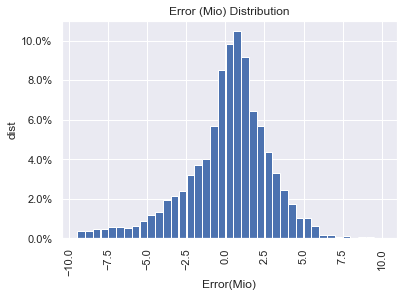

In [174]:
plt.hist(Test['error2']/1000000, 
          weights=np.ones(len(Test)) / len(Test),
         bins=[-9.5,-9,-8.5,-8,-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10], rwidth=0.97)
plt.ticklabel_format(style='plain')
plt.title('Error (Mio) Distribution')
plt.ylabel('dist')
plt.xlabel('Error(Mio)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

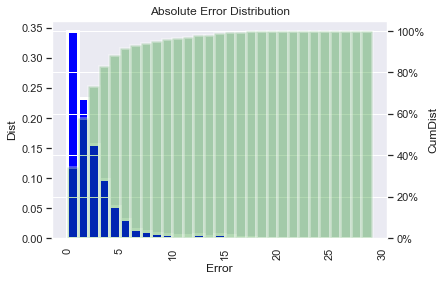

In [175]:
ax3 = Test['abs_error2_mio'].plot(kind = 'hist', use_index=True, weights=np.ones(len(Test)) / len(Test),
              #y = 'mean', 
                                   bins = range(30),
                                      
                                       color = 'Blue',rot=90,
              linewidth = 3, label = 'absolute error')

ax4 = Test['abs_error2_mio'].plot(kind = 'hist', use_index=True, weights=np.ones(len(Test)) / len(Test),
                                       
               #y = 'dist',
                                       bins = range(30),
                                       cumulative=1,
                                       secondary_y = True,
               color = 'Green', rot=90,  linewidth = 3, alpha = 0.3)
               #ax3 = ax3)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=90)
#title of the plot
plt.title("Absolute Error Distribution")



#labeling x and y-axis
ax3.set_xlabel('Error', color = 'k')
ax3.set_ylabel('Dist', color = "k")
ax4.set_ylabel('CumDist', color = 'k')


plt.show()

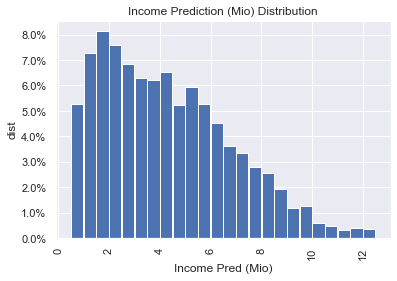

In [176]:
plt.hist(Test['OLS']/1000000, 
          weights=np.ones(len(Test)) / len(Test),
         bins=[0.5,  1,  1.5, 2, 2.5,  3, 3.5,  4, 4.5,  5, 5.5,  6, 6.5,  7,7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5], rwidth=0.965)
plt.ticklabel_format(style='plain')
plt.title('Income Prediction (Mio) Distribution')
plt.ylabel('dist')
plt.xlabel('Income Pred (Mio)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

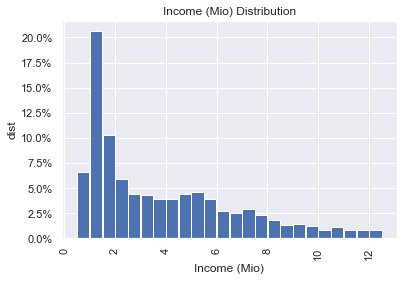

In [177]:
plt.hist(Test['Avg_SalaryL3M']/1000000, 
          weights=np.ones(len(Test)) / len(Test),
         bins=[0.5,  1,  1.5, 2, 2.5,  3, 3.5,  4, 4.5,  5, 5.5,  6, 6.5,  7,7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5], rwidth=0.965)
plt.ticklabel_format(style='plain')
plt.title('Income (Mio) Distribution')
plt.ylabel('dist')
plt.xlabel('Income (Mio)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

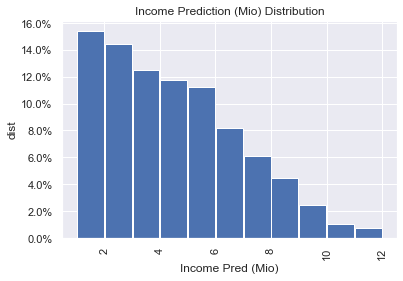

In [178]:
plt.hist(Test['OLS']/1000000, 
          weights=np.ones(len(Test)) / len(Test),
         bins=[  1,   2,  3,  4,  5,  6,   7, 8,  9,  10, 11, 12 ], rwidth=0.965)
plt.ticklabel_format(style='plain')
plt.title('Income Prediction (Mio) Distribution')
plt.ylabel('dist')
plt.xlabel('Income Pred (Mio)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [179]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)





def char_analysis_complete(df,attribute,target):
    df2 = df[[target,attribute]]
    if  df[attribute].isnull().values.any() ==True:
        df2.loc[df[attribute].isnull(),attribute] = "Empty"
        analysis = df2.groupby(attribute, as_index = False, dropna=False)[target].agg(['count','min',q1,'mean','median',q3,'max'])
        analysis['dist'] = analysis['count']/ analysis['count'].sum()
        analysis['attribute'] = analysis.index.name
        analysis.index.name = 'bin'
    else:
        #df2.loc[df[attribute].isnull(),attribute] = "Empty"
        analysis = df2.groupby(attribute, as_index = False, dropna=False)[target].agg(['count','min',q1,'mean','median',q3,'max'])
        analysis['dist'] = analysis['count']/ analysis['count'].sum()
        analysis['attribute'] = analysis.index.name
        analysis.index.name = 'bin'
    
    
    
    
    
# faster method
    df3 = pd.merge(df2, analysis[['dist','count','min','q1','mean','median','q3','max']], left_on=attribute , right_index =True, indicator=False)
    
# old method    
#    cor = []
#    for i in range(0,len(df2)):
#        cor.append(xlookup(df2.iloc[i,:][attribute],analysis.index.values,analysis['mean']))
#    df2['mean'] = cor
    


     

  
    
    analysis['min_correlation'] = df3[[target,'min']].corr().iloc[0,1]
    analysis['q1_correlation'] = df3[[target,'q1']].corr().iloc[0,1]
    analysis['mean_correlation'] = df3[[target,'mean']].corr().iloc[0,1]
    analysis['median_correlation'] = df3[[target,'median']].corr().iloc[0,1]
    analysis['q3_correlation'] = df3[[target,'q3']].corr().iloc[0,1]
    analysis['max_correlation'] = df3[[target,'max']].corr().iloc[0,1]
    analysis['dist_correlation'] = df3[[target,'dist']].corr().iloc[0,1]


    return analysis

In [180]:
vars_selected

['UMR',
 'mean_EMAIL_FINAL_ALL_GROUP_grp',
 'mean_Brand_all_grp',
 'RamTotalSize',
 'mean_JENIS_USAHA_Upper_grp',
 'mean_provider_final_grp',
 'Age',
 'mean_YOE_JABATAN_grp',
 'mean_LocaleDisplayLanguage_grp',
 'mean_EDUCATION_grp']

In [181]:
char_analysis_complete(Train,'Brand_all_grp','Avg_SalaryL3M')

,count,min,q1,mean,median,q3,max,dist,attribute,min_correlation,q1_correlation,mean_correlation,median_correlation,q3_correlation,max_correlation,dist_correlation
bin,,,,,,,,,,,,,,,,
'Apple',1857,500000.00000,4237666.66667,7202095.88925,5908715.00000,8585381.33333,30000000.00000,0.11151,Brand_all_grp,-0.06666,0.24656,0.26339,0.25912,0.26181,0.02842,-0.06512
"'OPPO','vivo','xiaomi'",5625,500000.00000,1533333.33333,4282432.59342,3238345.33333,5646918.66667,29900000.00000,0.33778,Brand_all_grp,-0.06666,0.24656,0.26339,0.25912,0.26181,0.02842,-0.06512
'Redmi',1368,500000.00000,1612500.00000,4763320.06506,4014738.66667,6228819.33333,29978172.33333,0.08215,Brand_all_grp,-0.06666,0.24656,0.26339,0.25912,0.26181,0.02842,-0.06512
'realme',981,531666.66667,1340000.00000,3850068.87394,2738333.33333,5263700.00000,27983457.33333,0.05891,Brand_all_grp,-0.06666,0.24656,0.26339,0.25912,0.26181,0.02842,-0.06512
'samsung',3145,500000.00000,2756186.66667,6541863.39597,5181440.33333,8151287.33333,29499904.66667,0.18885,Brand_all_grp,-0.06666,0.24656,0.26339,0.25912,0.26181,0.02842,-0.06512
Empty,1628,500000.00000,1402500.00000,3661371.72236,2275500.00000,4614433.75000,29775198.33333,0.09776,Brand_all_grp,-0.06666,0.24656,0.26339,0.25912,0.26181,0.02842,-0.06512
Others,2049,500000.00000,1561000.00000,4836107.93314,4058800.00000,6347194.33333,29990867.66667,0.12304,Brand_all_grp,-0.06666,0.24656,0.26339,0.25912,0.26181,0.02842,-0.06512


In [182]:
grp_cols

['YOE_grp',
 'Age_grp',
 'MARITAL_STATUS_grp',
 'Brand_grp',
 'EMAIL_FINAL_GROUP_grp',
 'LocaleDisplayLanguage_grp',
 'provider_final_grp',
 'JABATAN_Upper_grp',
 'PROVINCE_cln_grp',
 'STATUS_TEMPAT_TINGGAL_grp',
 'EDUCATION_grp',
 'PROFESSION_Upper_grp',
 'Tax_Digit_grp',
 'Brand_all_grp',
 'EMAIL_FINAL_ALL_GROUP_grp',
 'EMAIL_GROUP_grp',
 'JENIS_USAHA_Upper_grp',
 'MaritalStat_NPWP_grp',
 'Email_NPWP_grp',
 'Email_MaritalStat_grp',
 'JENIS_USAHA_Profession_grp',
 'YOE_JABATAN_grp',
 'EDUCATION_JABATAN_grp',
 'EDUCATION_Age_grp']

In [183]:
char_analysis_complete(Train,'YOE_grp','Avg_SalaryL3M')

,count,min,q1,mean,median,q3,max,dist,attribute,min_correlation,q1_correlation,mean_correlation,median_correlation,q3_correlation,max_correlation,dist_correlation
bin,,,,,,,,,,,,,,,,
(0_2),4631,500000.00000,1153333.33333,2523268.99172,1543833.33333,3415223.66667,23738338.00000,0.27809,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771
(3_7),4379,500000.00000,2000000.00000,4782403.76288,4265100.00000,6240868.66667,29990867.66667,0.26296,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771
(8_14),3617,500000.00000,3061666.66667,6248395.67846,5223333.33333,7765319.66667,30000000.00000,0.21720,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771
(>15),4026,500000.00000,3317097.25000,7196304.41398,5329230.50000,9175892.91667,30000000.00000,0.24176,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771


In [216]:
attributes_EDA =pd.DataFrame()
for i in grp_cols:
    attribute_EDA = char_analysis_complete(Train,i,'Avg_SalaryL3M')
    attribute_EDA['bin'] = attribute_EDA.index
    attribute_EDA['freq'] = attribute_EDA['count']/len(Train)
    attribute_EDA = attribute_EDA.reset_index(drop=True)
    attributes_EDA = pd.concat([attributes_EDA, attribute_EDA])

attributes_EDA.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Attributes_EDA.csv')    
attributes_EDA    

,count,min,q1,mean,median,q3,max,dist,attribute,min_correlation,q1_correlation,mean_correlation,median_correlation,q3_correlation,max_correlation,dist_correlation,bin,freq
0,4631,500000.00000,1153333.33333,2523268.99172,1543833.33333,3415223.66667,23738338.00000,0.27809,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(0_2),0.27809
1,4379,500000.00000,2000000.00000,4782403.76288,4265100.00000,6240868.66667,29990867.66667,0.26296,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(3_7),0.26296
2,3617,500000.00000,3061666.66667,6248395.67846,5223333.33333,7765319.66667,30000000.00000,0.21720,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(8_14),0.21720
3,4026,500000.00000,3317097.25000,7196304.41398,5329230.50000,9175892.91667,30000000.00000,0.24176,YOE_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(>15),0.24176
0,4379,500000.00000,2000000.00000,4782403.76288,4265100.00000,6240868.66667,29990867.66667,0.26296,Age_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(24-28),0.26296
1,3617,500000.00000,3061666.66667,6248395.67846,5223333.33333,7765319.66667,30000000.00000,0.21720,Age_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(29-35),0.21720
2,4631,500000.00000,1153333.33333,2523268.99172,1543833.33333,3415223.66667,23738338.00000,0.27809,Age_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(<23),0.27809
3,4026,500000.00000,3317097.25000,7196304.41398,5329230.50000,9175892.91667,30000000.00000,0.24176,Age_grp,nan,0.39213,0.39641,0.38344,0.39598,0.34752,-0.32771,(>35),0.24176
0,6077,500000.00000,2843948.66667,6380894.73803,4882957.66667,8000000.00000,30000000.00000,0.36492,MARITAL_STATUS_grp,nan,0.22184,0.22184,0.22184,0.22184,nan,-0.22184,"'Janda/Duda','Nikah'",0.36492
1,10576,500000.00000,1433333.33333,4294958.03659,3180741.00000,5772054.91667,30000000.00000,0.63508,MARITAL_STATUS_grp,nan,0.22184,0.22184,0.22184,0.22184,nan,-0.22184,Tidak Menikah,0.63508


In [217]:
attributes_EDA_test =pd.DataFrame()
for i in grp_cols:
    attribute_EDA_test = char_analysis_complete(Test,i,'Avg_SalaryL3M')
    attribute_EDA_test['bin'] = attribute_EDA_test.index
    attribute_EDA_test['freq'] = attribute_EDA_test['count']/len(Test)
    attribute_EDA_test = attribute_EDA_test.reset_index(drop=True)
    attributes_EDA_test = pd.concat([attributes_EDA_test, attribute_EDA_test])
    
attributes_EDA_test.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Attributes_EDA_test.csv')    
attributes_EDA_test    

,count,min,q1,mean,median,q3,max,dist,attribute,min_correlation,q1_correlation,mean_correlation,median_correlation,q3_correlation,max_correlation,dist_correlation,bin,freq
0,2165,501666.66667,1193333.33333,2847908.27852,1533333.33333,3431833.33333,17084445.00000,0.39002,YOE_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(0_2),0.39002
1,1428,501666.66667,1421250.00000,3931432.19888,3056300.00000,5425064.66667,25000000.00000,0.25725,YOE_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(3_7),0.25725
2,989,561333.33333,3309333.33333,7191793.17695,5677333.33333,8935523.33333,28635290.33333,0.17817,YOE_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(8_14),0.17817
3,969,612083.33333,3734333.33333,8074195.05401,6000000.00000,10748741.66667,28704900.00000,0.17456,YOE_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(>15),0.17456
0,1428,501666.66667,1421250.00000,3931432.19888,3056300.00000,5425064.66667,25000000.00000,0.25725,Age_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(24-28),0.25725
1,989,561333.33333,3309333.33333,7191793.17695,5677333.33333,8935523.33333,28635290.33333,0.17817,Age_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(29-35),0.17817
2,2165,501666.66667,1193333.33333,2847908.27852,1533333.33333,3431833.33333,17084445.00000,0.39002,Age_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(<23),0.39002
3,969,612083.33333,3734333.33333,8074195.05401,6000000.00000,10748741.66667,28704900.00000,0.17456,Age_grp,0.43677,0.45469,0.45787,0.45318,0.45531,0.40831,-0.42009,(>35),0.17456
0,1704,533083.33333,2952400.00000,7045714.26721,5203561.83333,9066496.08333,28441501.33333,0.30697,MARITAL_STATUS_grp,0.31826,0.31826,0.31826,0.31826,0.31826,-0.31826,-0.31826,"'Janda/Duda','Nikah'",0.30697
1,3847,501666.66667,1290833.33333,3823885.61243,2100091.66667,5396027.66667,28704900.00000,0.69303,MARITAL_STATUS_grp,0.31826,0.31826,0.31826,0.31826,0.31826,-0.31826,-0.31826,Tidak Menikah,0.69303


In [186]:
import pickle

Save the model to disk.

In [188]:
model_filename1 = 'LinReg'
pickle.dump(LR, open(model_filename1, 'wb'))

In [189]:
model_filename2 = 'LinReg2'
pickle.dump(LR2, open(model_filename2, 'wb'))

In [190]:
model_filename3 = 'DecTree'
pickle.dump(DT, open(model_filename3, 'wb'))

In [191]:
model_filename4 = 'RanFor'
pickle.dump(RF, open(model_filename4, 'wb'))

Load model.

In [192]:
model_reload = 'RanFor'
modelRF = pickle.load(open(model_reload, 'rb'))

In [193]:
#testing
print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['Avg_SalaryL3M'], modelRF.predict(Test[vars_selected])))
#print('MSE      : ',metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR2_pred_ts))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['Avg_SalaryL3M'], LR2_pred_ts)))
#print('MAPE     : ',mape(Test['Avg_SalaryL3M'], LR_pred_ts))

print('R2 Score : ',metrics.r2_score(Test['Avg_SalaryL3M'], modelRF.predict(Test[vars_selected])))

print('\n')
print('Train')
print('MAE      : ',metrics.mean_absolute_error(Train['Avg_SalaryL3M'], modelRF.predict(Train[vars_selected])))
#print('MSE      : ',metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR2_pred_tr))
#print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Train['Avg_SalaryL3M'], LR2_pred_tr)))
#print('MAPE     : ',mape(Train['Avg_SalaryL3M'], LR_pred_tr))
print('R2 Score : ',metrics.r2_score(Train['Avg_SalaryL3M'], modelRF.predict(Train[vars_selected])))

Test
MAE      :  2327563.693887006
R2 Score :  0.39396936930678006


Train
MAE      :  2177328.744159681
R2 Score :  0.48891941116118875


(0.0, 30.0)

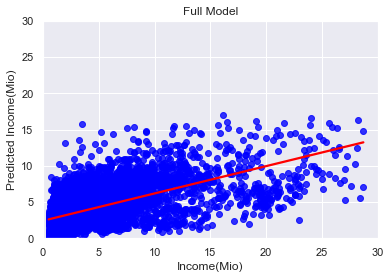

In [209]:
plt.title('Full Model')
sns.regplot(x=Test['Avg_SalaryL3M']/1000000, y=LR.predict(Test[vars_selected])/1000000,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Income(Mio)")
plt.ylabel("Predicted Income(Mio)")
plt.xlim(0,30)
plt.ylim(0,30)

(0.0, 30.0)

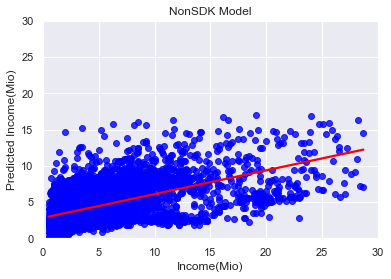

In [210]:
sns.regplot(x=Test['Avg_SalaryL3M']/1000000, y=LR2.predict(Test[vars_selected2])/1000000,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.title('NonSDK Model')
plt.xlabel("Income(Mio)")
plt.ylabel("Predicted Income(Mio)")
plt.xlim(0,30)
plt.ylim(0,30)

# OOT Validation

In [219]:
# Setting SQL
server = 'sqldtmprd01'
database = 'ADS_AA'
user = 'usrads'
password = 'gdi83ie8efdshfo3'


conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER=' + server + '; \
                       DATABASE=' + database +'; \
                       UID=' + user + '; \
                       PWD=' + password + '; '
                     )

cursor = conn.cursor()

In [220]:
OOT_all = pd.read_sql_query("""select * from [ADS_AA].dbo.alv_IEFull_OOT""", conn) 

In [221]:
# Remove sample with nmonths less than 3
OOT_all = OOT_all[OOT_all['Nmonths']>=3]
print(OOT_all.shape)

(18458, 45)


In [225]:
# Income in Mio

OOT_all['Avg_IncomeL3M_Mio'] = OOT_all['Avg_SalaryL3M']/1000000
OOT_all['Predicted_Income_Mio'] = OOT_all['Predicted_Income']/1000000
OOT_all['Predicted_Income_nsdk_Mio'] = OOT_all['Predicted_Income_nsdk']/1000000

(array([1, 2, 3]),
 [Text(1, 0, 'Avg_IncomeL3M_Mio'),
  Text(2, 0, 'Predicted_Income_Mio'),
  Text(3, 0, 'Predicted_Income_nsdk_Mio')])

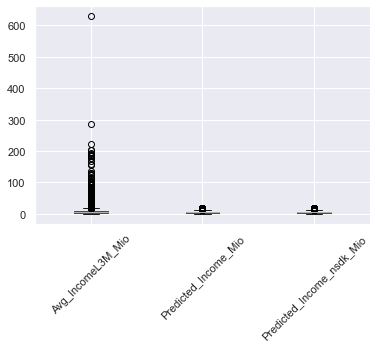

In [226]:
#boxplot

boxplot_all = OOT_all.boxplot(column=["Avg_IncomeL3M_Mio","Predicted_Income_Mio","Predicted_Income_nsdk_Mio"])
plt.xticks(rotation=45)

(array([1, 2, 3]),
 [Text(1, 0, 'Avg_IncomeL3M_Mio'),
  Text(2, 0, 'Predicted_Income_Mio'),
  Text(3, 0, 'Predicted_Income_nsdk_Mio')])

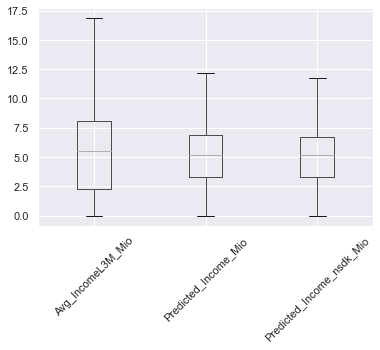

In [227]:
boxplot_all = OOT_all.boxplot(column=["Avg_IncomeL3M_Mio","Predicted_Income_Mio","Predicted_Income_nsdk_Mio"],showfliers=False)
plt.xticks(rotation=45)

In [228]:
Norm_OOT_all = OOT_all[(OOT_all['Avg_SalaryL3M']<=30000000)&(OOT_all['Avg_SalaryL3M']>=500000)]
print('Normalized dataset : ' +str(Norm_OOT_all.shape[0]))
print('Original dataset : ' + str(OOT_all.shape[0]))
print('N_Outlier: ' + str(OOT_all.shape[0]-Norm_OOT_all.shape[0]))
print('Outlier(%): ' + str((OOT_all.shape[0]-Norm_OOT_all.shape[0])/OOT_all.shape[0]))

Normalized dataset : 18087
Original dataset : 18458
N_Outlier: 371
Outlier(%): 0.020099685773106512


(array([1, 2, 3]),
 [Text(1, 0, 'Avg_IncomeL3M_Mio'),
  Text(2, 0, 'Predicted_Income_Mio'),
  Text(3, 0, 'Predicted_Income_nsdk_Mio')])

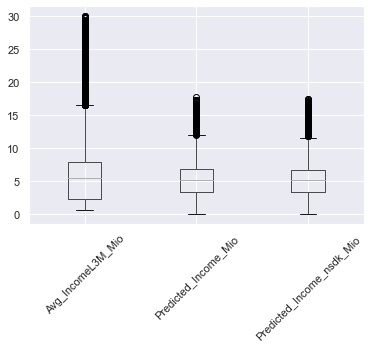

In [229]:
boxplot_all_norm = Norm_OOT_all.boxplot(column=["Avg_IncomeL3M_Mio","Predicted_Income_Mio","Predicted_Income_nsdk_Mio"])
plt.xticks(rotation=45)

In [230]:
Norm_OOT_all.head()

,year_income,Company_Name,CIF,source,Avg_SalaryL3M,Nmonths,min_bussdate,max_bussdate,buss_date,LocaleDisplayLanguage,Brand_all,JENIS_USAHA,EMAIL_FINAL_ALL_GROUP,provider_final,Age,JABATAN,RamTotalSize,EDUCATION,YOE,PROVINCE_cln,constant,LocaleDisplayLanguage_Income,Brand_all_Income,JENIS_USAHA_Income,YOE_grp,UMR,Education_income,email_grp,email_grp_income,provider_income,Ram_income,UMR_income,Age_income,YOE_JABATAN_grp,YOE_JABATAN_income,constant_nsdk,JENIS_USAHA_Income_nsdk,Education_income_nsdk,email_grp_income_nsdk,provider_income_nsdk,UMR_income_nsdk,Age_income_nsdk,YOE_JABATAN_income_nsdk,Predicted_Income,Predicted_Income_nsdk,Avg_IncomeL3M_Mio,Predicted_Income_Mio,Predicted_Income_nsdk_Mio
0,2023,"SENTRA TRADA INDOSTATION, PT",7019BM,SMART,2083333.33333,3,2023-02-28,2023-04-30,2023-04-30,Indonesia,Realme,26-MINIMARKET/SUPERMARKET,gmail,Smart,22,02-STAFF,1813.21094,None,1,JAWA BARAT,-11615136.53809,1200132.12022,2283278.80247,2387526.36865,(0_2),1986670.00000,194333.43568,gmail,1826481.26590,777908.74222,613801.27832,506600.85000,1042514.00000,(0_2)__02-STAFF,1747728.44052,-7983485.05942,2955624.38367,907329.96452,2190481.26943,1197061.68567,786178.33101,473678.62674,2014020.33812,965168.76589,2540889.53975,2.08333,0.96517,2.54089
1,2023,PT SINAR UTAMA SEJAHTERA,7019D0,AKSES BISNIS,4701426.66667,3,2023-02-28,2023-04-30,2023-04-30,None,None,12-INDUSTRI LAINNYA,gmail,Indosat,35,01-NON STAFF,nan,None,14,DAERAH ISTIMEWA YOGYAKARTA,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(8_14),1981782.00000,194333.43568,gmail,1826481.26590,1116748.46755,1450470.83323,505354.41000,1658545.00000,(>8)__01-NON STAFF,3055992.85086,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1718475.09930,784244.01898,753579.63345,3521617.89674,3961734.10594,4328362.00794,4.70143,3.96173,4.32836
2,2023,PT SINAR UTAMA SEJAHTERA,70202L,AKSES BISNIS,5427043.00000,3,2023-02-28,2023-04-30,2023-04-30,None,None,54-LAINNYA,gmail,Smart,37,02-STAFF,nan,None,16,JAWA TENGAH,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(>15),1958170.00000,194333.43568,gmail,1826481.26590,777908.74222,1450470.83323,499333.35000,1753319.00000,(>15)__02-STAFF,4506145.49128,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1197061.68567,774900.12052,796641.32679,5192722.42504,5161799.96104,5511770.91749,5.42704,5.16180,5.51177
3,2023,PT SINAR UTAMA SEJAHTERA,702060,AKSES BISNIS,1511479.66667,3,2023-02-28,2023-04-30,2023-04-30,None,None,12-INDUSTRI LAINNYA,gmail,Fren,28,01-NON STAFF,nan,None,7,JAWA TENGAH,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(3_7),1958170.00000,194333.43568,gmail,1826481.26590,777908.74222,1450470.83323,499333.35000,1326836.00000,(3_7)__01-NON STAFF,2374730.21944,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1197061.68567,774900.12052,602863.70676,2736554.97537,2603901.68919,2861825.84778,1.51148,2.60390,2.86183
4,2023,PT SINAR UTAMA SEJAHTERA,70207F,AKSES BISNIS,3600786.00000,3,2023-02-28,2023-04-30,2023-04-30,None,None,54-LAINNYA,gmail,Three,33,02-STAFF,nan,None,12,DAERAH ISTIMEWA YOGYAKARTA,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(8_14),1981782.00000,194333.43568,gmail,1826481.26590,1025705.82625,1450470.83323,505354.41000,1563771.00000,(8_14)__02-STAFF,4075325.84779,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1578376.84388,784244.01898,710517.94011,4696261.13052,4795250.46157,5319845.29295,3.60079,4.79525,5.31985


In [248]:
Norm_OOT_all['provider_final'].unique()

array(['Smart', 'Indosat', 'Fren', 'Three', 'Telkomsel', 'Axis',
       'XL Axiata', 'Esia', 'Others'], dtype=object)

In [231]:
OOT = Norm_OOT_all.copy()

In [233]:
print(Norm_OOT_all.shape)
print(OOT.shape)

(18087, 48)
(18087, 48)


In [327]:
OOT.head()

,year_income,Company_Name,CIF,source,Avg_SalaryL3M,Nmonths,min_bussdate,max_bussdate,buss_date,LocaleDisplayLanguage,Brand_all,JENIS_USAHA,EMAIL_FINAL_ALL_GROUP,provider_final,Age,JABATAN,RamTotalSize,EDUCATION,YOE,PROVINCE_cln,constant,LocaleDisplayLanguage_Income,Brand_all_Income,JENIS_USAHA_Income,YOE_grp,UMR,Education_income,email_grp,email_grp_income,provider_income,Ram_income,UMR_income,Age_income,YOE_JABATAN_grp,YOE_JABATAN_income,constant_nsdk,JENIS_USAHA_Income_nsdk,Education_income_nsdk,email_grp_income_nsdk,provider_income_nsdk,UMR_income_nsdk,Age_income_nsdk,YOE_JABATAN_income_nsdk,Predicted_Income,Predicted_Income_nsdk,Avg_IncomeL3M_Mio,Predicted_Income_Mio,Predicted_Income_nsdk_Mio,JABATAN_Upper_grp,Brand_all_grp,EDUCATION_grp,EMAIL_FINAL_ALL_GROUP_grp,JENIS_USAHA_Upper,JENIS_USAHA_Upper_grp,LocaleDisplayLanguage_grp,provider_final_grp
0,2023,"SENTRA TRADA INDOSTATION, PT",7019BM,SMART,2083333.33333,3,2023-02-28,2023-04-30,2023-04-30,Indonesia,Realme,26-MINIMARKET/SUPERMARKET,gmail,Smart,22,02-STAFF,1813.21094,None,1,JAWA BARAT,-11615136.53809,1200132.12022,2283278.80247,2387526.36865,(0_2),1986670.00000,194333.43568,gmail,1826481.26590,777908.74222,613801.27832,506600.85000,1042514.00000,(0_2)__'02-STAFF',1747728.44052,-7983485.05942,2955624.38367,907329.96452,2190481.26943,1197061.68567,786178.33101,473678.62674,2014020.33812,965168.76589,2540889.53975,2.08333,0.96517,2.54089,'02-STAFF','realme',"'Lainnya',''Empty'",'gmail',26-MINIMARKET/SUPERMARKET,Others,'Indonesia',"'Axis','Smart','Fren','Esia','Others'"
1,2023,PT SINAR UTAMA SEJAHTERA,7019D0,AKSES BISNIS,4701426.66667,3,2023-02-28,2023-04-30,2023-04-30,None,None,12-INDUSTRI LAINNYA,gmail,Indosat,35,01-NON STAFF,nan,None,14,DAERAH ISTIMEWA YOGYAKARTA,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(8_14),1981782.00000,194333.43568,gmail,1826481.26590,1116748.46755,1450470.83323,505354.41000,1658545.00000,(>8)__'01-NON STAFF',3055992.85086,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1718475.09930,784244.01898,753579.63345,3521617.89674,3961734.10594,4328362.00794,4.70143,3.96173,4.32836,'01-NON STAFF',Empty,"'Lainnya',''Empty'",'gmail',12-INDUSTRI LAINNYA,"'54-LAINNYA','12-INDUSTRI LAINNYA'",Others,Indosat
2,2023,PT SINAR UTAMA SEJAHTERA,70202L,AKSES BISNIS,5427043.00000,3,2023-02-28,2023-04-30,2023-04-30,None,None,54-LAINNYA,gmail,Smart,37,02-STAFF,nan,None,16,JAWA TENGAH,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(>15),1958170.00000,194333.43568,gmail,1826481.26590,777908.74222,1450470.83323,499333.35000,1753319.00000,(>15)__'02-STAFF',4506145.49128,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1197061.68567,774900.12052,796641.32679,5192722.42504,5161799.96104,5511770.91749,5.42704,5.16180,5.51177,'02-STAFF',Empty,"'Lainnya',''Empty'",'gmail',54-LAINNYA,"'54-LAINNYA','12-INDUSTRI LAINNYA'",Others,"'Axis','Smart','Fren','Esia','Others'"
3,2023,PT SINAR UTAMA SEJAHTERA,702060,AKSES BISNIS,1511479.66667,3,2023-02-28,2023-04-30,2023-04-30,None,None,12-INDUSTRI LAINNYA,gmail,Fren,28,01-NON STAFF,nan,None,7,JAWA TENGAH,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(3_7),1958170.00000,194333.43568,gmail,1826481.26590,777908.74222,1450470.83323,499333.35000,1326836.00000,(3_7)__'01-NON STAFF',2374730.21944,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1197061.68567,774900.12052,602863.70676,2736554.97537,2603901.68919,2861825.84778,1.51148,2.60390,2.86183,'01-NON STAFF',Empty,"'Lainnya',''Empty'",'gmail',12-INDUSTRI LAINNYA,"'54-LAINNYA','12-INDUSTRI LAINNYA'",Others,"'Axis','Smart','Fren','Esia','Others'"
4,2023,PT SINAR UTAMA SEJAHTERA,70207F,AKSES BISNIS,3600786.00000,3,2023-02-28,2023-04-30,2023-04-30,None,None,54-LAINNYA,gmail,Three,33,02-STAFF,nan,None,12,DAERAH ISTIMEWA YOGYAKARTA,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(8_14),1981782.00000,194333.43568,gmail,1826481.26590,1025705.82625,1450470.83323,505354.41000,1563771.00000,(8_14)__'02-STAFF',4075325.84779,-7983485.059

In [321]:
Test.head()

,Brand,Model,RamTotalSize,PhysicalSize,deviceModel,sub_group,vendor,NetworkOperatorName,LocaleDisplayLanguage,LocaleIso3Country,Rooted,HOME_PHONE_GROUP,FAX,PLACE_OF_BIRTH,Age,MARITAL_STATUS,Tax_Digit,EDUCATION,PROFESSION,JABATAN,JENIS_USAHA,EMAIL_GROUP,HOME_PHONE_CONTACT_GROUP,EMAIL_CONTACT_GROUP,JML_TANGGUNGAN,LAMA_TINGGAL,STATUS_TEMPAT_TINGGAL,TENURE,HUBUNGAN_NASABAH,EMAIL_FINAL_GROUP,PROVINCE_cln,provider1,provider2,provider_final,UMR,PDRB_lag1,Cont_PDRB_lag1,PDRB_lag2,Cont_PDRB_lag2,PDRB_lag3,Cont_PDRB_lag3,deviceModel_all,sub_all,Brand_all,vendor_all,EMAIL_FINAL_ALL_GROUP,YOE,Avg_SalaryL3M,norm_PDRB_lag3,norm_UMR,norm_Cont_PDRB_lag3,norm_PDRB_lag2,norm_Tax_Digit,norm_TENURE,norm_RamTotalSize,norm_Cont_PDRB_lag2,norm_Age,norm_PhysicalSize,norm_LAMA_TINGGAL,norm_JML_TANGGUNGAN,norm_PDRB_lag1,norm_Cont_PDRB_lag1,norm_YOE,PROFESSION_Upper,JABATAN_Upper,JENIS_USAHA_Upper,Avg_IncomeL3M_Mio,YOE_grp,Age_grp,MARITAL_STATUS_grp,Brand_grp,EMAIL_FINAL_GROUP_grp,LocaleDisplayLanguage_grp,provider_final_grp,JABATAN_Upper_grp,PROVINCE_cln_grp,STATUS_TEMPAT_TINGGAL_grp,EDUCATION_grp,PROFESSION_Upper_grp,Tax_Digit_grp,Brand_all_grp,EMAIL_FINAL_ALL_GROUP_grp,EMAIL_GROUP_grp,JENIS_USAHA_Upper_grp,MaritalStat_NPWP_grp,Email_NPWP_grp,Email_MaritalStat_grp,JENIS_USAHA_Profession_grp,YOE_JABATAN_grp,EDUCATION_JABATAN_grp,EDUCATION_Age_grp,mean_YOE_grp,mean_Age_grp,mean_MARITAL_STATUS_grp,mean_Brand_grp,mean_EMAIL_FINAL_GROUP_grp,mean_LocaleDisplayLanguage_grp,mean_provider_final_grp,mean_JABATAN_Upper_grp,mean_PROVINCE_cln_grp,mean_STATUS_TEMPAT_TINGGAL_grp,mean_EDUCATION_grp,mean_PROFESSION_Upper_grp,mean_Tax_Digit_grp,mean_Brand_all_grp,mean_EMAIL_FINAL_ALL_GROUP_grp,mean_EMAIL_GROUP_grp,mean_JENIS_USAHA_Upper_grp,mean_MaritalStat_NPWP_grp,mean_Email_NPWP_grp,mean_Email_MaritalStat_grp,mean_JENIS_USAHA_Profession_grp,mean_YOE_JABATAN_grp,mean_EDUCATION_JABATAN_grp,mean_EDUCATION_Age_grp,OLS,error,abs_error,abs_error_mio,RF,OLS_BC,OLS_NonSDK,error2,abs_error2,abs_error2_mio,sample_type
21467,OPPO,CPH2071,1782.35938,5.75692,oppo6765_19451,gmail,OPPO,3,Indonesia,IDN,None,mobile,,RANTAU,30,Nikah,0,SLTA,24-Pegawai Swasta,02-STAFF,19-PERDAGANGAN,gmail,mobile,gmail,5.00000,102.00000,Milik Sendiri,71.00000,5,gmail,SUMATERA UTARA,Telkomsel,Telkomsel,Telkomsel,2522610.00000,859870945.40000,0.05070,811188308.80000,0.05140,799608954.20000,0.04990,oppo6765_19451,wahyupadila825@gmail.com,OPPO,OPPO,gmail,9,3957500.00000,-1.10430,0.09580,-1.10418,-1.06869,-0.82221,1.16987,-1.39614,-1.06945,-0.00834,-0.42217,0.53911,4.43608,-1.07265,-1.07387,-0.00834,24-PEGAWAI SWASTA,02-STAFF,19-PERDAGANGAN,nan,(8_14),(29-35),"'Janda/Duda','Nikah'","'OPPO','vivo','xiaomi'",'gmail','Indonesia',Telkomsel,'02-STAFF',"'SUMATERA UTARA','ACEH','SULAWESI UTARA','MALUKU'",Milik Sendiri,"'SLTA','SLTP','SD'",'24-PEGAWAI SWASTA',False,"'OPPO','vivo','xiaomi'",'gmail','gmail',19-PERDAGANGAN,"'Janda/Duda','Nikah'__False",'gmail'__False,"'gmail'__'Janda/Duda','Nikah'",'24-PEGAWAI SWASTA'__19-PERDAGANGAN,(8_14)__'02-STAFF',"'SLTA','SLTP','SD'__'02-STAFF'","'SLTA','SLTP','SD'__(29-35)",7191793.17695,7191793.17695,7045714.26721,4596343.03219,4554321.75410,3810357.79516,5774461.84039,5309165.86690,5260463.41770,7068186.47417,4717903.80202,5074056.17087,3900319.32180,4601003.53157,4552162.09738,4549465.75035,2758586.06088,5577403.29879,3717439.60702,6635468.25016,2830385.82895,6969672.61578,4925926.29986,6889672.96533,3925905.70794,-31594.29206,31594.29206,0.03159,4008199.44623,2350589.55079,5434256.97248,1476756.97248,1476756.97248,1.47676,Test
21468,OPPO,CPH2015,3734.77734,5.99942,oppo6765_19581,gmail,OPPO,Indosat Ooredoo,Indonesia,IDN,None,mobile,,BDR KLIPPA,46,Nikah,0,SLTA,24-Pegawai Swasta,02-STAFF,19-PERDAGANGAN,gmail,mobile,gmail,5.00000,24.00000,Milik Sendiri,74.00000,5,gmail,SUMATERA UTARA,Indosat,Indosat,Indosat,2522610.00000,859870945.40000,0.05070,811188308.80000,0.05140,799608954.20000,0.04990,oppo6765_19581,eensuheri640@gmail.com,OPPO,OPPO,gmail,25,3887333.33333,-1.10430,0.09580,

In [323]:
I1 = Train[['Avg_SalaryL3M']]
I2 = Test[['Avg_SalaryL3M']]
I3 = OOT[['Avg_SalaryL3M']]

I1["Data"] = "Train"
I2["Data"] = "Test"
I3["Data"] = "OOT"

<ipython-input-323-86274fdd8c27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I1["Data"] = "Train"
<ipython-input-323-86274fdd8c27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I2["Data"] = "Test"
<ipython-input-323-86274fdd8c27>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

<AxesSubplot:title={'center':'Avg_SalaryL3M'}, xlabel='[Data]'>

<Figure size 432x288 with 0 Axes>

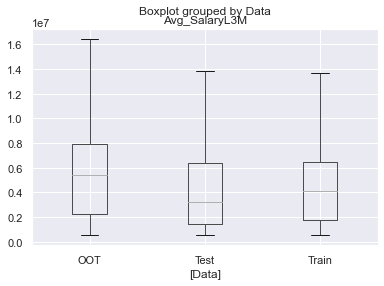

In [351]:
Iall = [I1, I2, I3]
allI = pd.concat(Iall)

plt.figure()
allI.boxplot(by="Data" ,showfliers=False)
#plt.ylim(0, 17500000)

In [338]:
F1 = Train[['OLS']]
F2 = Test[['OLS']]
F3 = OOT[['Predicted_Income']]
F3['OLS'] = OOT[['Predicted_Income']]
F3 = F3.drop(['Predicted_Income'], axis=1)



F1["Data"] = "Train"
F2["Data"] = "Test"
F3["Data"] = "OOT"

<ipython-input-338-c0d6ce9b84a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F3['OLS'] = OOT[['Predicted_Income']]
<ipython-input-338-c0d6ce9b84a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F1["Data"] = "Train"
<ipython-input-338-c0d6ce9b84a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

<AxesSubplot:title={'center':'OLS'}, xlabel='[Data]'>

<Figure size 432x288 with 0 Axes>

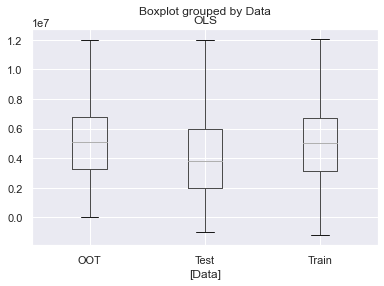

In [350]:
Fall = [F1, F2, F3]
allF = pd.concat(Fall)


plt.figure()

allF.boxplot(by="Data",showfliers=False)
#plt.ylim(0, 17500000)

In [272]:
OOT['YOE_grp'] = pd.cut(OOT['YOE'], bins=[-4, 2, 7, 14, 99], include_lowest=True, labels=["(0_2)", "(3_7)", "(8_14)", "(>15)"])

OOT['JABATAN_Upper_grp'] = np.where(OOT['JABATAN'].isin(['01-NON STAFF']), "'01-NON STAFF'",
                                      np.where(OOT['JABATAN'].isin(['02-STAFF']), "'02-STAFF'",
                                               np.where(OOT['JABATAN'].isin(['06-MANAGER','07-SENIOR MANAGER','08-WAKIL DIREKTUR','09-DIREKTUR']), "'06-MANAGER UP'",
                                                        np.where(OOT['JABATAN'].isin(['11-LAINNYA']), "'11-LAINNYA'",
                                                                 'Others'))))



OOT['YOE_JABATAN_grp'] = OOT['YOE_grp'].astype(str) + '__' + OOT['JABATAN_Upper_grp']


OOT['YOE_JABATAN_grp'] = np.where(OOT['YOE_JABATAN_grp'].isin(["(3_7)__'11-LAINNYA'","(8_14)__'11-LAINNYA'","(>15)__'11-LAINNYA'"]), "(3+)__'11-LAINNYA'", np.where(OOT['JABATAN_Upper_grp'].isin(["'06-MANAGER UP'"]), "'06-MANAGER UP'",np.where(OOT['JABATAN_Upper_grp'].isin(['Others']), 'Others', np.where(OOT['YOE_JABATAN_grp'].isin(["(8_14)__'01-NON STAFF'","(>15)__'01-NON STAFF'"]), "(>8)__'01-NON STAFF'" ,OOT['YOE_JABATAN_grp']))))


In [238]:
OOT['Brand_all_grp'] = np.where(OOT['Brand_all'].isin(['samsung']), "'samsung'",
                                  np.where(OOT['Brand_all'].isin(['Apple']), "'Apple'",
                              np.where(OOT['Brand_all'].isin(['OPPO','vivo','xiaomi','Xiaomi']), "'OPPO','vivo','xiaomi'",
                                       np.where(OOT['Brand_all'].isin(['Redmi']), "'Redmi'",
                                                np.where(OOT['Brand_all'].isin(['realme','Realme']), "'realme'",
                                                         np.where(OOT['Brand_all'].isnull(), 'Empty','Others'))))))

In [241]:
OOT['EDUCATION_grp'] = np.where((OOT['EDUCATION'].isnull()) | (OOT['EDUCATION'].isin(['Lainnya'])), "'Lainnya',''Empty'",
                                  np.where(OOT['EDUCATION'].isin(['SLTA','SLTP','SD']),"'SLTA','SLTP','SD'",
                                           np.where(OOT['EDUCATION'].isin(['D3/Akademi','Strata 1','Strata 2']),"'D3/Akademi','Strata 1','Strata 2'",
                                                      OOT['EDUCATION'])))

In [243]:
OOT['EMAIL_FINAL_ALL_GROUP_grp'] = np.where(OOT['EMAIL_FINAL_ALL_GROUP'].isin(['gmail','gmai','gamil','gemail','gamail','gmal','gmil','g.mail','gimal','qmail','gmael','g','geamil','gemai','gma','gmaiil','gmail.id','gmail48','gmaill','gmailm','gmaip','gmall','gmqil','igmail']), "'gmail'",
                              np.where(OOT['EMAIL_FINAL_ALL_GROUP'].isin(['yahoo','ymail','yhoo','yajoo','yaho','95yahoo']), "'yahoo'",
                                       'Others'))

In [245]:
OOT['JENIS_USAHA_Upper'] = OOT['JENIS_USAHA'].str.upper()
OOT['JENIS_USAHA_Upper_grp'] = np.where(OOT['JENIS_USAHA_Upper'].isin(['54-LAINNYA','12-INDUSTRI LAINNYA']), "'54-LAINNYA','12-INDUSTRI LAINNYA'",
                                          np.where(OOT['JENIS_USAHA_Upper'].isin(['19-PERDAGANGAN']), "19-PERDAGANGAN",
                                                   np.where(OOT['JENIS_USAHA_Upper'].isin(['27-SPBU']), "27-SPBU",
                                                            np.where(OOT['JENIS_USAHA_Upper'].isin(['44-PERBANKAN/ASURANSI/KEU','67-PERBANKAN/ASURANSI/KEU','44-PERBANKAN/ASURANSI/KEUANGAN','67-PERBANKAN/ASURANSI/KEU/BPR']), "44 & 67-PERBANKAN/ASURANSI/KEU/BPR",
                                                                     np.where(OOT['JENIS_USAHA_Upper'].isin(['18-DISTRIBUSI']), "18-DISTRIBUSI",
                                                                              np.where(OOT['JENIS_USAHA_Upper'].isin(['34-TRANSPORTASI/ANGKUTAN UMUM']), "34-TRANSPORTASI/ANGKUTAN UMUM",
                                                                                       np.where(OOT['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
                                                                                                np.where(OOT['JENIS_USAHA_Upper'].isin(['37-DEALER MOTOR/MOBIL']), "37-DEALER MOTOR/MOBIL",
                                                                                                         'Others'))))))))

In [247]:
OOT['LocaleDisplayLanguage_grp'] = np.where(OOT['LocaleDisplayLanguage'].isin(['Indonesia','Bahasa Indonesia']), "'Indonesia'",
                              np.where(OOT['LocaleDisplayLanguage'].isin(['English']), "'English'",
                                       'Others'))

In [249]:
OOT['provider_final_grp'] = np.where(OOT['provider_final'].isin(['Axis','Smart','Fren','Esia','Others']), "'Axis','Smart','Fren','Esia','Others'",
                              
                                       OOT['provider_final'])

In [254]:
cat_char = ['YOE_grp'
,'JABATAN_Upper_grp'
,'YOE_JABATAN_grp'
,'Brand_all_grp'
,'EDUCATION_grp'
,'EMAIL_FINAL_ALL_GROUP_grp'
,'JENIS_USAHA_Upper_grp'
,'LocaleDisplayLanguage_grp'
,'provider_final_grp']

In [256]:
cat_char

['YOE_grp',
 'JABATAN_Upper_grp',
 'YOE_JABATAN_grp',
 'Brand_all_grp',
 'EDUCATION_grp',
 'EMAIL_FINAL_ALL_GROUP_grp',
 'JENIS_USAHA_Upper_grp',
 'LocaleDisplayLanguage_grp',
 'provider_final_grp']

In [261]:
OOT.head()

,year_income,Company_Name,CIF,source,Avg_SalaryL3M,Nmonths,min_bussdate,max_bussdate,buss_date,LocaleDisplayLanguage,Brand_all,JENIS_USAHA,EMAIL_FINAL_ALL_GROUP,provider_final,Age,JABATAN,RamTotalSize,EDUCATION,YOE,PROVINCE_cln,constant,LocaleDisplayLanguage_Income,Brand_all_Income,JENIS_USAHA_Income,YOE_grp,UMR,Education_income,email_grp,email_grp_income,provider_income,Ram_income,UMR_income,Age_income,YOE_JABATAN_grp,YOE_JABATAN_income,constant_nsdk,JENIS_USAHA_Income_nsdk,Education_income_nsdk,email_grp_income_nsdk,provider_income_nsdk,UMR_income_nsdk,Age_income_nsdk,YOE_JABATAN_income_nsdk,Predicted_Income,Predicted_Income_nsdk,Avg_IncomeL3M_Mio,Predicted_Income_Mio,Predicted_Income_nsdk_Mio,JABATAN_Upper_grp,Brand_all_grp,EDUCATION_grp,EMAIL_FINAL_ALL_GROUP_grp,JENIS_USAHA_Upper,JENIS_USAHA_Upper_grp,LocaleDisplayLanguage_grp,provider_final_grp
0,2023,"SENTRA TRADA INDOSTATION, PT",7019BM,SMART,2083333.33333,3,2023-02-28,2023-04-30,2023-04-30,Indonesia,Realme,26-MINIMARKET/SUPERMARKET,gmail,Smart,22,02-STAFF,1813.21094,None,1,JAWA BARAT,-11615136.53809,1200132.12022,2283278.80247,2387526.36865,(0_2),1986670.00000,194333.43568,gmail,1826481.26590,777908.74222,613801.27832,506600.85000,1042514.00000,(0_2)__'02-STAFF',1747728.44052,-7983485.05942,2955624.38367,907329.96452,2190481.26943,1197061.68567,786178.33101,473678.62674,2014020.33812,965168.76589,2540889.53975,2.08333,0.96517,2.54089,'02-STAFF','realme',"'Lainnya',''Empty'",'gmail',26-MINIMARKET/SUPERMARKET,Others,'Indonesia',"'Axis','Smart','Fren','Esia','Others'"
1,2023,PT SINAR UTAMA SEJAHTERA,7019D0,AKSES BISNIS,4701426.66667,3,2023-02-28,2023-04-30,2023-04-30,None,None,12-INDUSTRI LAINNYA,gmail,Indosat,35,01-NON STAFF,nan,None,14,DAERAH ISTIMEWA YOGYAKARTA,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(8_14),1981782.00000,194333.43568,gmail,1826481.26590,1116748.46755,1450470.83323,505354.41000,1658545.00000,(>8)__'01-NON STAFF',3055992.85086,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1718475.09930,784244.01898,753579.63345,3521617.89674,3961734.10594,4328362.00794,4.70143,3.96173,4.32836,'01-NON STAFF',Empty,"'Lainnya',''Empty'",'gmail',12-INDUSTRI LAINNYA,"'54-LAINNYA','12-INDUSTRI LAINNYA'",Others,Indosat
2,2023,PT SINAR UTAMA SEJAHTERA,70202L,AKSES BISNIS,5427043.00000,3,2023-02-28,2023-04-30,2023-04-30,None,None,54-LAINNYA,gmail,Smart,37,02-STAFF,nan,None,16,JAWA TENGAH,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(>15),1958170.00000,194333.43568,gmail,1826481.26590,777908.74222,1450470.83323,499333.35000,1753319.00000,(>15)__'02-STAFF',4506145.49128,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1197061.68567,774900.12052,796641.32679,5192722.42504,5161799.96104,5511770.91749,5.42704,5.16180,5.51177,'02-STAFF',Empty,"'Lainnya',''Empty'",'gmail',54-LAINNYA,"'54-LAINNYA','12-INDUSTRI LAINNYA'",Others,"'Axis','Smart','Fren','Esia','Others'"
3,2023,PT SINAR UTAMA SEJAHTERA,702060,AKSES BISNIS,1511479.66667,3,2023-02-28,2023-04-30,2023-04-30,None,None,12-INDUSTRI LAINNYA,gmail,Fren,28,01-NON STAFF,nan,None,7,JAWA TENGAH,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(3_7),1958170.00000,194333.43568,gmail,1826481.26590,777908.74222,1450470.83323,499333.35000,1326836.00000,(3_7)__'01-NON STAFF',2374730.21944,-7983485.05942,2436119.18493,907329.96452,2190481.26943,1197061.68567,774900.12052,602863.70676,2736554.97537,2603901.68919,2861825.84778,1.51148,2.60390,2.86183,'01-NON STAFF',Empty,"'Lainnya',''Empty'",'gmail',12-INDUSTRI LAINNYA,"'54-LAINNYA','12-INDUSTRI LAINNYA'",Others,"'Axis','Smart','Fren','Esia','Others'"
4,2023,PT SINAR UTAMA SEJAHTERA,70207F,AKSES BISNIS,3600786.00000,3,2023-02-28,2023-04-30,2023-04-30,None,None,54-LAINNYA,gmail,Three,33,02-STAFF,nan,None,12,DAERAH ISTIMEWA YOGYAKARTA,-11615136.53809,1629697.38507,2171372.17940,1967874.81634,(8_14),1981782.00000,194333.43568,gmail,1826481.26590,1025705.82625,1450470.83323,505354.41000,1563771.00000,(8_14)__'02-STAFF',4075325.84779,-7983485.059

In [273]:
OOT[OOT['YOE_grp'].isnull()]

,year_income,Company_Name,CIF,source,Avg_SalaryL3M,Nmonths,min_bussdate,max_bussdate,buss_date,LocaleDisplayLanguage,Brand_all,JENIS_USAHA,EMAIL_FINAL_ALL_GROUP,provider_final,Age,JABATAN,RamTotalSize,EDUCATION,YOE,PROVINCE_cln,constant,LocaleDisplayLanguage_Income,Brand_all_Income,JENIS_USAHA_Income,YOE_grp,UMR,Education_income,email_grp,email_grp_income,provider_income,Ram_income,UMR_income,Age_income,YOE_JABATAN_grp,YOE_JABATAN_income,constant_nsdk,JENIS_USAHA_Income_nsdk,Education_income_nsdk,email_grp_income_nsdk,provider_income_nsdk,UMR_income_nsdk,Age_income_nsdk,YOE_JABATAN_income_nsdk,Predicted_Income,Predicted_Income_nsdk,Avg_IncomeL3M_Mio,Predicted_Income_Mio,Predicted_Income_nsdk_Mio,JABATAN_Upper_grp,Brand_all_grp,EDUCATION_grp,EMAIL_FINAL_ALL_GROUP_grp,JENIS_USAHA_Upper,JENIS_USAHA_Upper_grp,LocaleDisplayLanguage_grp,provider_final_grp


In [274]:
#char_analysis_complete(OOT,'YOE_grp','Avg_SalaryL3M')

,count,min,q1,mean,median,q3,max,dist,attribute,min_correlation,q1_correlation,mean_correlation,median_correlation,q3_correlation,max_correlation,dist_correlation
bin,,,,,,,,,,,,,,,,
(0_2),4474,513333.33333,1505000.00000,3120143.75361,1902530.50000,4079750.00000,20000000.00000,0.24736,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278
(3_7),4669,501666.66667,2150000.00000,5179759.56743,4913745.66667,7239714.00000,29246765.66667,0.25814,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278
(8_14),4255,524333.33333,3987974.00000,7273500.73145,6686613.66667,9148304.83333,29944289.33333,0.23525,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278
(>15),4689,595910.33333,4680833.33333,8587136.64292,7077740.00000,10757310.66667,29933333.33333,0.25925,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278


In [276]:
attributes_EDA_OOT =pd.DataFrame()
for i in cat_char:
    attribute_EDA_OOT = char_analysis_complete(OOT,i,'Avg_SalaryL3M')
    attribute_EDA_OOT['bin'] = attribute_EDA_OOT.index
    attribute_EDA_OOT['freq'] = attribute_EDA_OOT['count']/len(OOT)
    attribute_EDA_OOT = attribute_EDA_OOT.reset_index(drop=True)
    attributes_EDA_OOT = pd.concat([attributes_EDA_OOT, attribute_EDA_OOT])
    
attributes_EDA_OOT.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Attributes_EDA_OOT.csv')    
attributes_EDA_OOT  

,count,min,q1,mean,median,q3,max,dist,attribute,min_correlation,q1_correlation,mean_correlation,median_correlation,q3_correlation,max_correlation,dist_correlation,bin,freq
0,4474,513333.33333,1505000.00000,3120143.75361,1902530.50000,4079750.00000,20000000.00000,0.24736,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278,(0_2),0.24736
1,4669,501666.66667,2150000.00000,5179759.56743,4913745.66667,7239714.00000,29246765.66667,0.25814,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278,(3_7),0.25814
2,4255,524333.33333,3987974.00000,7273500.73145,6686613.66667,9148304.83333,29944289.33333,0.23525,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278,(8_14),0.23525
3,4689,595910.33333,4680833.33333,8587136.64292,7077740.00000,10757310.66667,29933333.33333,0.25925,YOE_grp,0.34439,0.43681,0.44463,0.43174,0.44193,0.37372,0.04278,(>15),0.25925
0,4467,506333.33333,1759166.66667,4725498.19558,3665869.66667,6845257.66667,29738640.00000,0.24697,JABATAN_Upper_grp,0.33504,0.39291,0.40113,0.39536,0.39594,0.16992,0.06509,'01-NON STAFF',0.24697
1,10350,501666.66667,2934276.00000,6562320.97710,6146155.33333,8450328.08333,29832906.00000,0.57223,JABATAN_Upper_grp,0.33504,0.39291,0.40113,0.39536,0.39594,0.16992,0.06509,'02-STAFF',0.57223
2,363,1661678.00000,11364350.33333,16553675.14141,16143552.33333,22134615.00000,29944289.33333,0.02007,JABATAN_Upper_grp,0.33504,0.39291,0.40113,0.39536,0.39594,0.16992,0.06509,'06-MANAGER UP',0.02007
3,2425,512333.33333,1638000.00000,4115256.51849,2566666.66667,6199933.33333,25000000.00000,0.13407,JABATAN_Upper_grp,0.33504,0.39291,0.40113,0.39536,0.39594,0.16992,0.06509,'11-LAINNYA',0.13407
4,482,800000.00000,3758208.75000,9004867.67358,7684746.33333,12107525.66667,29824802.33333,0.02665,JABATAN_Upper_grp,0.33504,0.39291,0.40113,0.39536,0.39594,0.16992,0.06509,Others,0.02665
0,363,1661678.00000,11364350.33333,16553675.14141,16143552.33333,22134615.00000,29944289.33333,0.02007,YOE_JABATAN_grp,0.45256,0.51608,0.52900,0.52148,0.52094,0.37578,0.15580,'06-MANAGER UP',0.02007


NameError: name 'Train_char' is not defined

In [290]:
OOT_char = attributes_EDA_OOT[attributes_EDA_OOT['attribute'].isin(cat_char)][['attribute','bin','count','dist','mean','mean_correlation']]
Train_char = attributes_EDA[attributes_EDA['attribute'].isin(cat_char)][['attribute','bin','count','dist','mean','mean_correlation']]
Test_char = attributes_EDA_test[attributes_EDA_test['attribute'].isin(cat_char)][['attribute','bin','count','dist','mean','mean_correlation']]
#OOT.rename(columns={})

#Train.rename(columns={'mean':new_name}, inplace=True)

In [291]:
cols_OOT = list()
for i in OOT_char.columns:
    cols = i+'_OOT'
    cols_OOT.append(cols)

cols_Train = list()
for i in Train_char.columns:
    cols = i+'_Train'
    cols_Train.append(cols)
    
cols_Test = list()
for i in Test_char.columns:
    cols = i+'_Test'
    cols_Test.append(cols)

In [293]:
OOT_char.columns = cols_OOT
Test_char.columns = cols_Test
Train_char.columns = cols_Train

In [299]:
Train_char['key'] =  Train_char['attribute_Train'] + '_' + Train_char['bin_Train']
Test_char['key'] =  Test_char['attribute_Test'] + '_' + Test_char['bin_Test']
OOT_char['key'] = OOT_char['attribute_OOT'] + '_' + OOT_char['bin_OOT']

In [326]:
Sum_char = pd.merge(Train_char, Test_char, how='left', left_on='key', right_on ='key', indicator=False)
Sum_char = pd.merge(Sum_char, OOT_char, how='left', left_on='key', right_on = 'key', indicator=False)

Sum_char = Sum_char.drop(['attribute_Test','bin_Test','attribute_OOT','bin_OOT'], axis=1)
Sum_char = Sum_char[['attribute_Train','bin_Train','dist_Train','dist_Test','dist_OOT','mean_Train','mean_Test','mean_OOT','count_Train','count_Test','count_OOT','mean_correlation_Train','mean_correlation_Test','mean_correlation_OOT']]

Sum_char.to_csv(r'C:\Users\22060909\Documents\Task\Income Estimation\Python\payroll5.1 - var interaction 500K_30Mio_Backup2\Characteristic_Summary.csv') 
Sum_char.head(100)

,attribute_Train,bin_Train,dist_Train,dist_Test,dist_OOT,mean_Train,mean_Test,mean_OOT,count_Train,count_Test,count_OOT,mean_correlation_Train,mean_correlation_Test,mean_correlation_OOT
0,YOE_grp,(0_2),0.27809,0.39002,0.24736,2523268.99172,2847908.27852,3120143.75361,4631,2165,4474,0.39641,0.45787,0.44463
1,YOE_grp,(3_7),0.26296,0.25725,0.25814,4782403.76288,3931432.19888,5179759.56743,4379,1428,4669,0.39641,0.45787,0.44463
2,YOE_grp,(8_14),0.21720,0.17817,0.23525,6248395.67846,7191793.17695,7273500.73145,3617,989,4255,0.39641,0.45787,0.44463
3,YOE_grp,(>15),0.24176,0.17456,0.25925,7196304.41398,8074195.05401,8587136.64292,4026,969,4689,0.39641,0.45787,0.44463
4,LocaleDisplayLanguage_grp,'English',0.01717,0.01369,0.01200,8490867.25291,9429707.96491,9980046.54685,286,76,217,0.16134,0.15836,0.14781
5,LocaleDisplayLanguage_grp,'Indonesia',0.21438,0.22104,0.19495,3903662.76209,3810357.79516,4902552.48771,3570,1227,3526,0.16134,0.15836,0.14781
6,LocaleDisplayLanguage_grp,Others,0.76845,0.76527,0.79306,5300907.19880,5019872.46759,6267817.88432,12797,4248,14344,0.16134,0.15836,0.14781
7,provider_final_grp,"'Axis','Smart','Fren','Esia','Others'",0.11025,0.11836,0.10953,2963879.08569,2957847.88838,3957222.74390,1836,657,1981,0.25805,0.21230,0.25634
8,provider_final_grp,Indosat,0.21870,0.25401,0.23188,4254878.81457,4174758.02317,5107312.60118,3642,1410,4194,0.25805,0.21230,0.25634
9,provider_final_grp,Telkomsel,0.41512,0.35741,0.39990,6169548.37880,5774461.84039,7211725.62948,6913,1984,7233,0.25805,0.21230,0.25634


In [298]:
Train_char.head(30)

,attribute_Train,bin_Train,count_Train,dist_Train,mean_Train,mean_correlation_Train,key
0,YOE_grp,(0_2),4631,0.27809,2523268.99172,0.39641,YOE_grp_(0_2)
1,YOE_grp,(3_7),4379,0.26296,4782403.76288,0.39641,YOE_grp_(3_7)
2,YOE_grp,(8_14),3617,0.21720,6248395.67846,0.39641,YOE_grp_(8_14)
3,YOE_grp,(>15),4026,0.24176,7196304.41398,0.39641,YOE_grp_(>15)
0,LocaleDisplayLanguage_grp,'English',286,0.01717,8490867.25291,0.16134,LocaleDisplayLanguage_grp_'English'
1,LocaleDisplayLanguage_grp,'Indonesia',3570,0.21438,3903662.76209,0.16134,LocaleDisplayLanguage_grp_'Indonesia'
2,LocaleDisplayLanguage_grp,Others,12797,0.76845,5300907.19880,0.16134,LocaleDisplayLanguage_grp_Others
0,provider_final_grp,"'Axis','Smart','Fren','Esia','Others'",1836,0.11025,2963879.08569,0.25805,"provider_final_grp_'Axis','Smart','Fren','Esia..."
1,provider_final_grp,Indosat,3642,0.21870,4254878.81457,0.25805,provider_final_grp_Indosat
2,provider_final_grp,Telkomsel,6913,0.41512,6169548.37880,0.25805,provider_final_grp_Telkomsel


In [ ]:
provider_final

In [ ]:
plt.scatter(LR2_pred_ts/1000000, Test['Avg_SalaryL3M']/1000000)
plt.title("Pred wo SDK" +" vs Income(Mio)")
plt.ticklabel_format(style='plain')
plt.xlabel("Pred (Corr= "+ str(round(Test[['OLS_NonSDK','Avg_SalaryL3M']].corr()['Avg_SalaryL3M'][0],2))+ ')')
plt.ylabel("Income(Mio)")
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

ValueError: x and y must be the same size

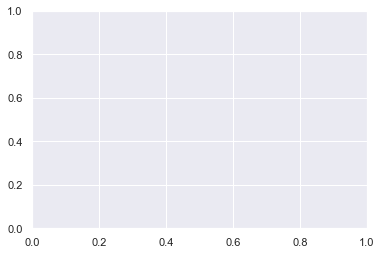

In [196]:
# plot 

plt.scatter(Train[vars_selected], Train['Avg_SalaryL3M'],color='g') 

plt.plot(Test[vars_selected], LR.predict(Test[vars_selected]),color='k') 
plt.show()

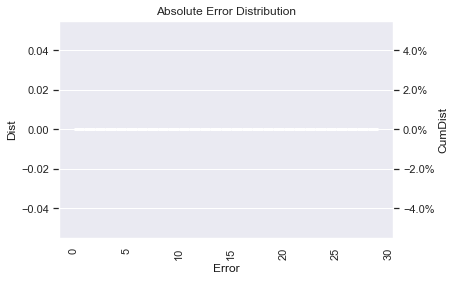

In [298]:
ax3 = cor_result['Income'].plot(kind = 'hist', use_index=True, weights=np.ones(len(cor_result)) / len(cor_result),
              #y = 'mean', 
                                   bins = range(30),
                                      
                                       color = 'Blue',rot=90,
              linewidth = 3, label = 'absolute error')

ax4 = cor_result['Income'].plot(kind = 'hist', use_index=True, weights=np.ones(len(cor_result)) / len(cor_result),
                                       
               #y = 'dist',
                                       bins = range(30),
                                       cumulative=1,
                                       secondary_y = True,
               color = 'Green', rot=90,  linewidth = 3, alpha = 0.3)
               #ax3 = ax3)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=90)
#title of the plot
plt.title("Absolute Error Distribution")



#labeling x and y-axis
ax3.set_xlabel('Error', color = 'k')
ax3.set_ylabel('Dist', color = "k")
ax4.set_ylabel('CumDist', color = 'k')


plt.show()

In [ ]:
from sklearn import metrics


print('Test')
print('MAE      : ',metrics.mean_absolute_error(Test['max_income_proxy'], LR_pred_ts))
print('MSE      : ',metrics.mean_squared_error(Test['max_income_proxy'], LR_pred_ts))
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(Test['max_income_proxy'], LR_pred_ts)))
print('R2 Score : ',metrics.r2_score(Test['max_income_proxy'], LR_pred_ts))


In [ ]:
plt.scatter(Test['max_income_proxy'], LR_pred_ts)
plt.title("Prediction vs Real")
plt.xlabel("Income_Proxy")
plt.ylabel("Prediction")
plt.show()

In [ ]:
#cor_tbl.to_csv('cor_test.csv')

In [ ]:
#clustered_variables.to_csv('cluster_test.csv')

In [ ]:
Table = pd.merge(df, umr[['Provinsi_Year','UMR']], how='left', left_on='idprovince_appyear', right_on ='Provinsi_Year', indicator=False)

In [235]:
char_analysis_complete(Train,'YOE_grp','YOE')

,count,min,q1,mean,median,q3,max,dist,attribute,min_correlation,q1_correlation,mean_correlation,median_correlation,q3_correlation,max_correlation,dist_correlation
bin,,,,,,,,,,,,,,,,
(0_2),4631,-4,-1,-0.05139,0,1,2,0.27809,YOE_grp,0.90428,0.91999,0.92478,0.92457,0.92379,0.89976,-0.58906
(3_7),4379,3,4,4.94862,5,6,7,0.26296,YOE_grp,0.90428,0.91999,0.92478,0.92457,0.92379,0.89976,-0.58906
(8_14),3617,8,9,10.54603,10,12,14,0.21720,YOE_grp,0.90428,0.91999,0.92478,0.92457,0.92379,0.89976,-0.58906
(>15),4026,15,17,22.74863,21,27,52,0.24176,YOE_grp,0.90428,0.91999,0.92478,0.92457,0.92379,0.89976,-0.58906
